### 1. Clean Parquet data from Kaggle (integer dtypes parquet)
- This notebook aims to further clean the data taken from Kaggle's user, without affecting data quality

In [1]:
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import matplotlib.pyplot as plt
import gc
import numpy as np
import os
import sys
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [2]:
from pathlib import Path
rootpath = Path.cwd().parent
sys.path.append(os.path.join(rootpath))

In [3]:
from utils.eval_helpers import (
    plot_roc_curves, plot_feature_importance, 
    amex_metric, get_final_metric_df, amex_metric_np, lgb_amex_metric
)
from utils.eda_helpers import (
    plot_missing_proportion_barchart, get_cols, plot_scatterplot, plot_target_check, 
    plot_int_feature_distribution, plot_train_test_distribution, check_overlap_missing,
    insert_row_number
)
from utils.extraction_helpers import read_file
from utils.feature_group import (
    CATEGORY_COLUMNS, CONTINUOUS_COLUMNS, BINARY_COLUMNS, ROUND_COLUMNS,
    MEAN_FEATURES, MIN_FEATURES, MAX_FEATURES, LAST_FEATURES, NON_FEATURE_COLUMNS
)
from utils.constants import (
    PROCESSED_DATA_PATH
)
from utils.feature_engineering_helpers import integerize

In [4]:
RAW_DATA_PATH = "../raw_data"
PROCESSED_DATA_PATH = "../processed_data"
SUBMISSION_DATA_PATH = "../submissions"
EVALUATION_DATA_PATH = "../evaluation_data"
MODELS_PATH = "../models"

In [5]:
RAW_TRAIN_PARQUET_PATH = os.path.join(RAW_DATA_PATH, "train_parquet")
RAW_TRAIN_PICKLE_PATH = os.path.join(RAW_DATA_PATH, "train_pickle")
RAW_TEST_PARQUET_PATH = os.path.join(RAW_DATA_PATH, "test_parquet")
RAW_TEST_PICKLE_PATH = os.path.join(RAW_DATA_PATH, "test_pickle")

In [6]:
%load_ext autoreload
%autoreload

### Read Data

In [7]:
%%time
train = read_file(f"{RAW_TRAIN_PARQUET_PATH}/train_b.parquet", replace_negative_one=True)
test = read_file(f"{RAW_TEST_PARQUET_PATH}/test_b.parquet", replace_negative_one=True)

Shape of data: (5531451, 191)
Shape of data: (11363762, 189)
CPU times: user 15.5 s, sys: 20.2 s, total: 35.7 s
Wall time: 23.8 s


In [8]:
labels = pd.read_csv(f"{RAW_DATA_PATH}/train_labels.csv")

In [9]:
%%time
if "target" not in train.columns:
    train = train.merge(labels, on="customer_ID", how="left")

CPU times: user 13 µs, sys: 31 µs, total: 44 µs
Wall time: 47.2 µs


In [10]:
print(get_cols(train, "D_"))

['D_39', 'D_41', 'D_42', 'D_43', 'D_44', 'D_45', 'D_46', 'D_47', 'D_48', 'D_49', 'D_50', 'D_51', 'D_52', 'D_53', 'D_54', 'D_55', 'D_56', 'D_58', 'D_59', 'D_60', 'D_61', 'D_62', 'D_63', 'D_64', 'D_65', 'D_66', 'D_68', 'D_69', 'D_70', 'D_71', 'D_72', 'D_73', 'D_74', 'D_75', 'D_76', 'D_77', 'D_78', 'D_79', 'D_80', 'D_81', 'D_82', 'D_83', 'D_84', 'D_86', 'D_87', 'D_88', 'D_89', 'D_91', 'D_92', 'D_93', 'D_94', 'D_96', 'D_102', 'D_103', 'D_104', 'D_105', 'D_106', 'D_107', 'D_108', 'D_109', 'D_110', 'D_111', 'D_112', 'D_113', 'D_114', 'D_115', 'D_116', 'D_117', 'D_118', 'D_119', 'D_120', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125', 'D_126', 'D_127', 'D_128', 'D_129', 'D_130', 'D_131', 'D_132', 'D_133', 'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145']


### D_39

0 null count, 0.000 null proportion
nan of the targets have label = 1


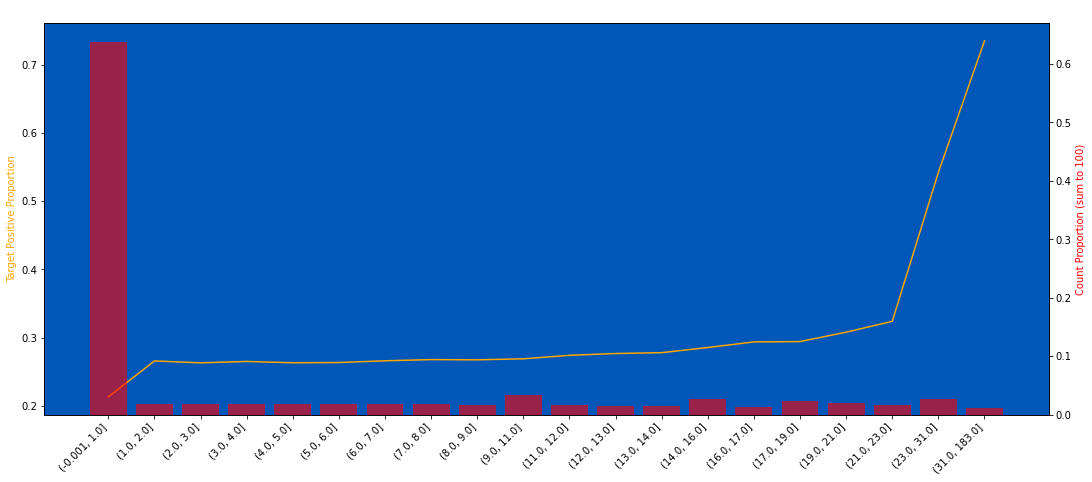

In [11]:
plot_target_check(train, "D_39", q=50, use_raw_bin=True)

In [12]:
train["D_39"].min()

0

### D_41

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


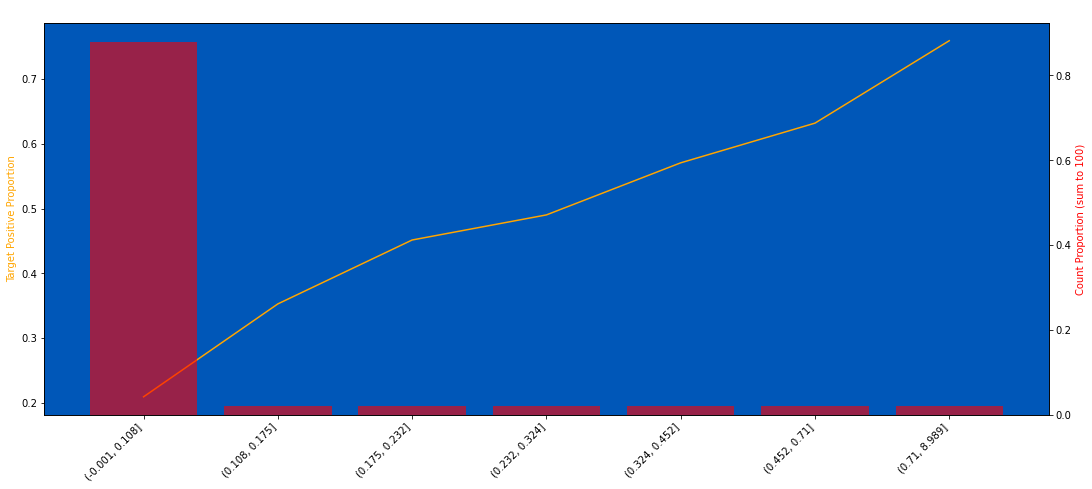

In [13]:
plot_target_check(train, "D_41", q=50, use_raw_bin=True)

### D_42

4740137 null count, 0.857 null proportion
0.2075 of the targets have label = 1


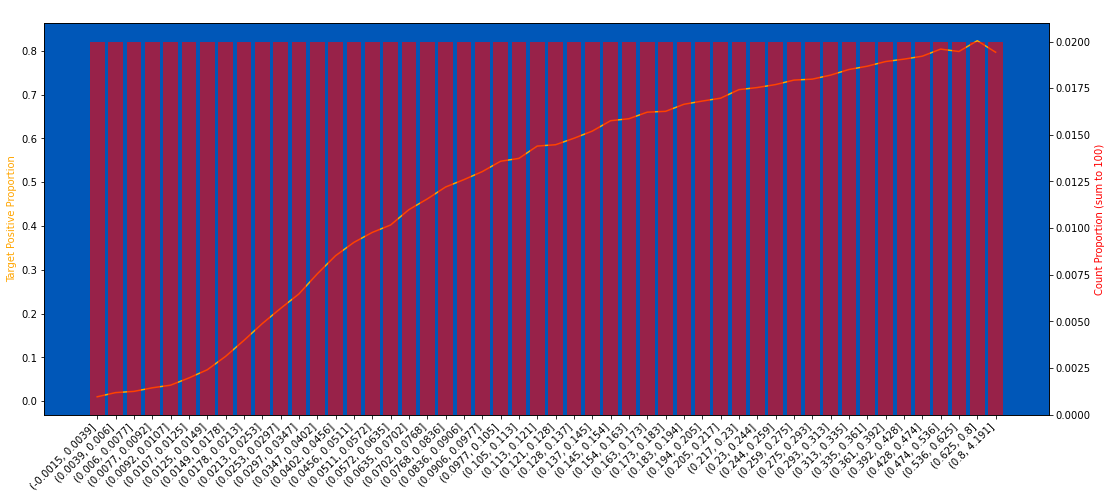

In [14]:
plot_target_check(train, "D_42", q=50, use_raw_bin=True)

In [15]:
train["D_42"] = train["D_42"].round(3)
test["D_42"] = test["D_42"].round(3)

4740137 null count, 0.857 null proportion
0.2075 of the targets have label = 1


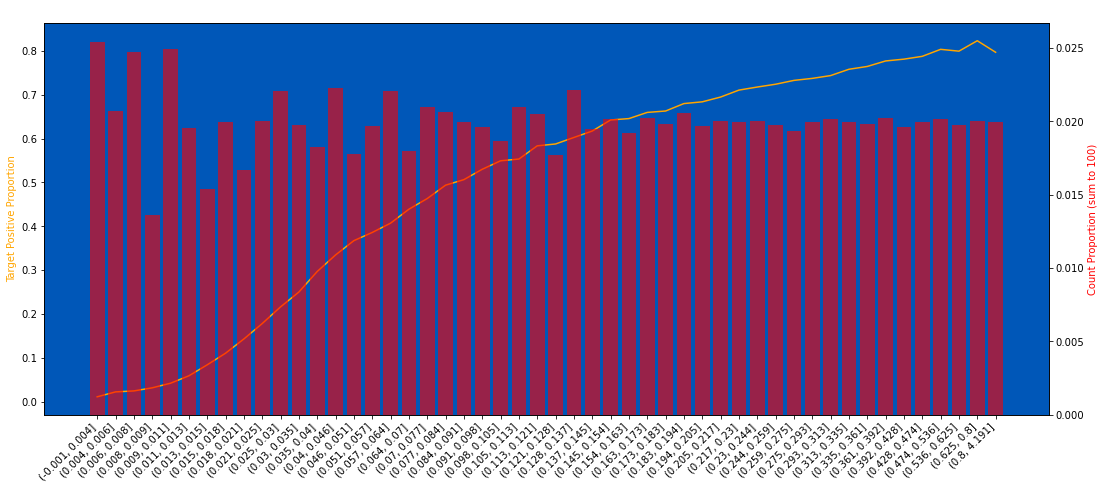

In [16]:
plot_target_check(train, "D_42", q=50, use_raw_bin=True)

### D_43

1658396 null count, 0.300 null proportion
0.1673 of the targets have label = 1


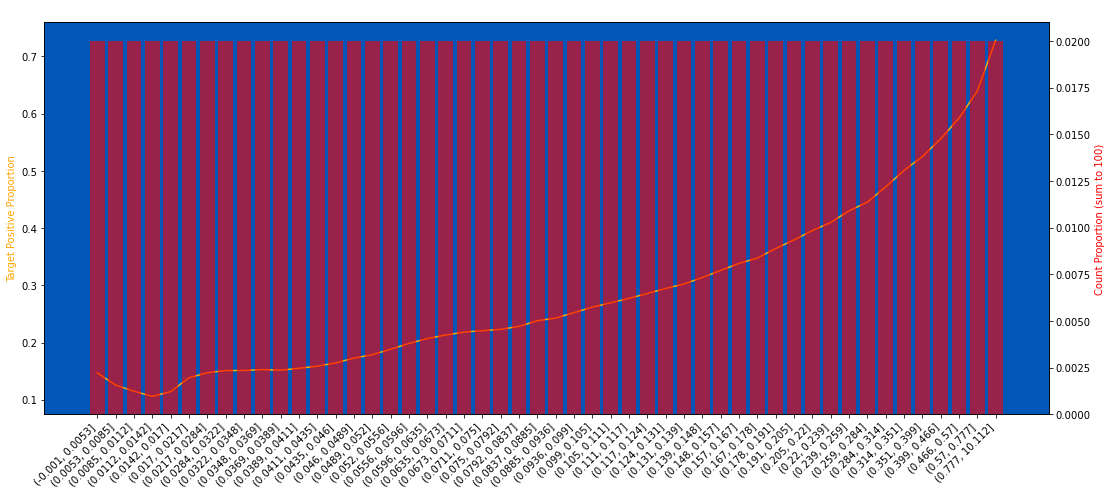

In [17]:
plot_target_check(train, "D_43", q=50, use_raw_bin=True)

In [18]:
train["D_43"] = train["D_43"].round(3)
test["D_43"] = test["D_43"].round(3)

1658396 null count, 0.300 null proportion
0.1673 of the targets have label = 1


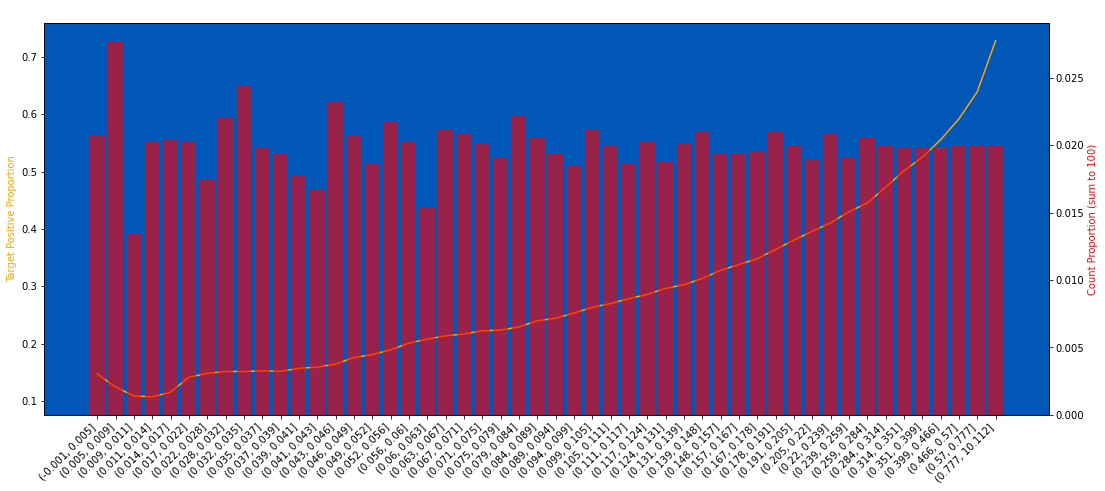

In [19]:
plot_target_check(train, "D_43", q=50, use_raw_bin=True)

### D_44

274319 null count, 0.050 null proportion
0.2406 of the targets have label = 1


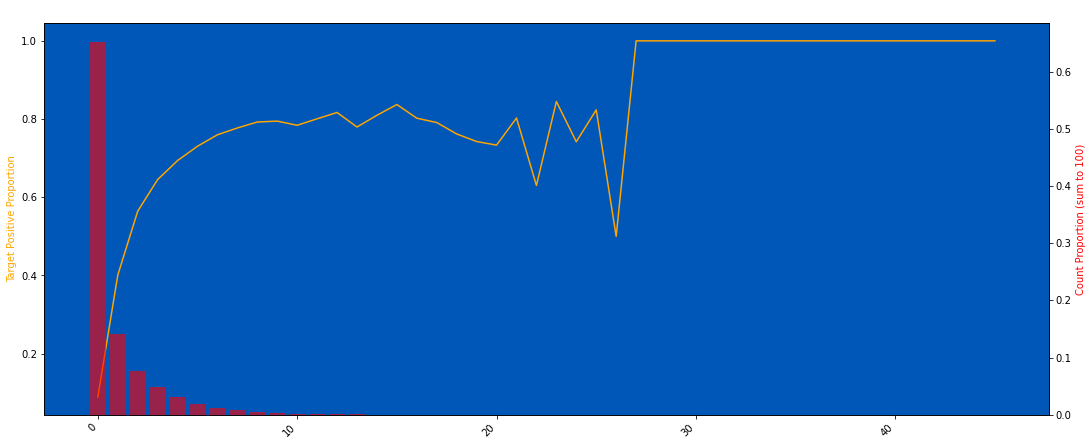

In [20]:
plot_target_check(train, "D_44", q=50, use_raw_bin=True)

### D_45

2017 null count, 0.000 null proportion
0.3560 of the targets have label = 1


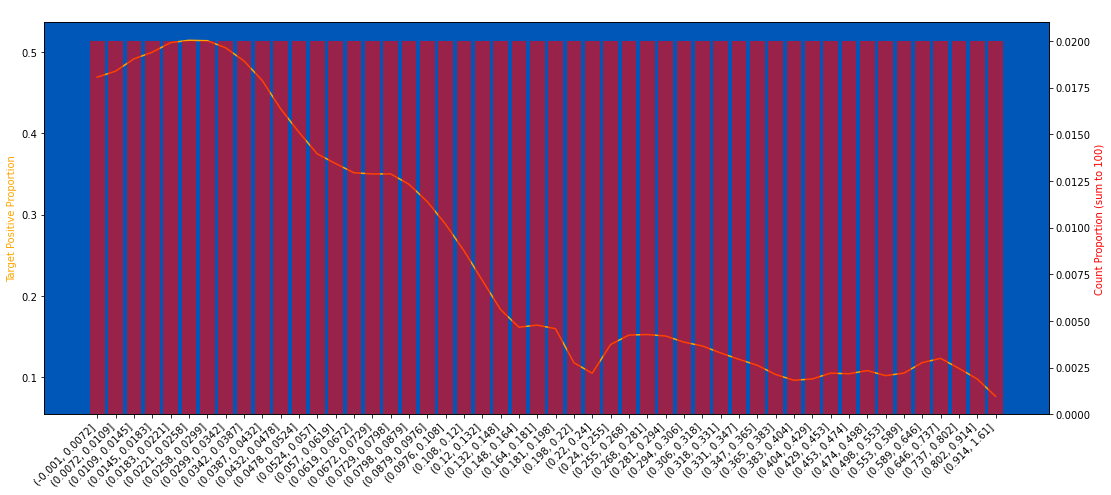

In [21]:
plot_target_check(train, "D_45", q=50, use_raw_bin=True)

In [22]:
train["D_45"] = train["D_45"].round(3)
test["D_45"] = test["D_45"].round(3)

2017 null count, 0.000 null proportion
0.3560 of the targets have label = 1


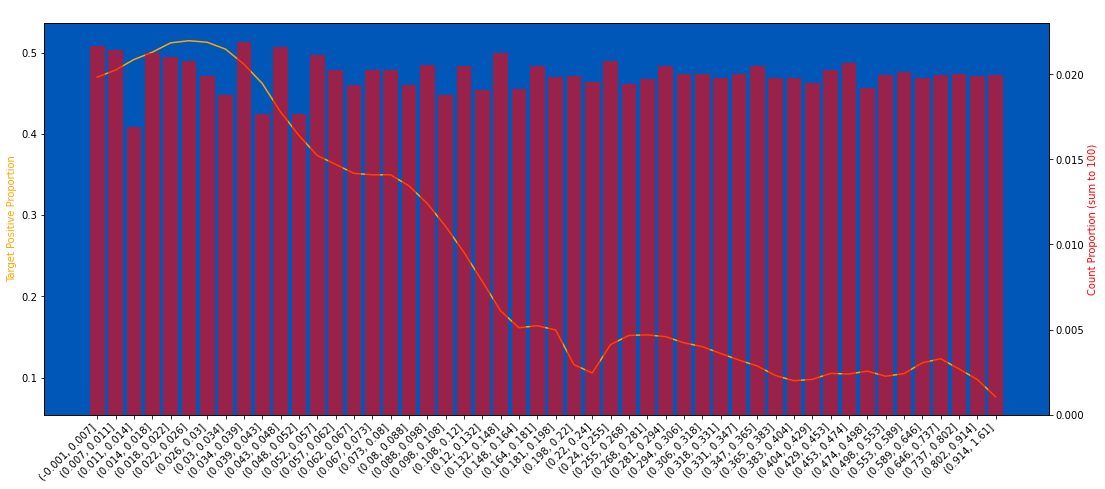

In [23]:
plot_target_check(train, "D_45", q=50, use_raw_bin=True)

### D_46

1211699 null count, 0.219 null proportion
0.1940 of the targets have label = 1


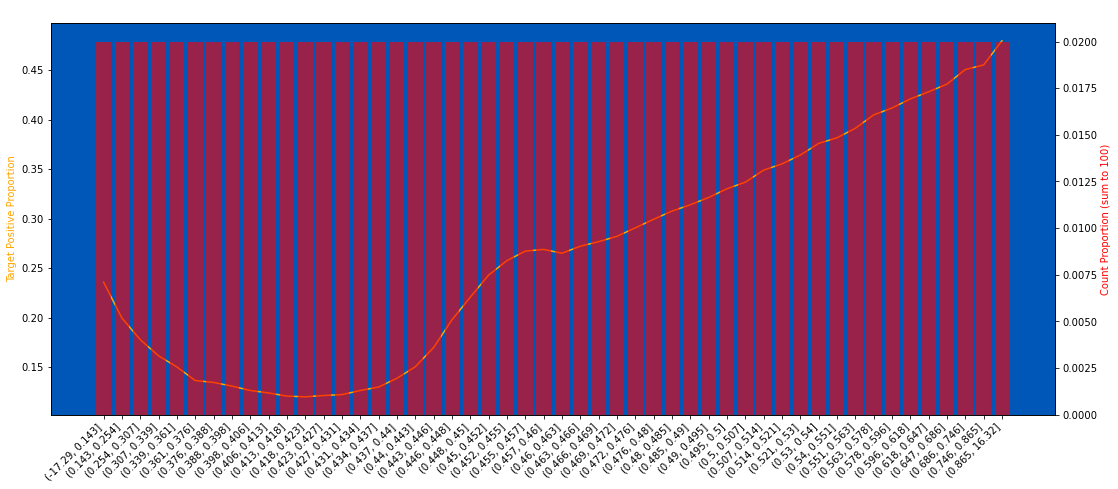

In [24]:
plot_target_check(train, "D_46", q=50, use_raw_bin=True)

### D_47

0 null count, 0.000 null proportion
nan of the targets have label = 1


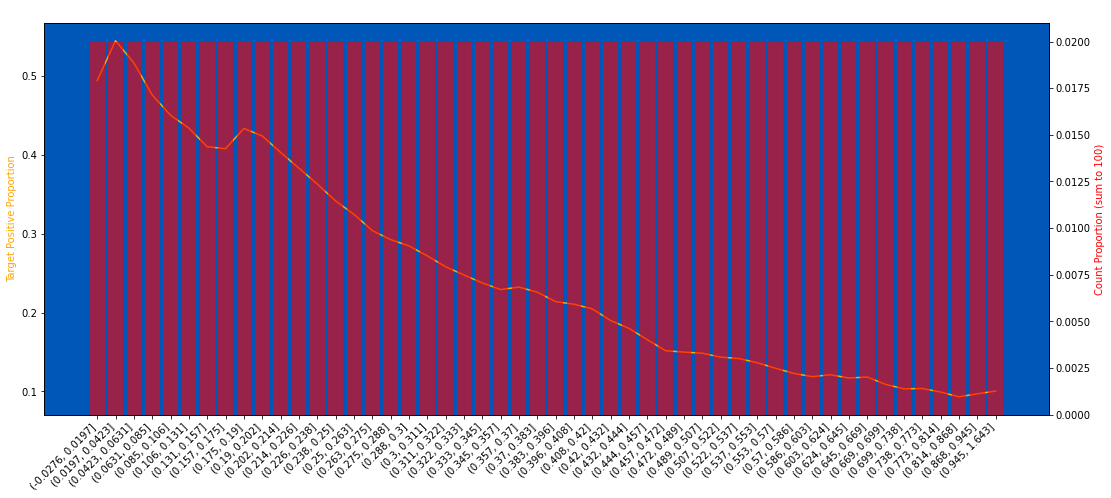

In [25]:
plot_target_check(train, "D_47", q=50, use_raw_bin=True)

In [26]:
train["D_47"] = train["D_47"].round(3)
test["D_47"] = test["D_47"].round(3)

0 null count, 0.000 null proportion
nan of the targets have label = 1


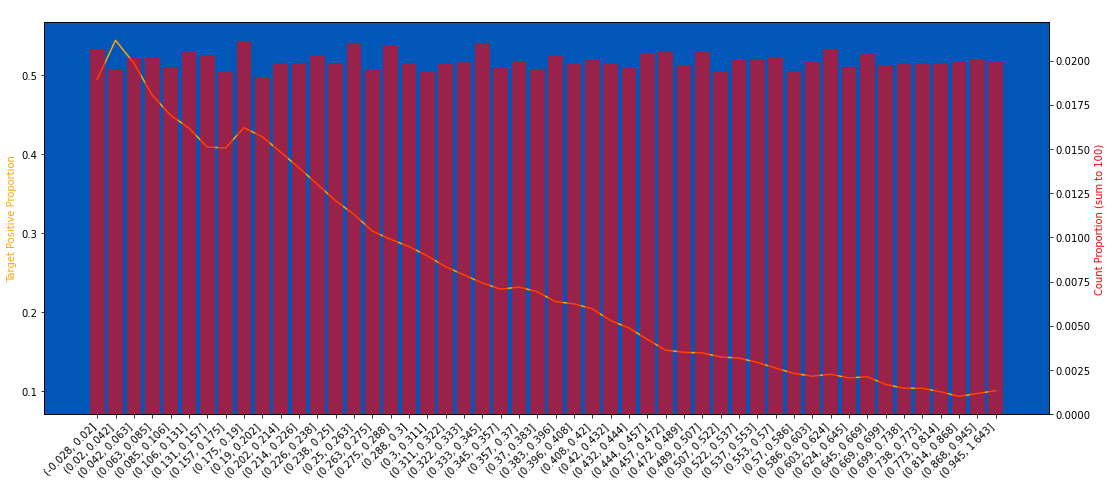

In [27]:
plot_target_check(train, "D_47", q=50, use_raw_bin=True)

### D_48

718725 null count, 0.130 null proportion
0.1221 of the targets have label = 1


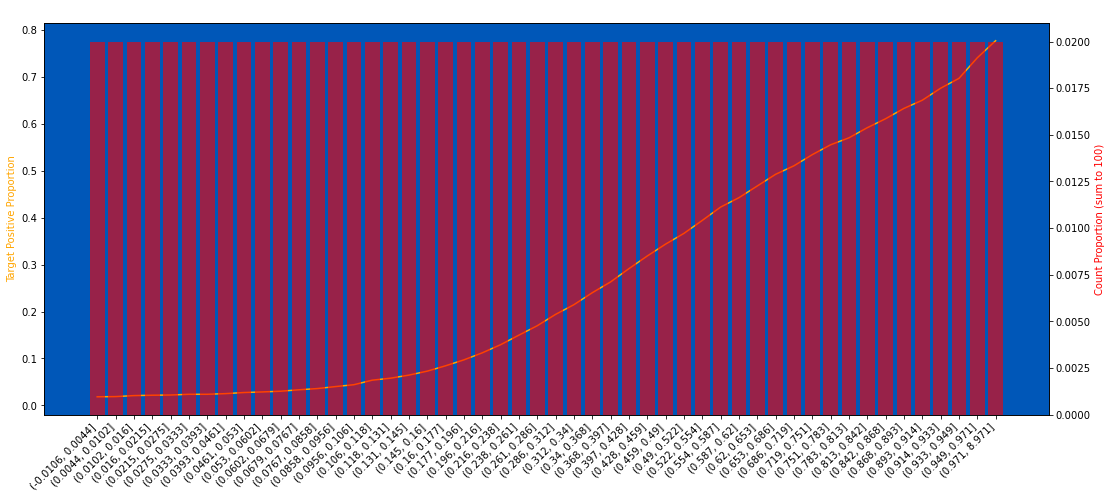

In [28]:
plot_target_check(train, "D_48", q=50, use_raw_bin=True)

In [29]:
train["D_48"] = train["D_48"].round(3)
test["D_48"] = test["D_48"].round(3)

718725 null count, 0.130 null proportion
0.1221 of the targets have label = 1


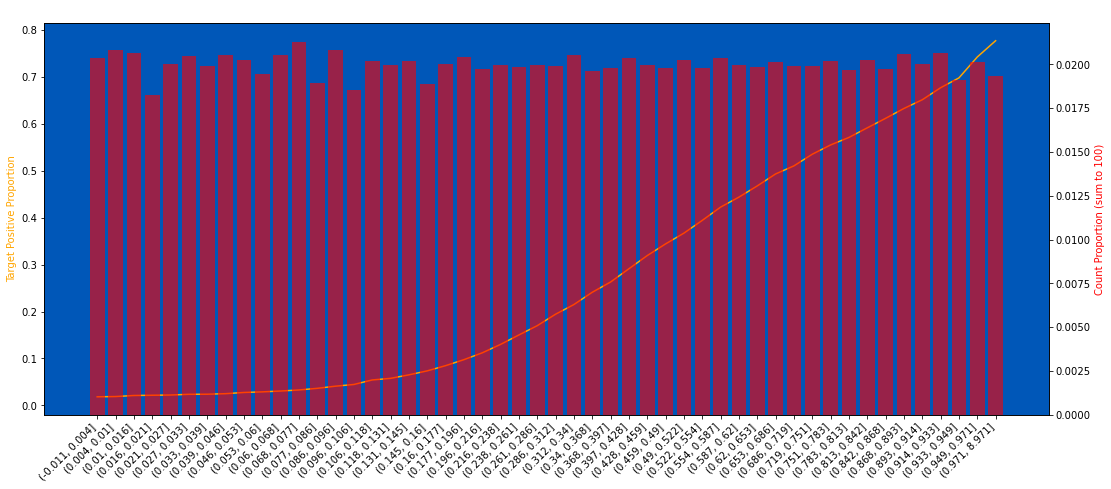

In [30]:
plot_target_check(train, "D_48", q=50, use_raw_bin=True)

### D_49

4985917 null count, 0.901 null proportion
0.2162 of the targets have label = 1


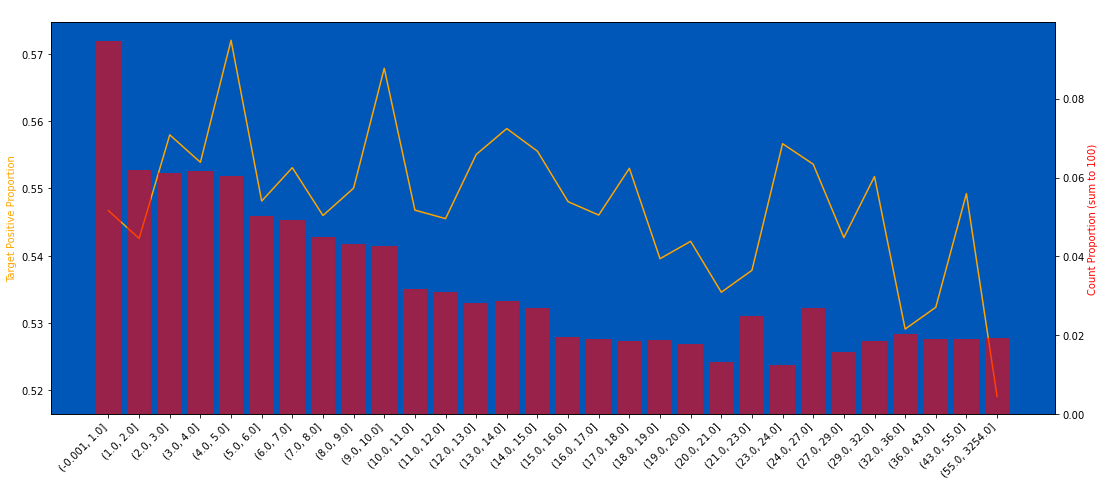

In [31]:
plot_target_check(train, "D_49", q=50, use_raw_bin=True)

### D_50

3142402 null count, 0.568 null proportion
0.3005 of the targets have label = 1


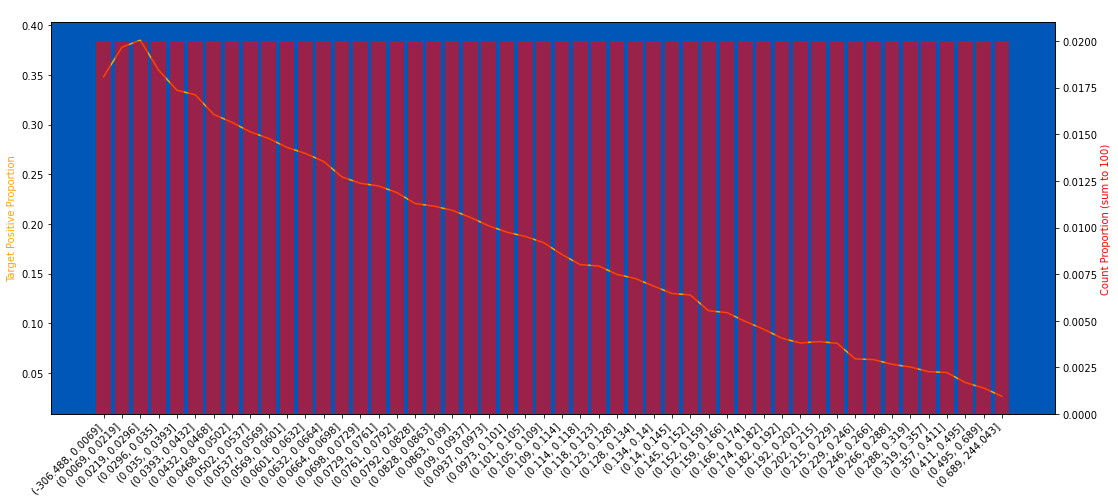

In [32]:
plot_target_check(train, "D_50", q=50, use_raw_bin=True)

In [33]:
train["D_50"] = train["D_50"].round(2)
test["D_50"] = test["D_50"].round(2)

3142402 null count, 0.568 null proportion
0.3005 of the targets have label = 1


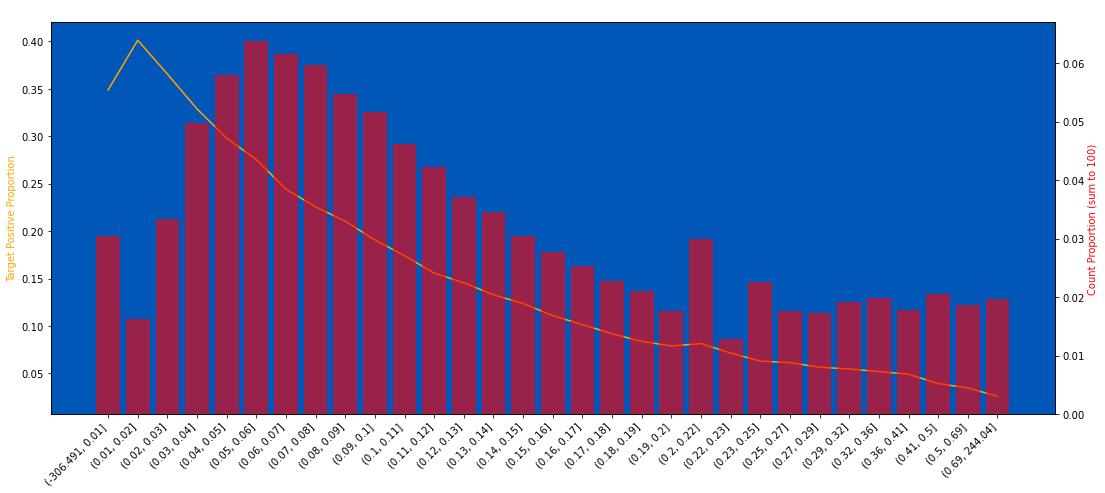

In [34]:
plot_target_check(train, "D_50", q=50, use_raw_bin=True)

### D_51

0 null count, 0.000 null proportion
nan of the targets have label = 1


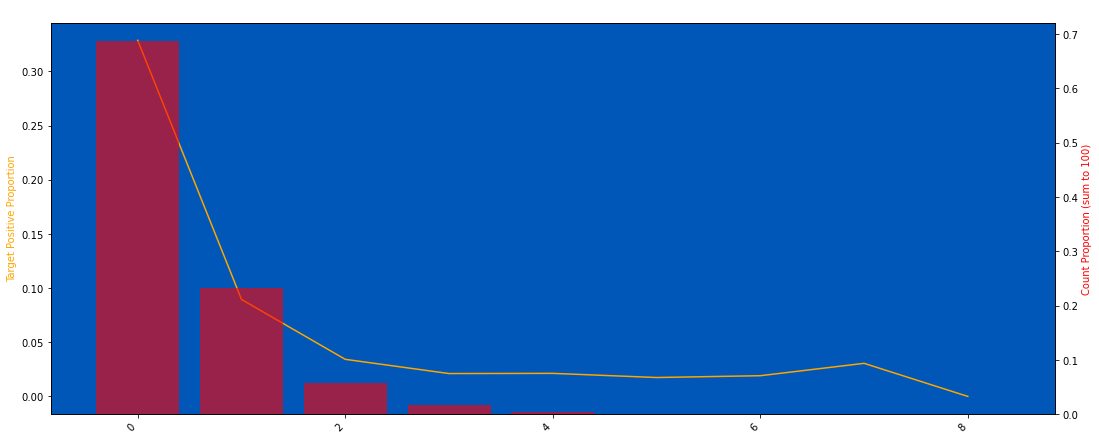

In [35]:
plot_target_check(train, "D_51", q=50, use_raw_bin=True)

### D_52

29563 null count, 0.005 null proportion
0.3523 of the targets have label = 1


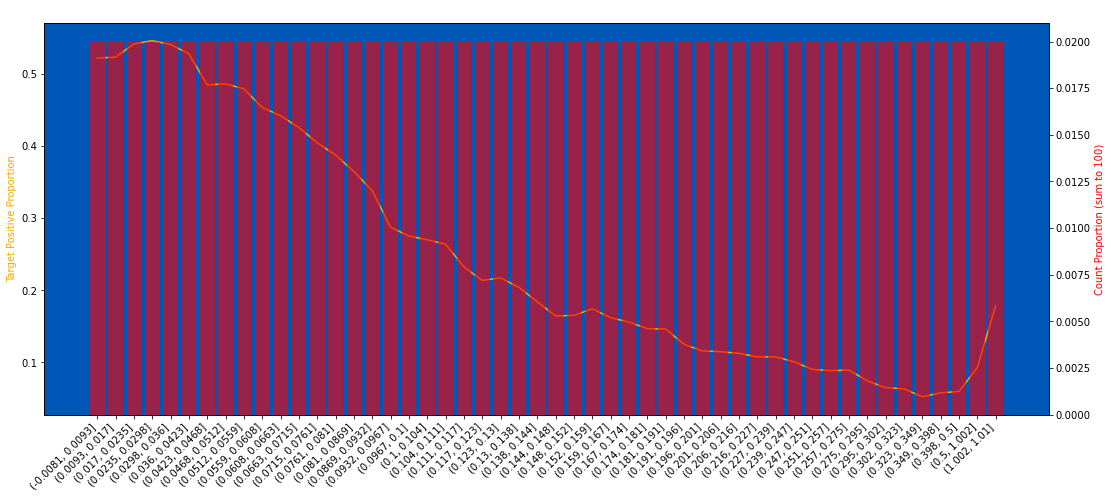

In [36]:
plot_target_check(train, "D_52", q=50, use_raw_bin=True)

In [37]:
train["D_52"] = train["D_52"].round(2)
test["D_52"] = test["D_52"].round(2)

In [38]:
train.loc[train["D_52"].between(-0.02, 0.005), "D_52"] = 0
test.loc[test["D_52"].between(-0.02, 0.005), "D_52"] = 0

In [39]:
train.loc[train["D_52"].between(0.995, 1.01), "D_52"] = 1
test.loc[test["D_52"].between(0.995, 1.01), "D_52"] = 1

29563 null count, 0.005 null proportion
0.3523 of the targets have label = 1


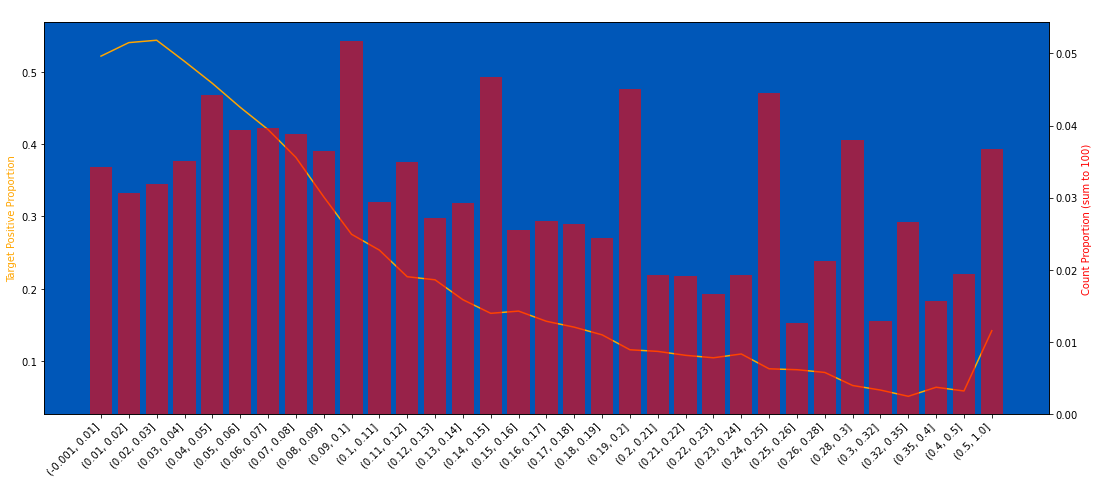

In [40]:
plot_target_check(train, "D_52", q=50, use_raw_bin=True)

### D_53

4084585 null count, 0.738 null proportion
0.1836 of the targets have label = 1


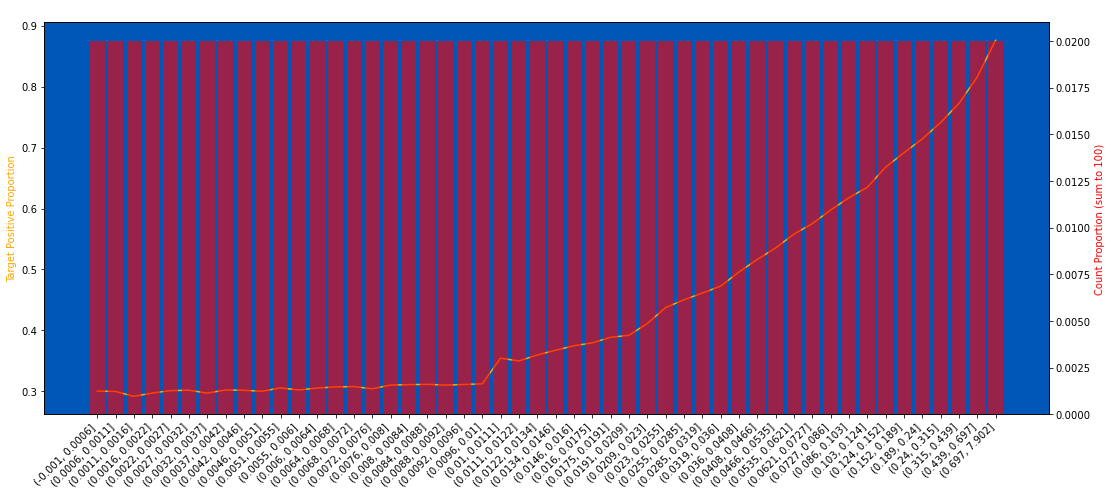

In [41]:
plot_target_check(train, "D_53", q=50, use_raw_bin=True)

In [42]:
train["D_53"] = train["D_53"].round(2)
test["D_53"] = test["D_53"].round(2)

4084585 null count, 0.738 null proportion
0.1836 of the targets have label = 1


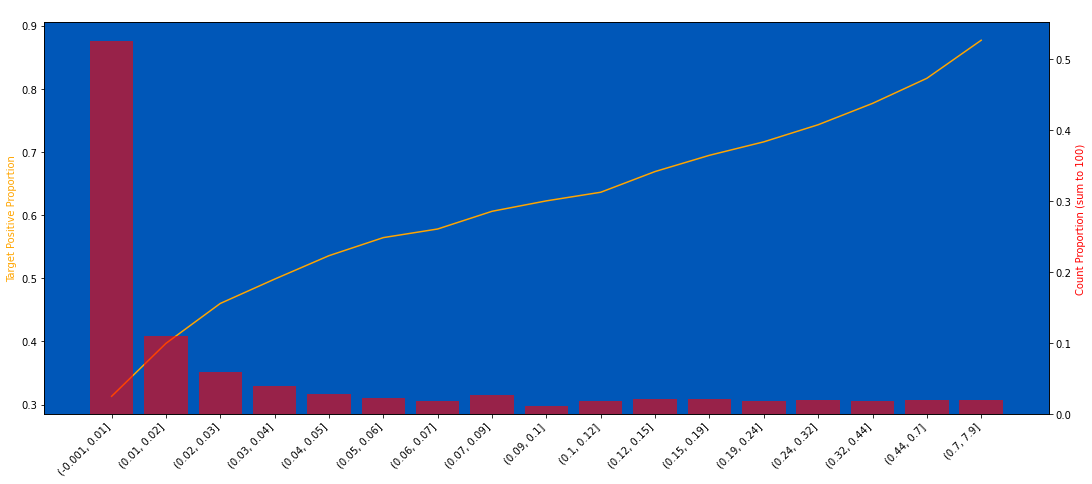

In [43]:
plot_target_check(train, "D_53", q=50, use_raw_bin=True)

### D_54

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


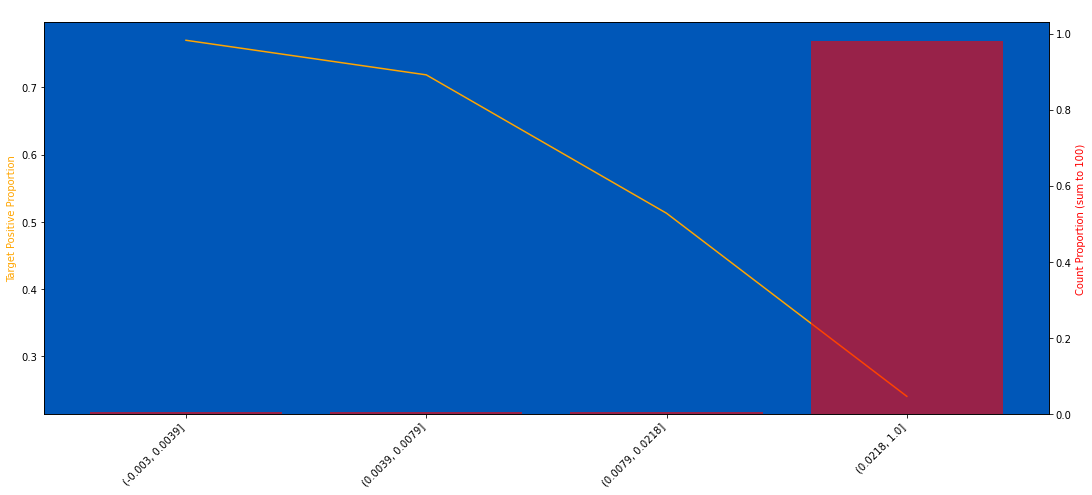

In [44]:
plot_target_check(train, "D_54", q=150, use_raw_bin=True)

### D_55

184803 null count, 0.033 null proportion
0.1759 of the targets have label = 1


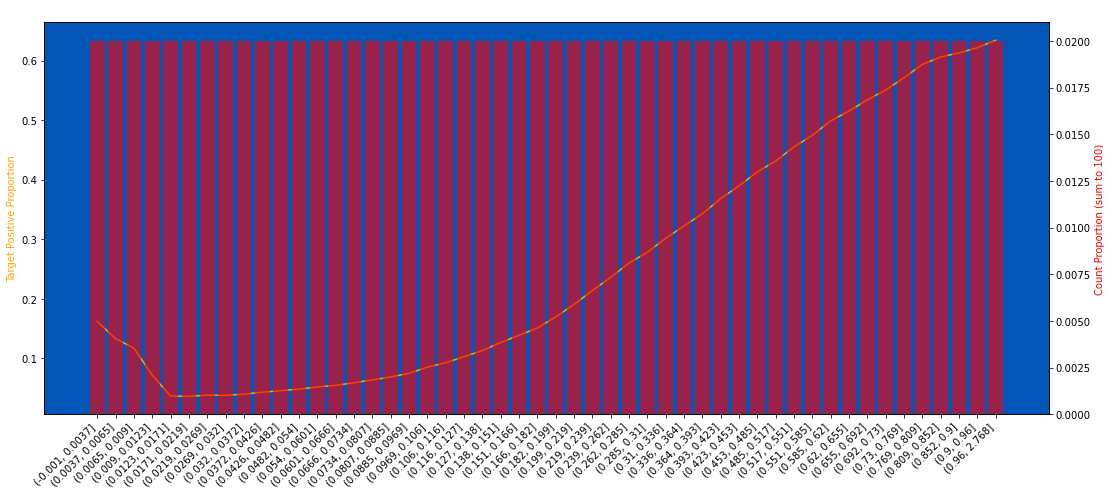

In [45]:
plot_target_check(train, "D_55", q=50, use_raw_bin=True)

In [46]:
train["D_55"] = train["D_55"].round(2)
test["D_55"] = test["D_55"].round(2)

184803 null count, 0.033 null proportion
0.1759 of the targets have label = 1


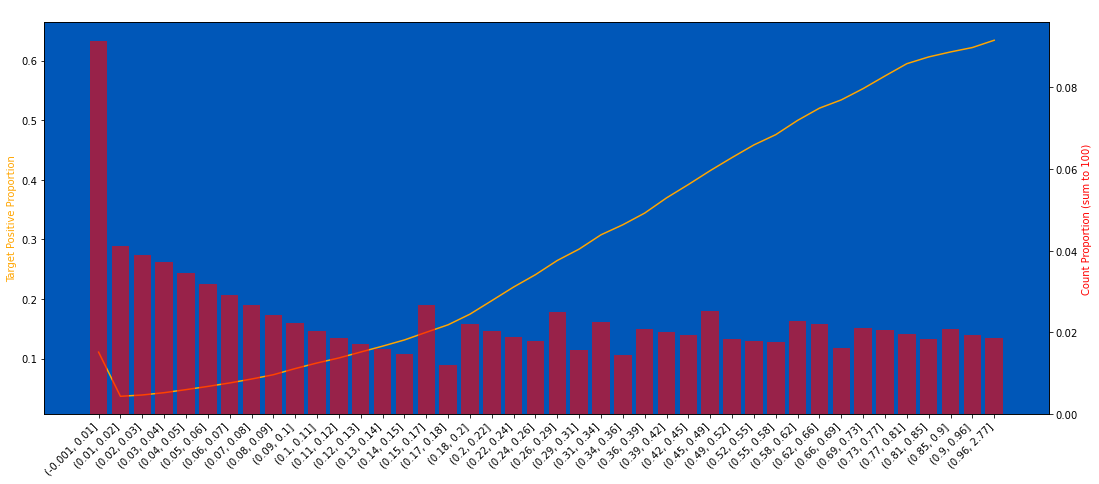

In [47]:
plot_target_check(train, "D_55", q=50, use_raw_bin=True)

### D_56

2990943 null count, 0.541 null proportion
0.3282 of the targets have label = 1


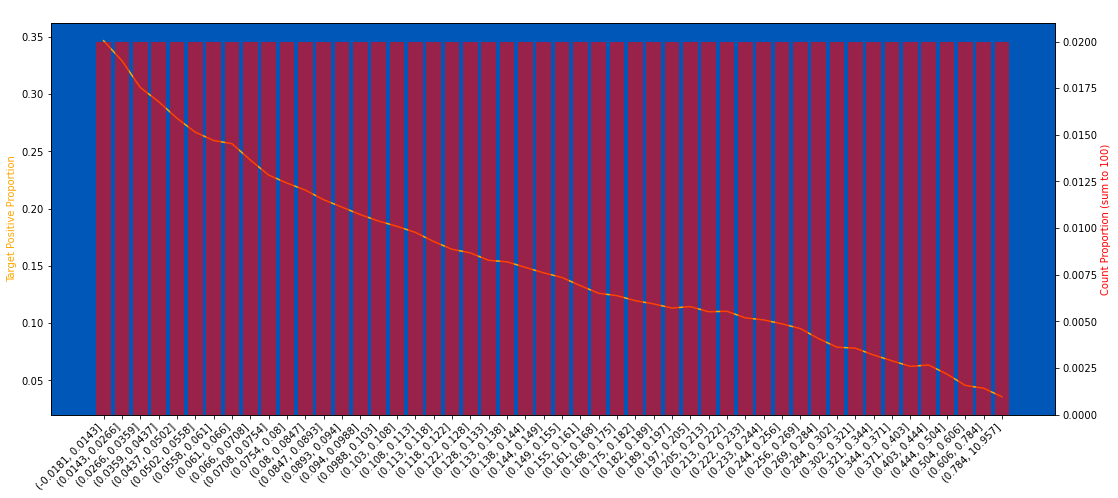

In [48]:
plot_target_check(train, "D_56", q=50, use_raw_bin=True)

In [49]:
train["D_56"] = train["D_56"].round(3)
test["D_56"] = test["D_56"].round(3)

2990943 null count, 0.541 null proportion
0.3282 of the targets have label = 1


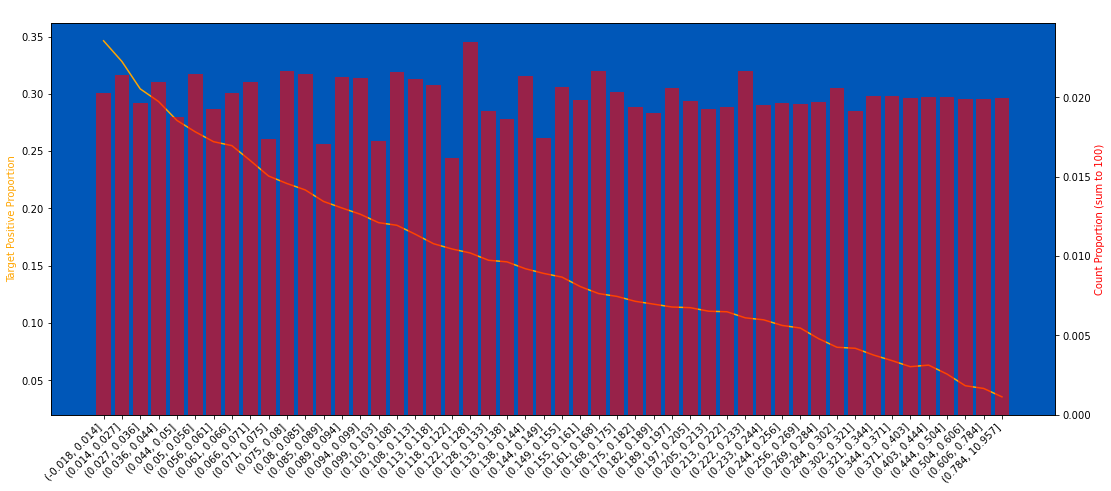

In [50]:
plot_target_check(train, "D_56", q=50, use_raw_bin=True)

### D_58

0 null count, 0.000 null proportion
nan of the targets have label = 1


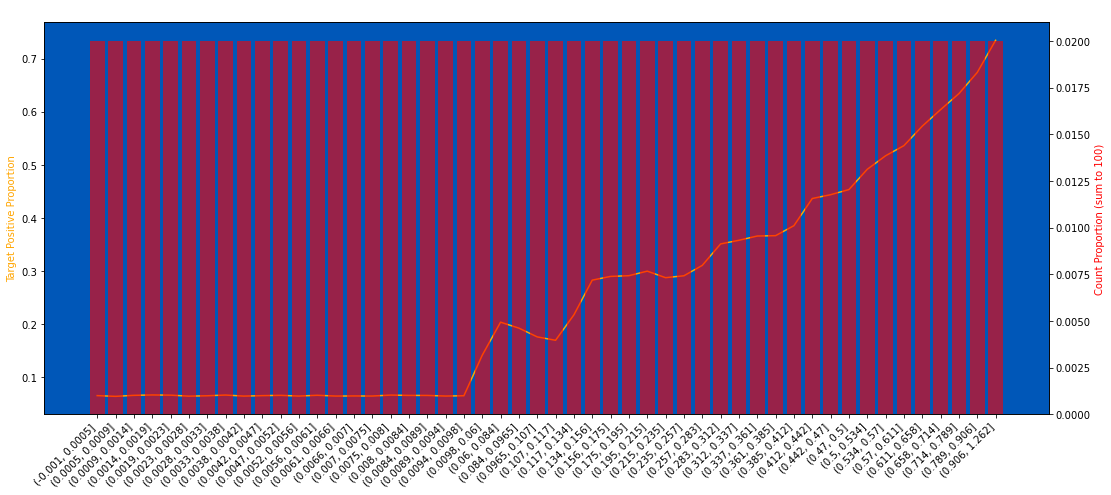

In [51]:
plot_target_check(train, "D_58", q=50, use_raw_bin=True)

In [52]:
train["D_58"] = train["D_58"].round(2)
test["D_58"] = test["D_58"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1


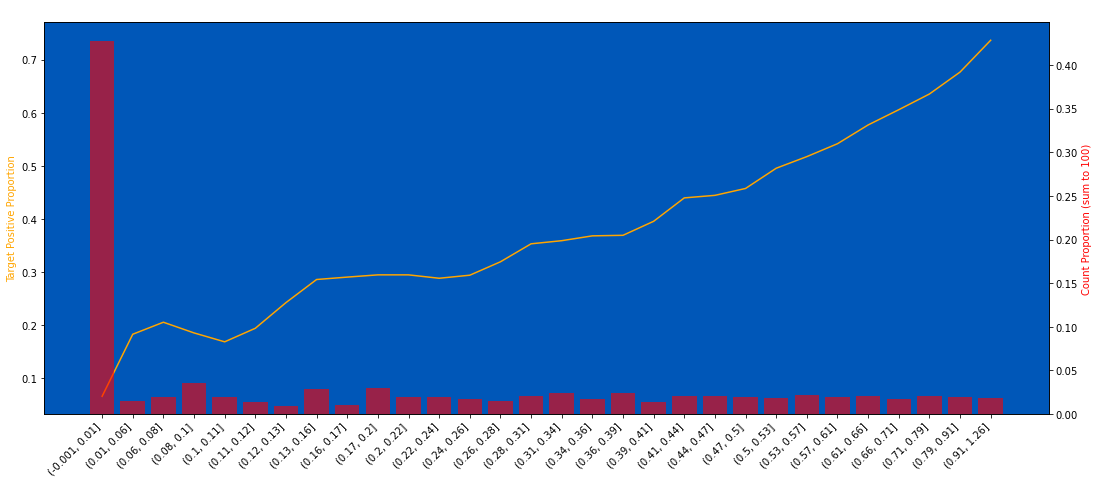

In [53]:
plot_target_check(train, "D_58", q=50, use_raw_bin=True)

### D_59

106725 null count, 0.019 null proportion
0.4218 of the targets have label = 1


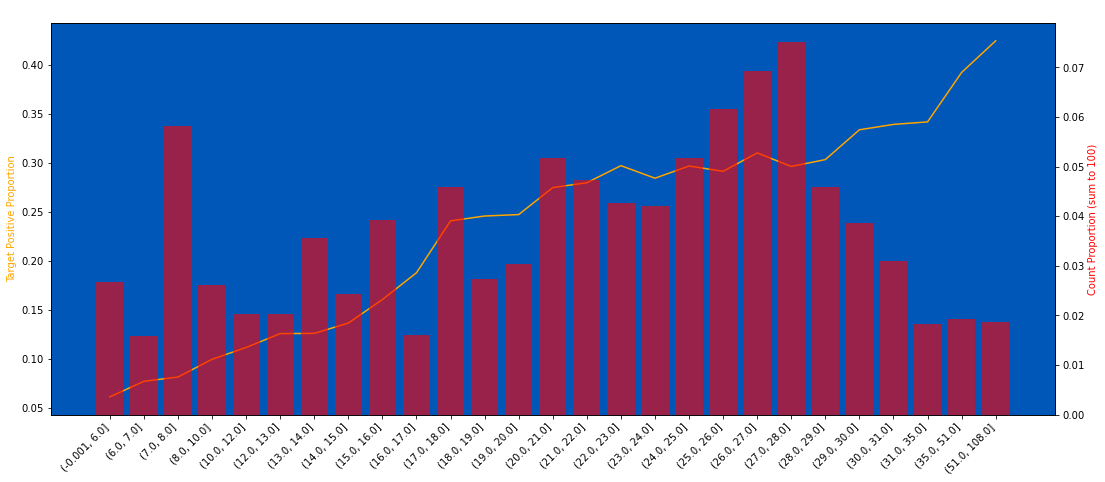

In [54]:
plot_target_check(train, "D_59", q=50, use_raw_bin=True)

### D_60

0 null count, 0.000 null proportion
nan of the targets have label = 1


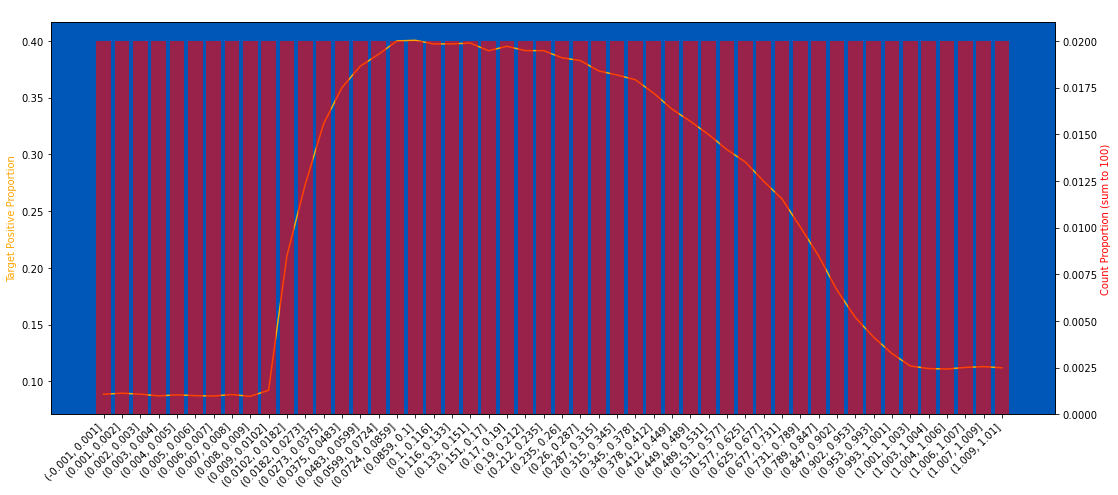

In [55]:
plot_target_check(train, "D_60", q=50, use_raw_bin=True)

In [56]:
train.loc[train["D_60"].between(-0.01, 0.01), "D_60"] = 0
test.loc[test["D_60"].between(-0.01, 0.01), "D_60"] = 0

In [57]:
train.loc[train["D_60"].between(1, 1.01), "D_60"] = 1
test.loc[test["D_60"].between(1, 1.01), "D_60"] = 1

0 null count, 0.000 null proportion
nan of the targets have label = 1


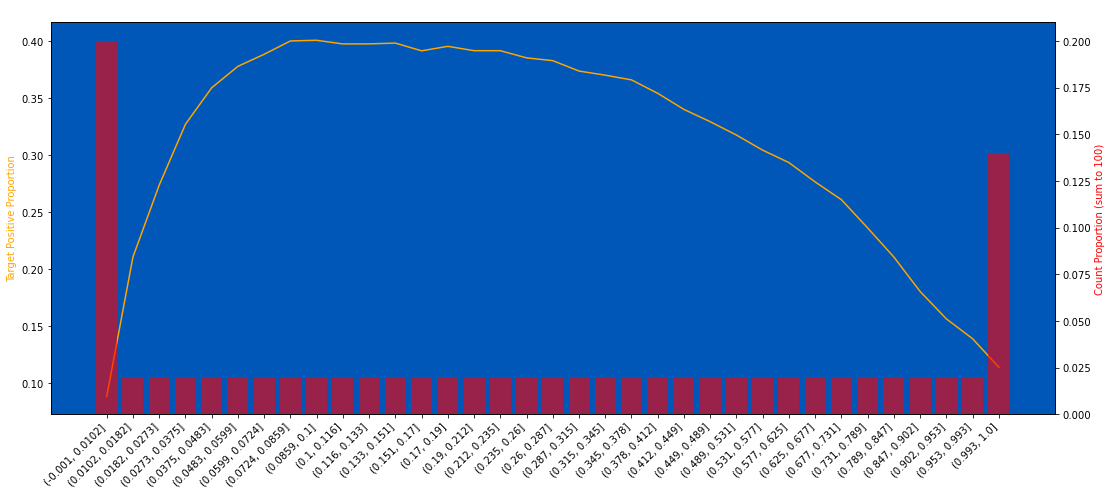

In [58]:
plot_target_check(train, "D_60", q=50, use_raw_bin=True)

### D_61

598052 null count, 0.108 null proportion
0.0849 of the targets have label = 1


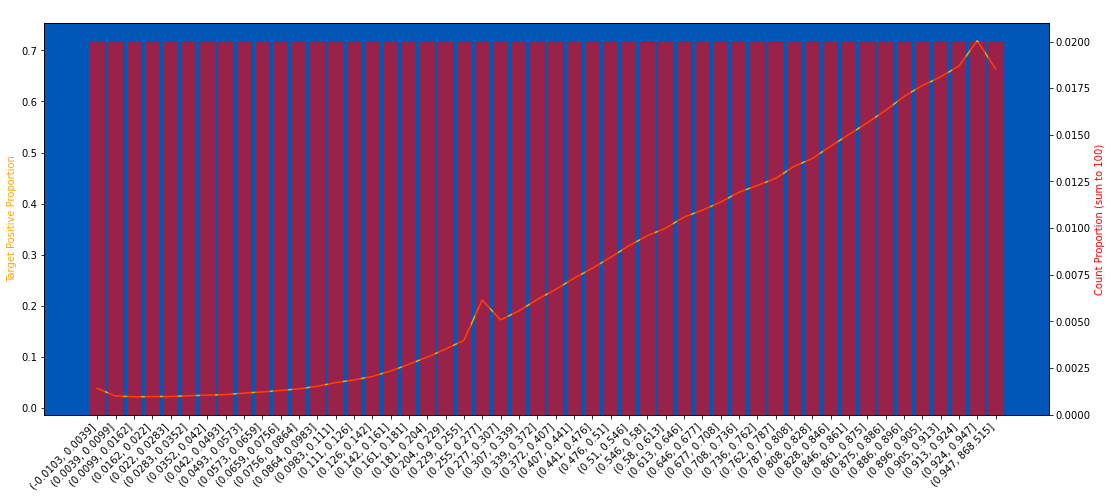

In [59]:
plot_target_check(train, "D_61", q=50, use_raw_bin=True)

In [60]:
train["D_61"] = train["D_61"].round(3)
test["D_61"] = test["D_61"].round(3)

598052 null count, 0.108 null proportion
0.0849 of the targets have label = 1


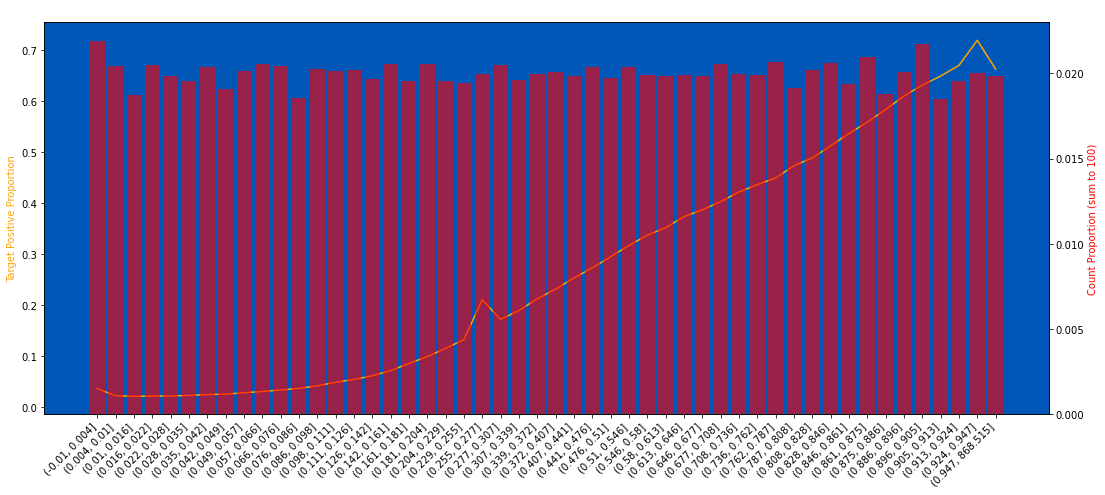

In [61]:
plot_target_check(train, "D_61", q=50, use_raw_bin=True)

### D_62

758161 null count, 0.137 null proportion
0.1127 of the targets have label = 1


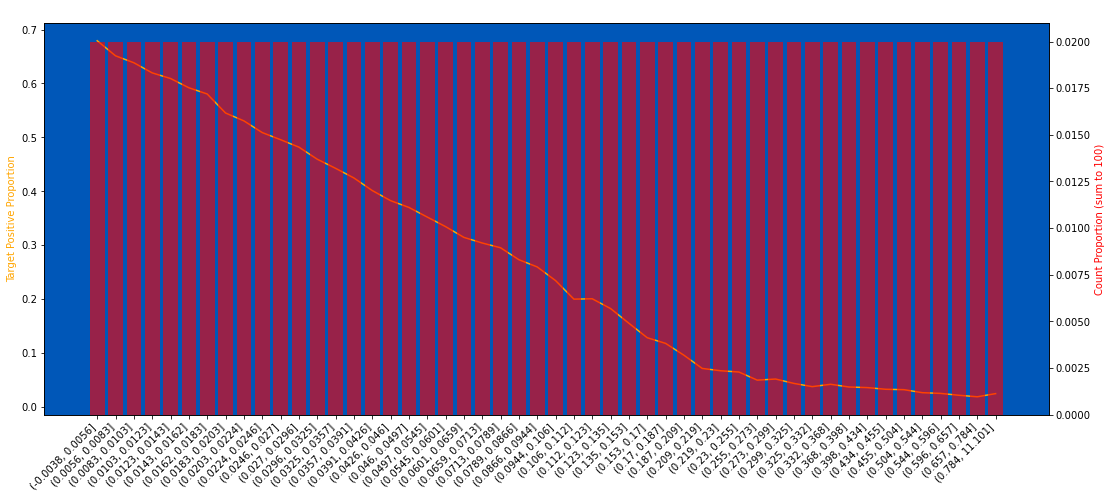

In [62]:
plot_target_check(train, "D_62", q=50, use_raw_bin=True)

In [63]:
train["D_62"] = train["D_62"].round(3)
test["D_62"] = test["D_62"].round(3)

758161 null count, 0.137 null proportion
0.1127 of the targets have label = 1


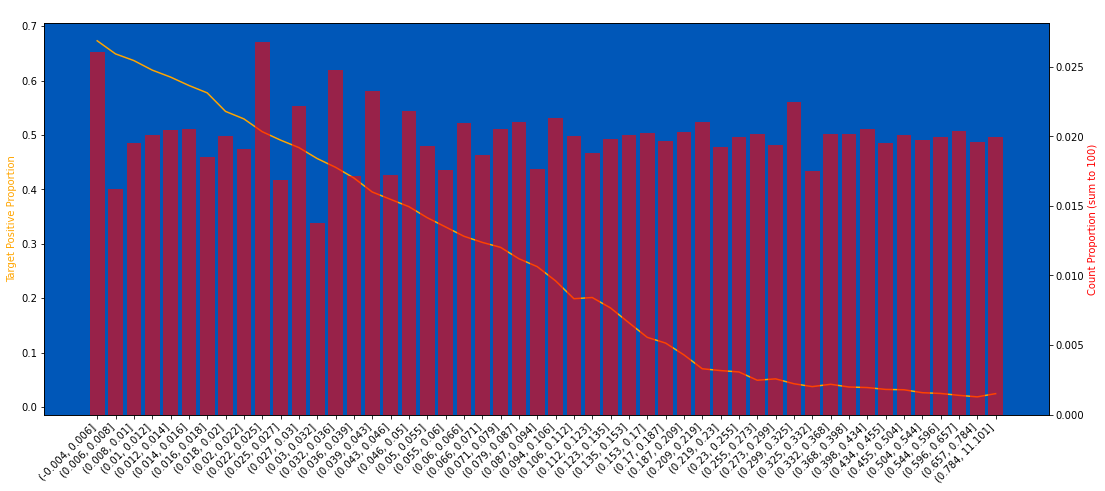

In [64]:
plot_target_check(train, "D_62", q=50, use_raw_bin=True)

### D_63

0 null count, 0.000 null proportion
nan of the targets have label = 1


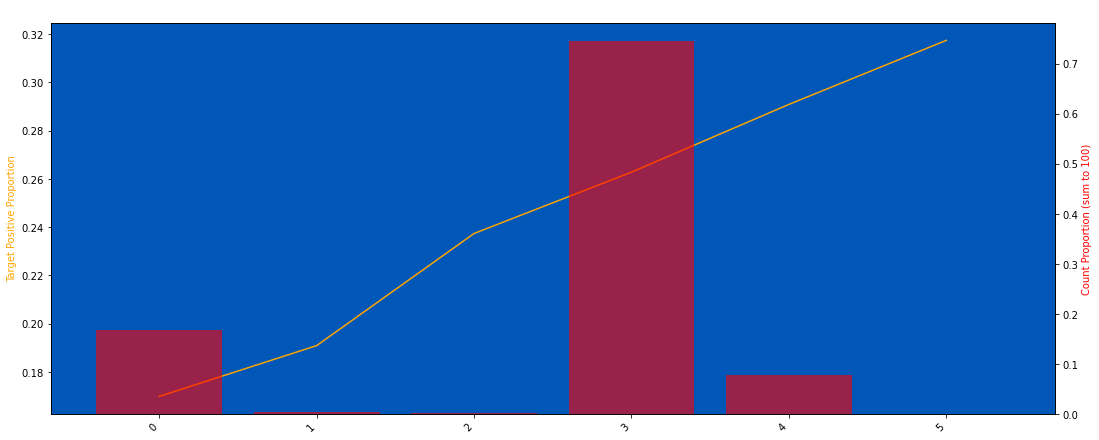

In [65]:
plot_target_check(train, "D_63", q=50, use_raw_bin=True)

### D_64

217442 null count, 0.039 null proportion
0.4086 of the targets have label = 1


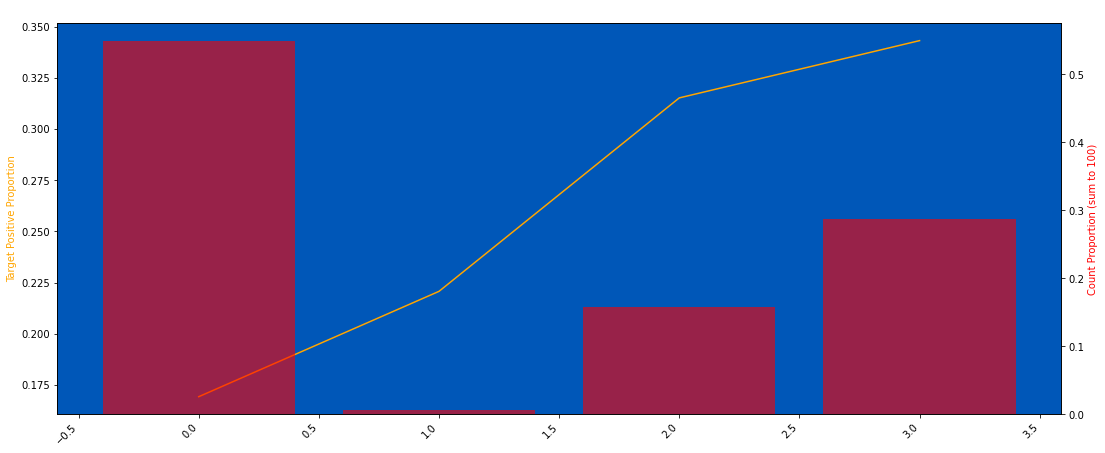

In [66]:
plot_target_check(train, "D_64", q=50, use_raw_bin=True)

### D_65

0 null count, 0.000 null proportion
nan of the targets have label = 1


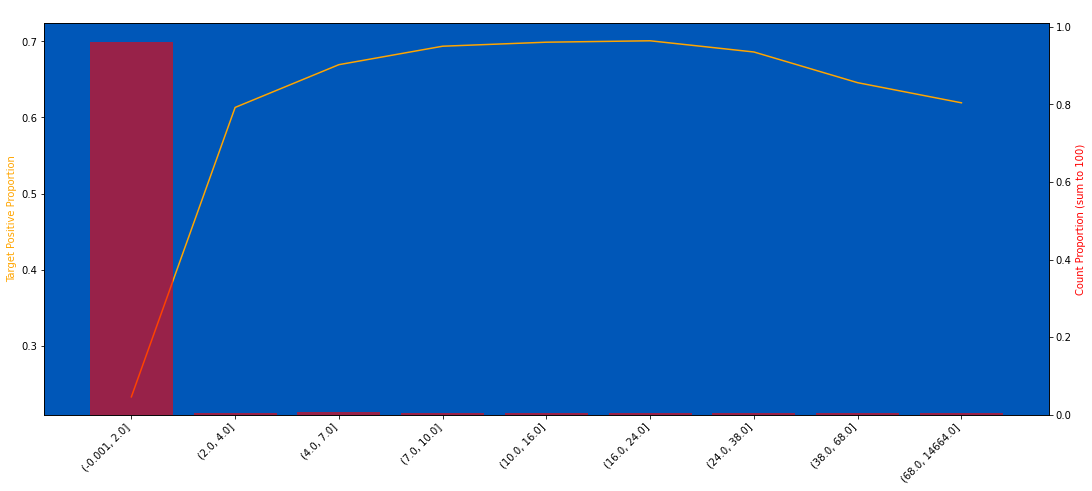

In [67]:
plot_target_check(train, "D_65", q=200, use_raw_bin=True)

### D_66

4908097 null count, 0.887 null proportion
0.2572 of the targets have label = 1


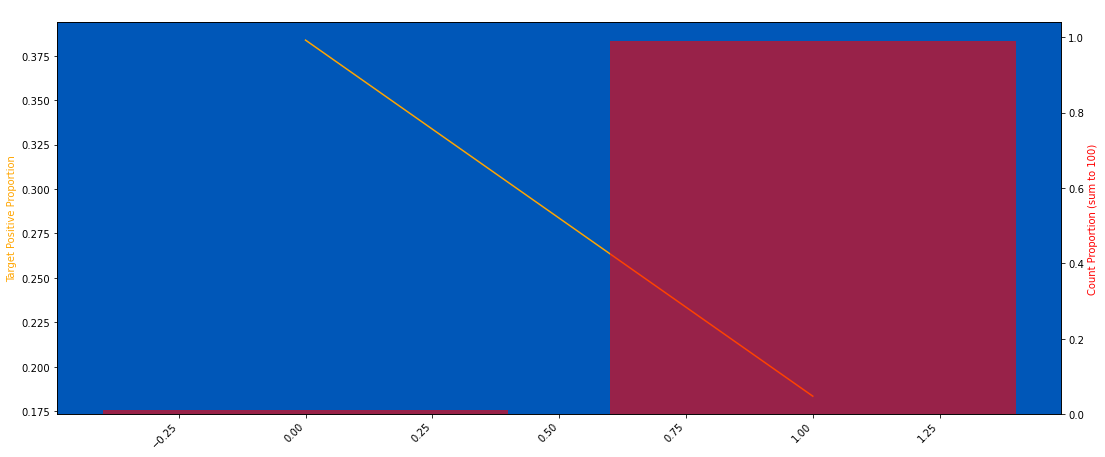

In [68]:
plot_target_check(train, "D_66", q=50, use_raw_bin=True)

### D_68

216503 null count, 0.039 null proportion
0.4145 of the targets have label = 1


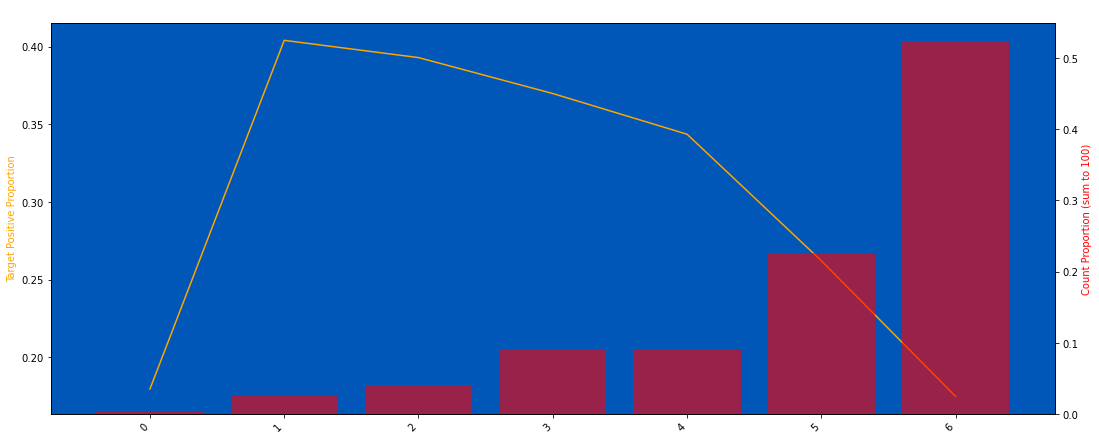

In [69]:
plot_target_check(train, "D_68", q=50, use_raw_bin=True)

- D_68 has one additional category (0) in training set which is not in test set

In [70]:
train["D_68"] = train["D_68"].replace(0, 6)
test["D_68"] = test["D_68"].replace(0, 6)

- Category 0 has similar target distribution as category 6, merge it into category 6

216503 null count, 0.039 null proportion
0.4145 of the targets have label = 1


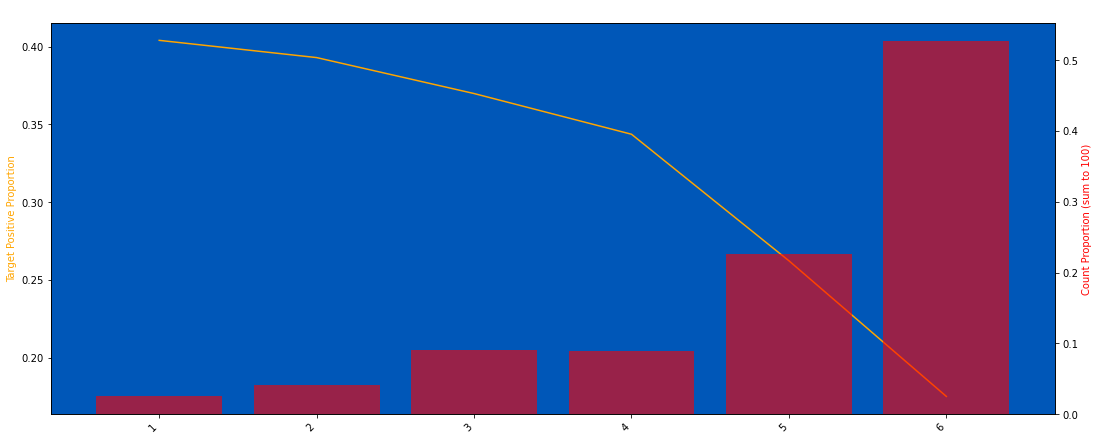

In [71]:
plot_target_check(train, "D_68", q=50, use_raw_bin=True)

### D_69

194473 null count, 0.035 null proportion
0.4308 of the targets have label = 1


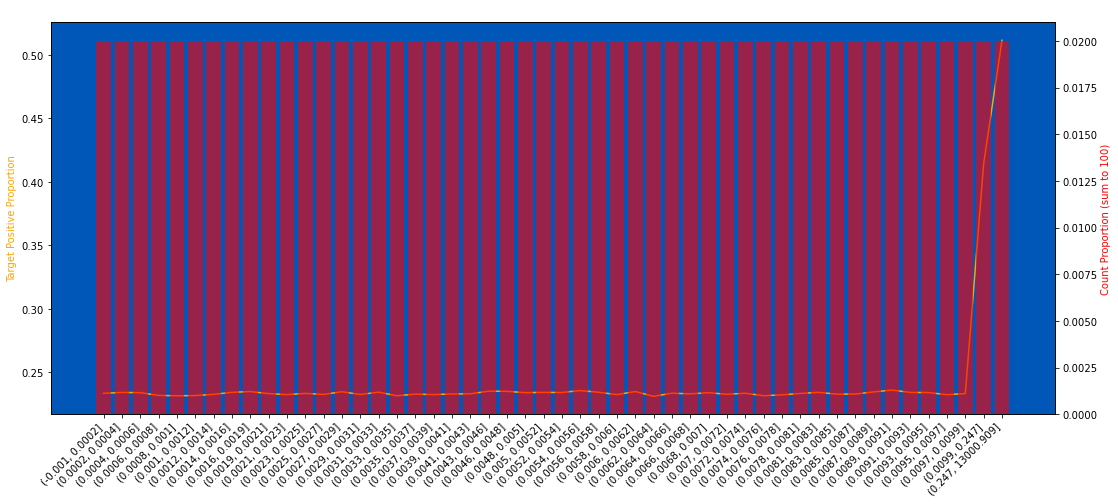

In [72]:
plot_target_check(train, "D_69", q=50, use_raw_bin=True)

In [73]:
train["D_69"] = train["D_69"].round(2)
test["D_69"] = test["D_69"].round(2)

194473 null count, 0.035 null proportion
0.4308 of the targets have label = 1


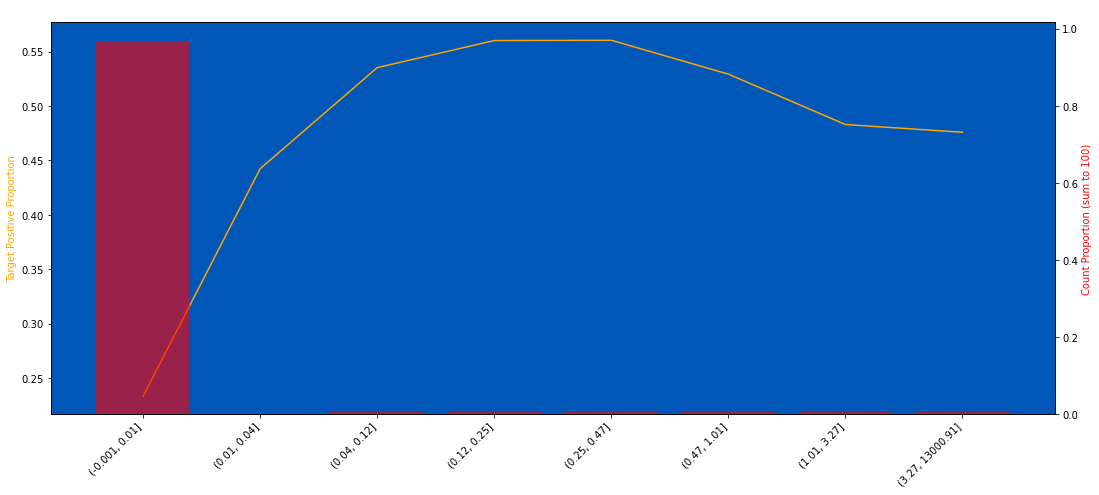

In [74]:
plot_target_check(train, "D_69", q=200, use_raw_bin=True)

### D_70

94917 null count, 0.017 null proportion
0.4203 of the targets have label = 1


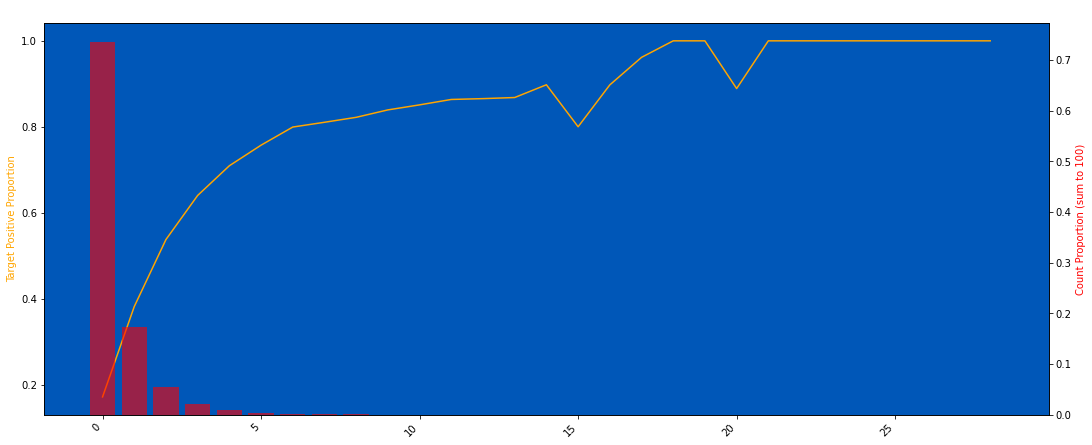

In [75]:
plot_target_check(train, "D_70", q=50, use_raw_bin=True)

### D_71

0 null count, 0.000 null proportion
nan of the targets have label = 1


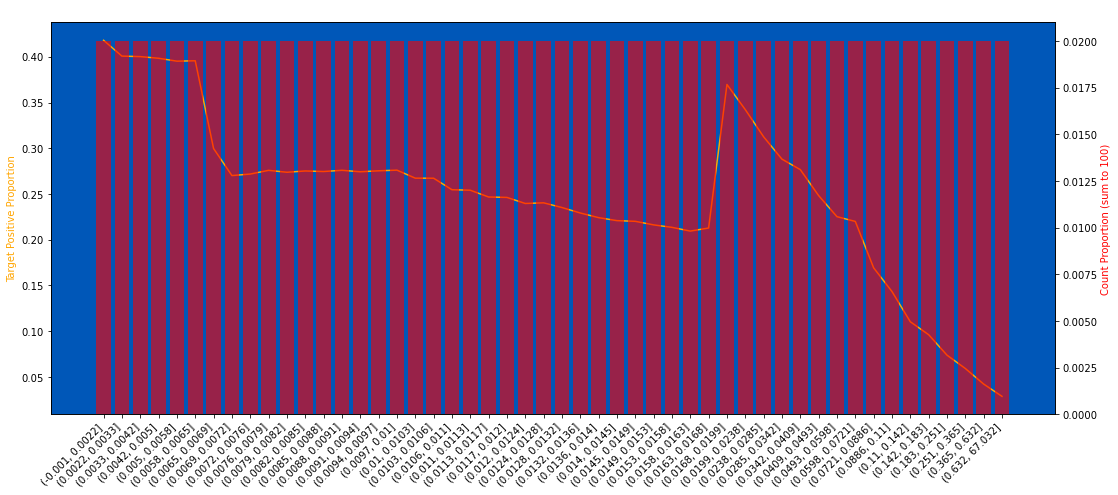

In [76]:
plot_target_check(train, "D_71", q=50, use_raw_bin=True)

In [77]:
train["D_71"] = train["D_71"].round(3)
test["D_71"] = test["D_71"].round(3)

0 null count, 0.000 null proportion
nan of the targets have label = 1


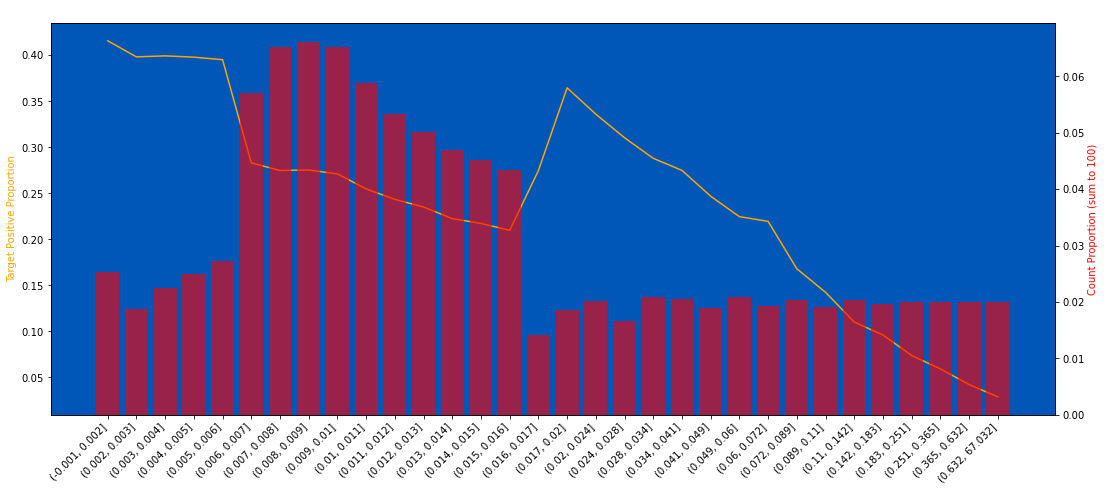

In [78]:
plot_target_check(train, "D_71", q=50, use_raw_bin=True)

### D_72

23708 null count, 0.004 null proportion
0.3495 of the targets have label = 1


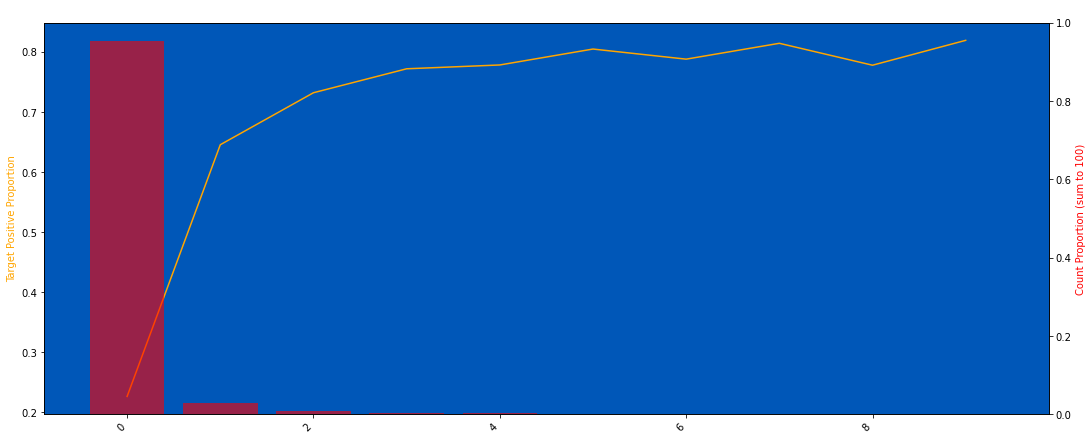

In [79]:
plot_target_check(train, "D_72", q=50, use_raw_bin=True)

### D_73

5475595 null count, 0.990 null proportion
0.2478 of the targets have label = 1


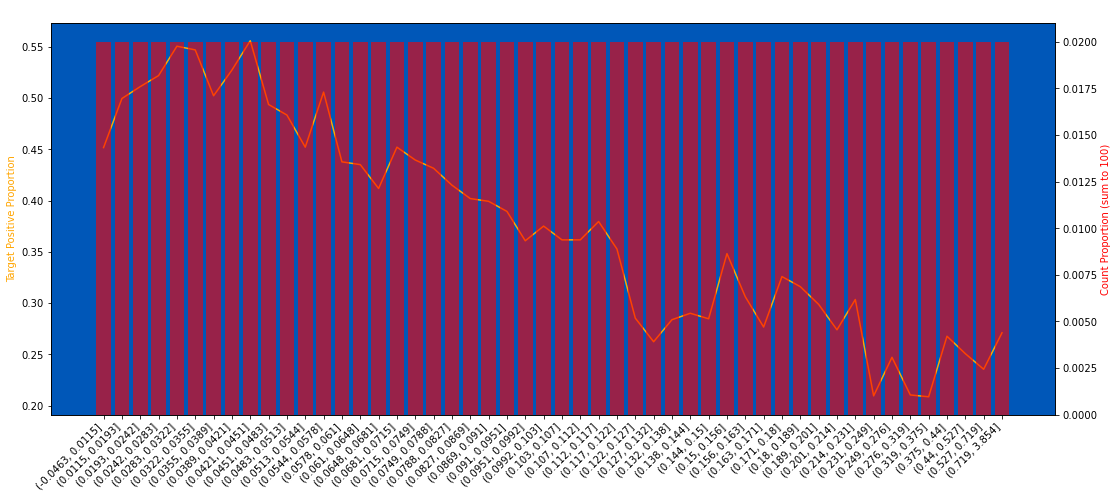

In [80]:
plot_target_check(train, "D_73", q=50, use_raw_bin=True)

In [81]:
train["D_73"] = train["D_73"].round(3)
test["D_73"] = test["D_73"].round(3)

5475595 null count, 0.990 null proportion
0.2478 of the targets have label = 1


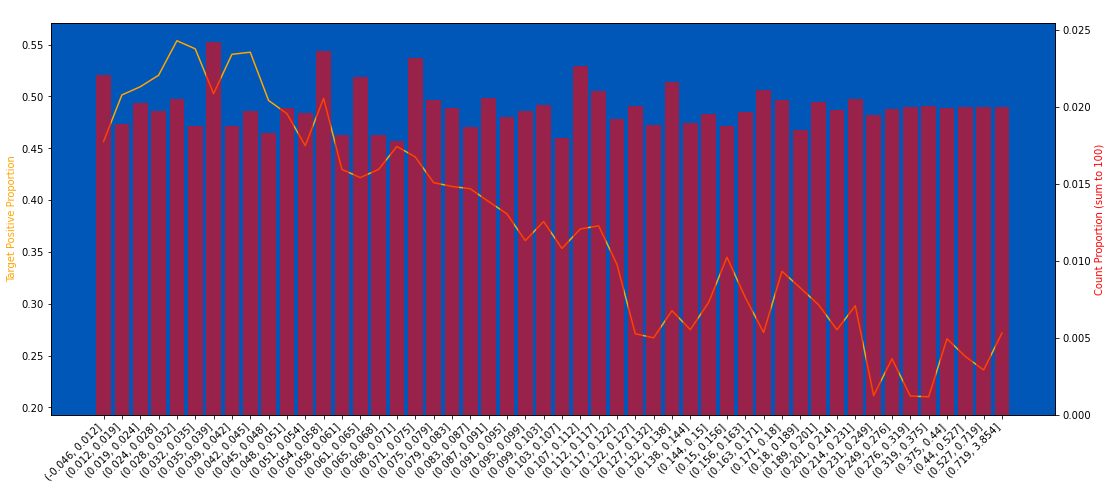

In [82]:
plot_target_check(train, "D_73", q=50, use_raw_bin=True)

### D_74

21773 null count, 0.004 null proportion
0.1709 of the targets have label = 1


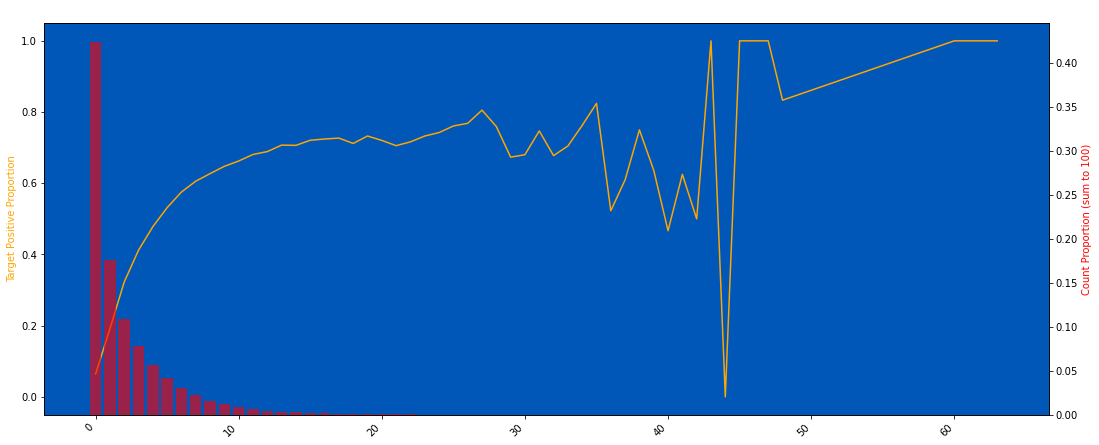

In [83]:
plot_target_check(train, "D_74", q=50, use_raw_bin=True)

### D_75

0 null count, 0.000 null proportion
nan of the targets have label = 1


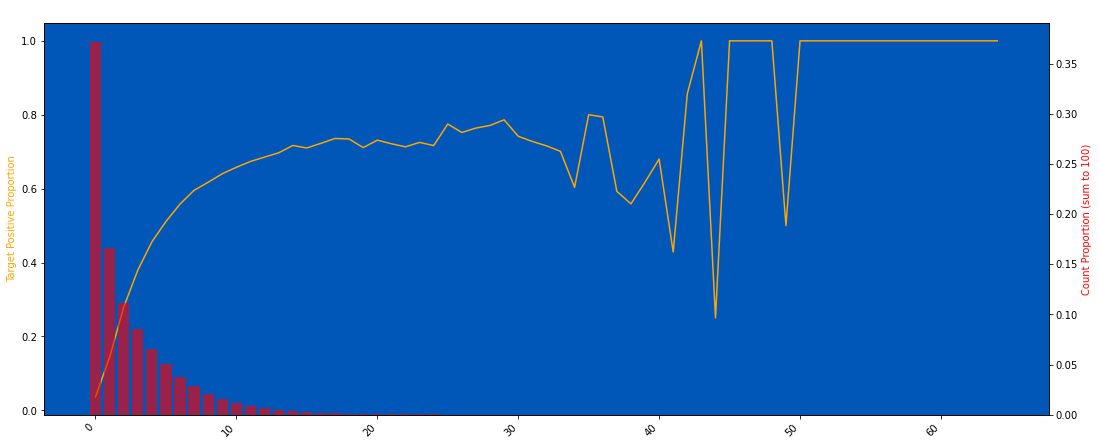

In [84]:
plot_target_check(train, "D_75", q=50, use_raw_bin=True)

### D_76

4908954 null count, 0.887 null proportion
0.2677 of the targets have label = 1


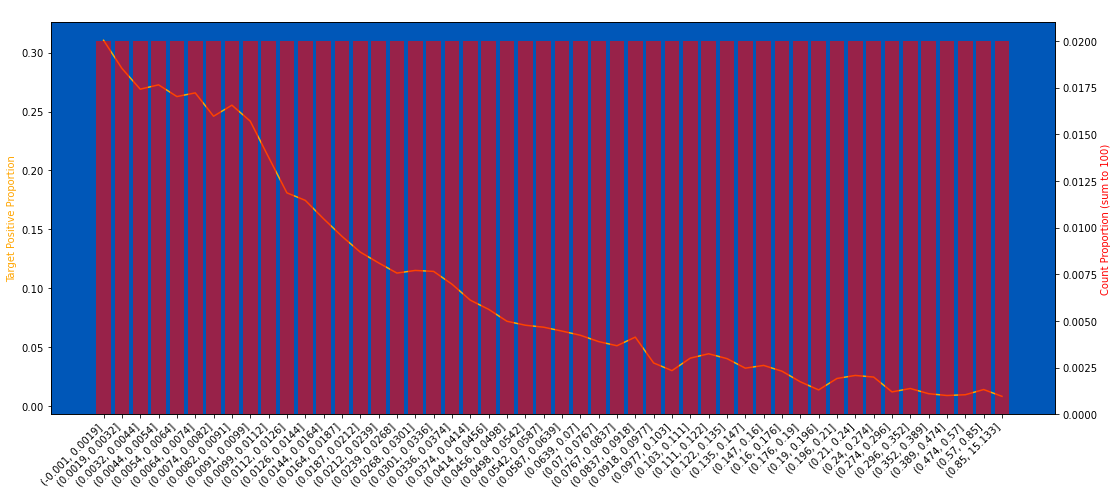

In [85]:
plot_target_check(train, "D_76", q=50, use_raw_bin=True)

In [86]:
train["D_76"] = train["D_76"].round(3)
test["D_76"] = test["D_76"].round(3)

4908954 null count, 0.887 null proportion
0.2677 of the targets have label = 1


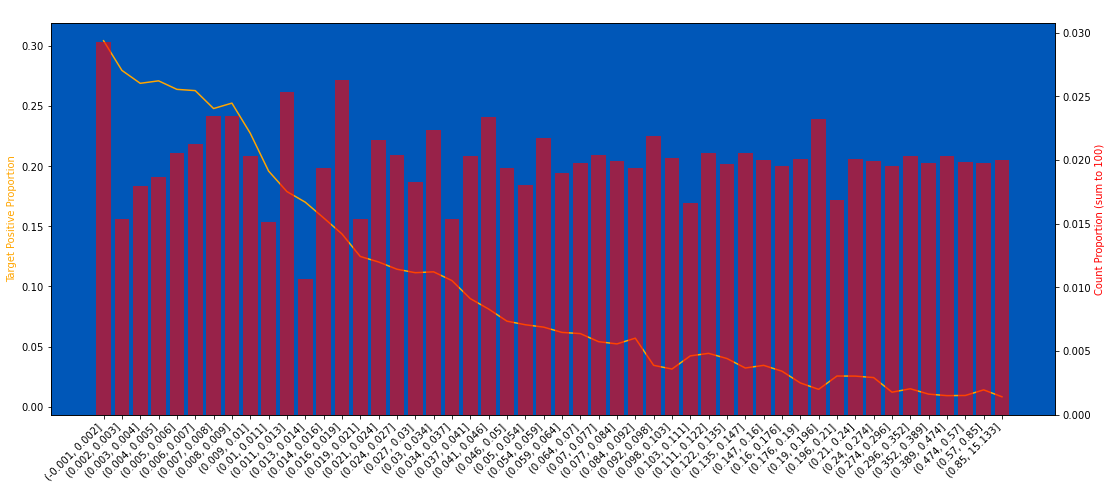

In [87]:
plot_target_check(train, "D_76", q=50, use_raw_bin=True)

### D_77

2513912 null count, 0.454 null proportion
0.3395 of the targets have label = 1


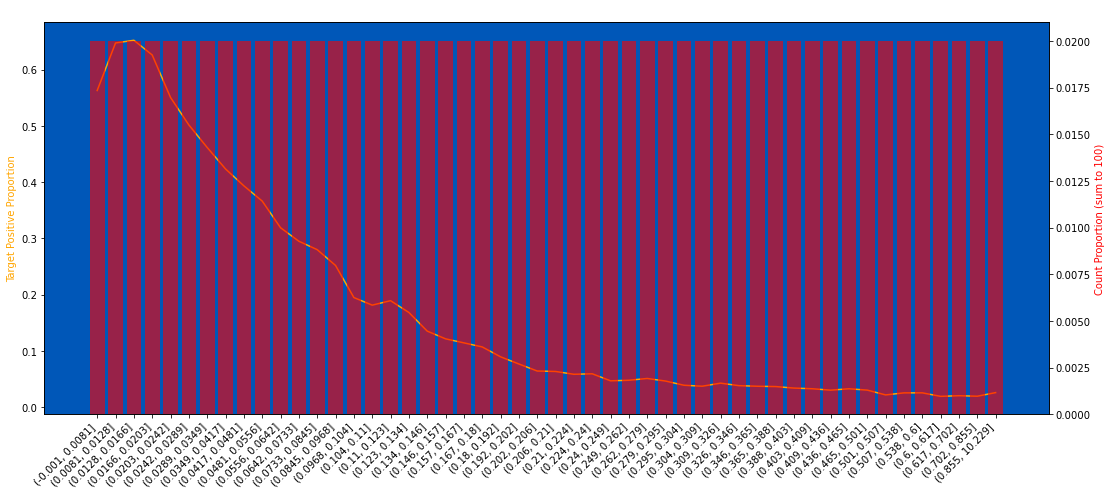

In [88]:
plot_target_check(train, "D_77", q=50, use_raw_bin=True)

In [89]:
train["D_77"] = train["D_77"].round(3)
test["D_77"] = test["D_77"].round(3)

2513912 null count, 0.454 null proportion
0.3395 of the targets have label = 1


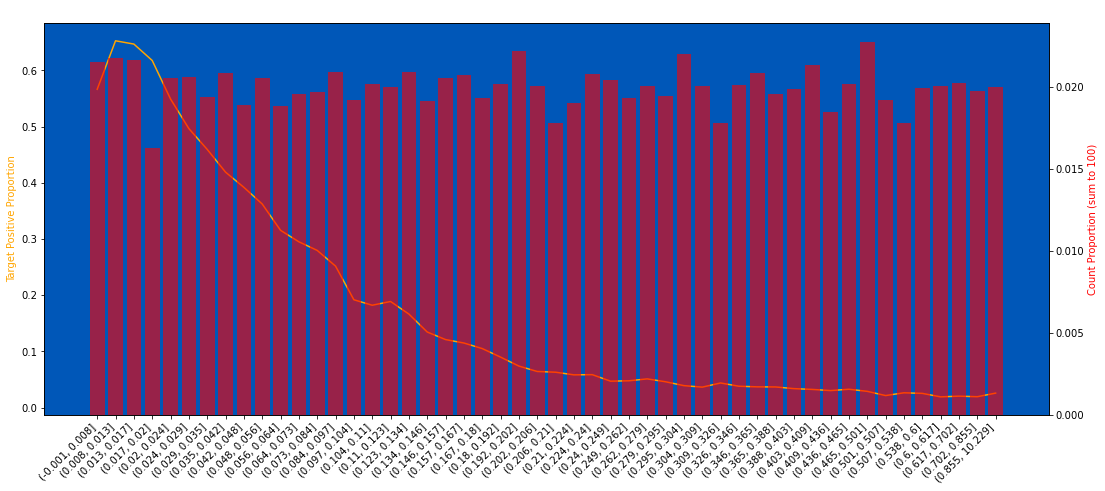

In [90]:
plot_target_check(train, "D_77", q=50, use_raw_bin=True)

### D_78

274319 null count, 0.050 null proportion
0.2406 of the targets have label = 1


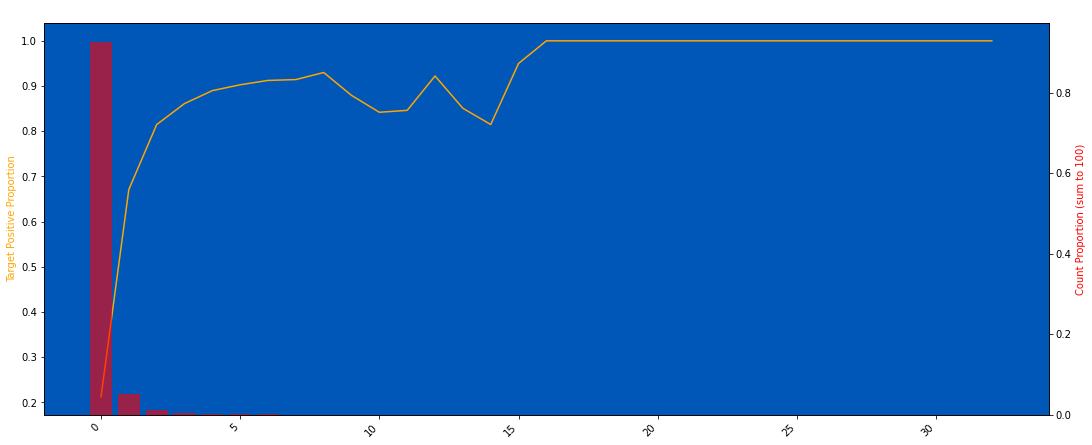

In [91]:
plot_target_check(train, "D_78", q=50, use_raw_bin=True)

### D_79

75939 null count, 0.014 null proportion
0.3761 of the targets have label = 1


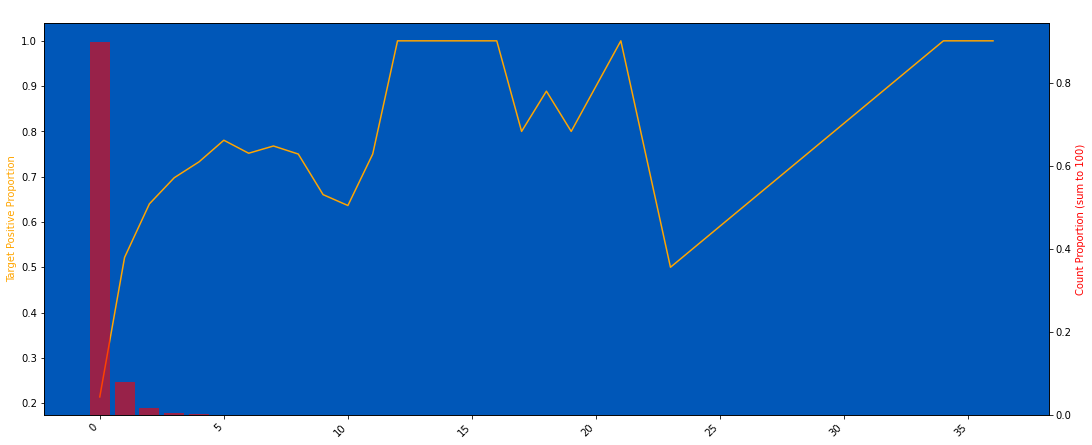

In [92]:
plot_target_check(train, "D_79", q=50, use_raw_bin=True)

### D_80

21773 null count, 0.004 null proportion
0.1709 of the targets have label = 1


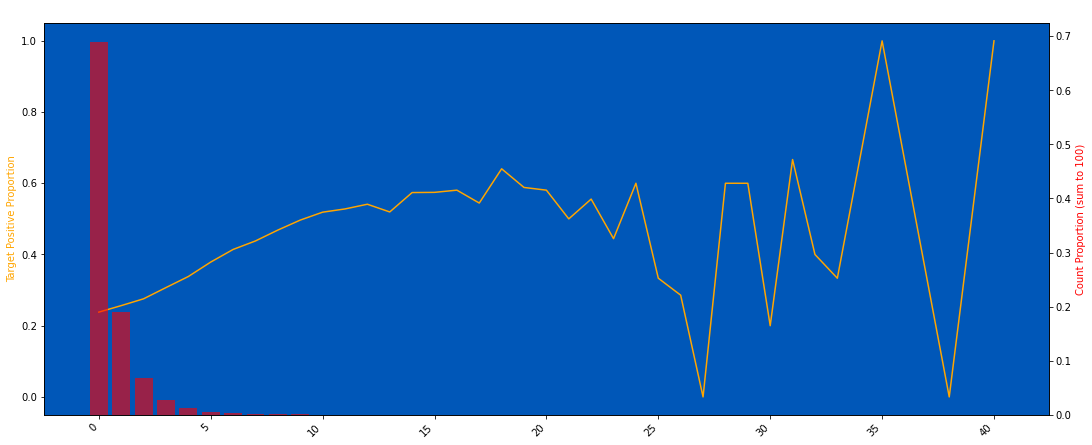

In [93]:
plot_target_check(train, "D_80", q=50, use_raw_bin=True)

### D_81

25687 null count, 0.005 null proportion
0.3798 of the targets have label = 1


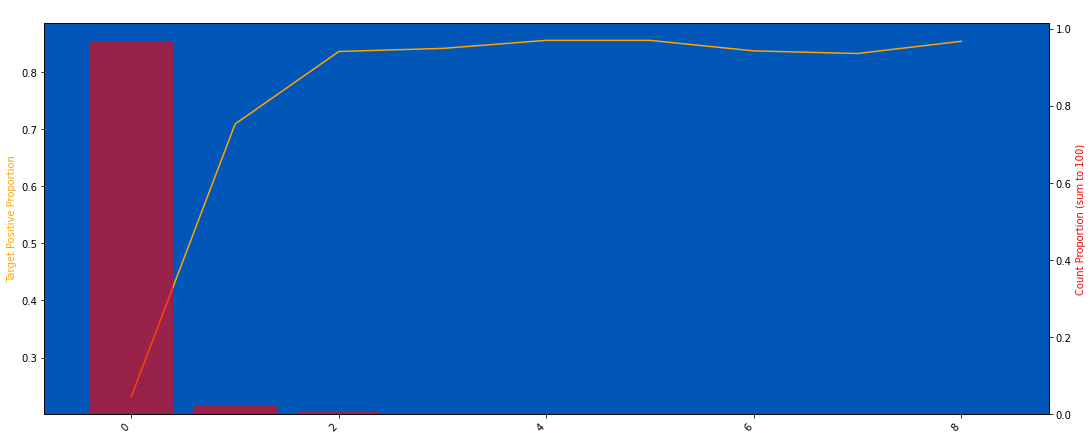

In [94]:
plot_target_check(train, "D_81", q=50, use_raw_bin=True)

### D_82

4058614 null count, 0.734 null proportion
0.2648 of the targets have label = 1


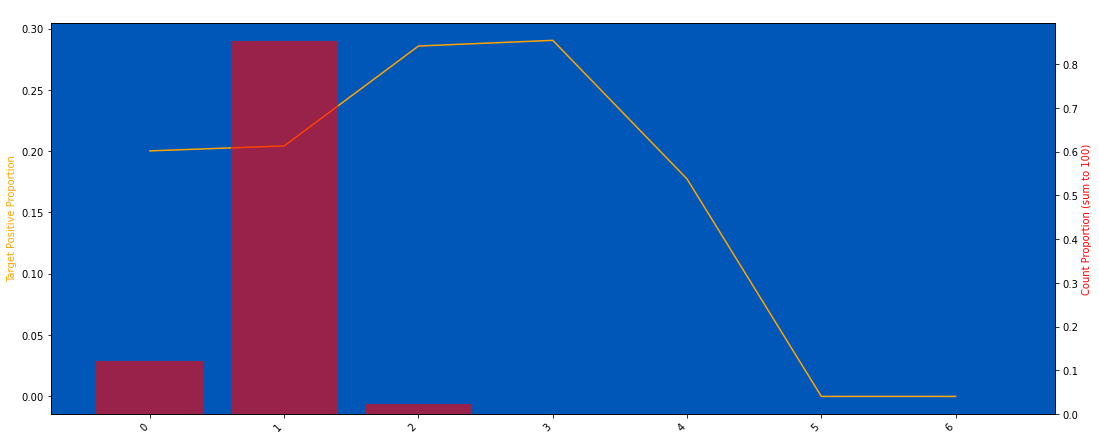

In [95]:
plot_target_check(train, "D_82", q=50, use_raw_bin=True)

### D_83

194473 null count, 0.035 null proportion
0.4308 of the targets have label = 1


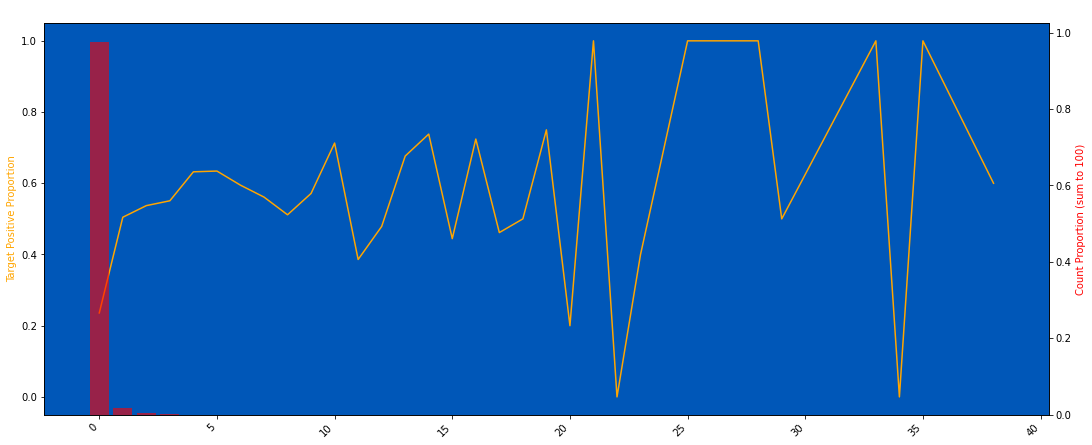

In [96]:
plot_target_check(train, "D_83", q=50, use_raw_bin=True)

### D_84

29563 null count, 0.005 null proportion
0.3523 of the targets have label = 1


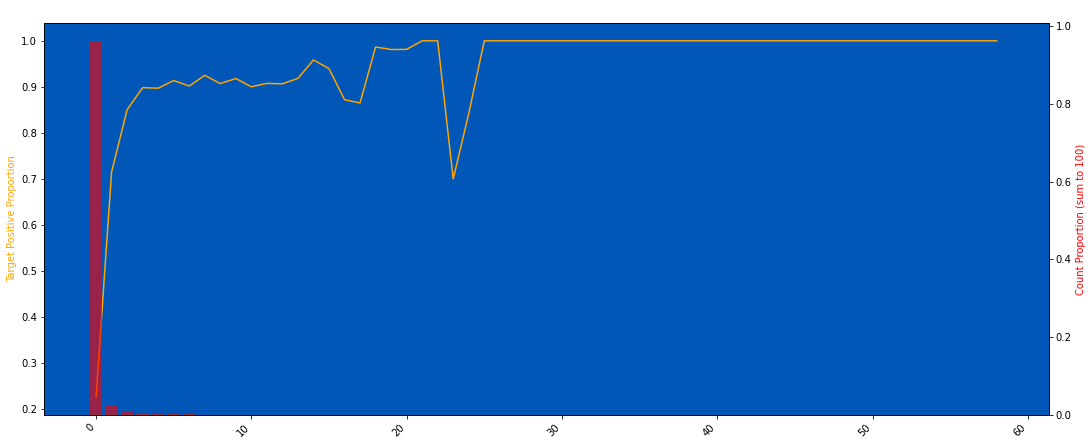

In [97]:
plot_target_check(train, "D_84", q=50, use_raw_bin=True)

### D_86

0 null count, 0.000 null proportion
nan of the targets have label = 1


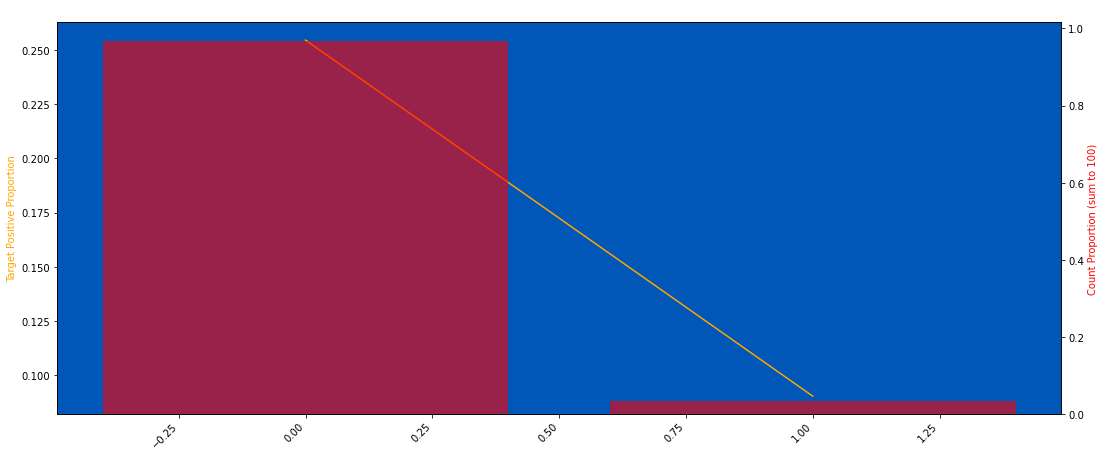

In [98]:
plot_target_check(train, "D_86", q=50, use_raw_bin=True)

### D_87

5527586 null count, 0.999 null proportion
0.2487 of the targets have label = 1


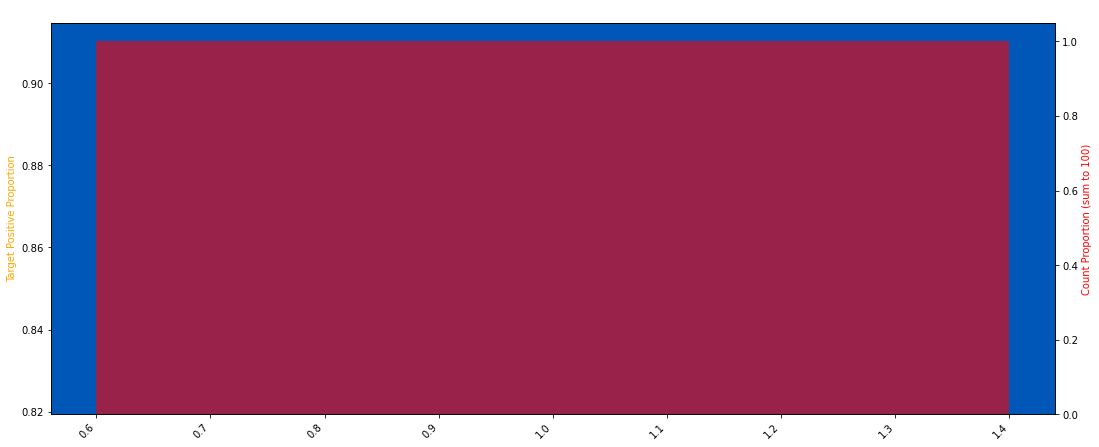

In [99]:
plot_target_check(train, "D_87", q=200, use_raw_bin=True)

In [100]:
%time
train = train.drop(columns="D_87", errors="ignore")
test = test.drop(columns="D_87", errors="ignore")

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.05 µs


### D_88

5525447 null count, 0.999 null proportion
0.2485 of the targets have label = 1


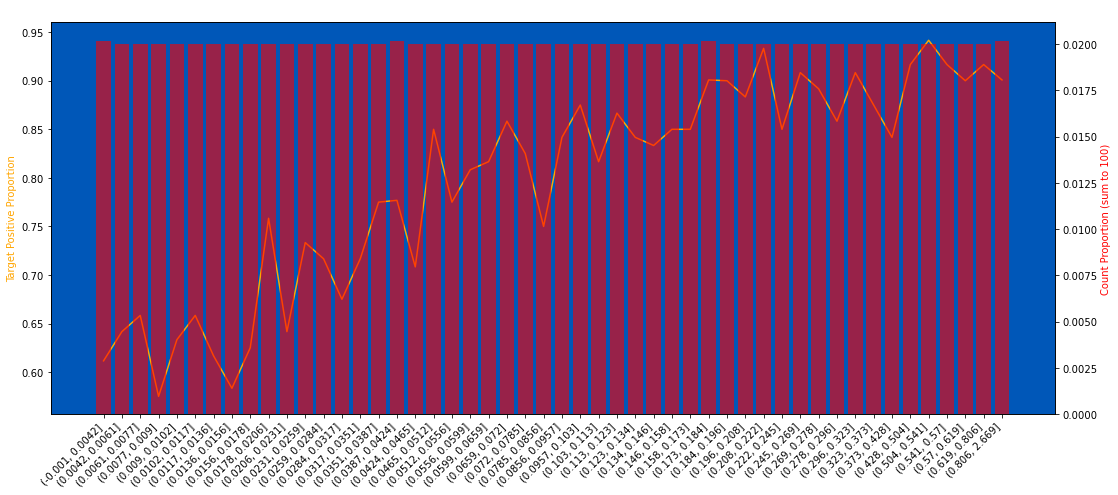

In [101]:
plot_target_check(train, "D_88", q=50, use_raw_bin=True)

In [102]:
train["D_88"] = train["D_88"].round(2)
test["D_88"] = test["D_88"].round(2)

5525447 null count, 0.999 null proportion
0.2485 of the targets have label = 1


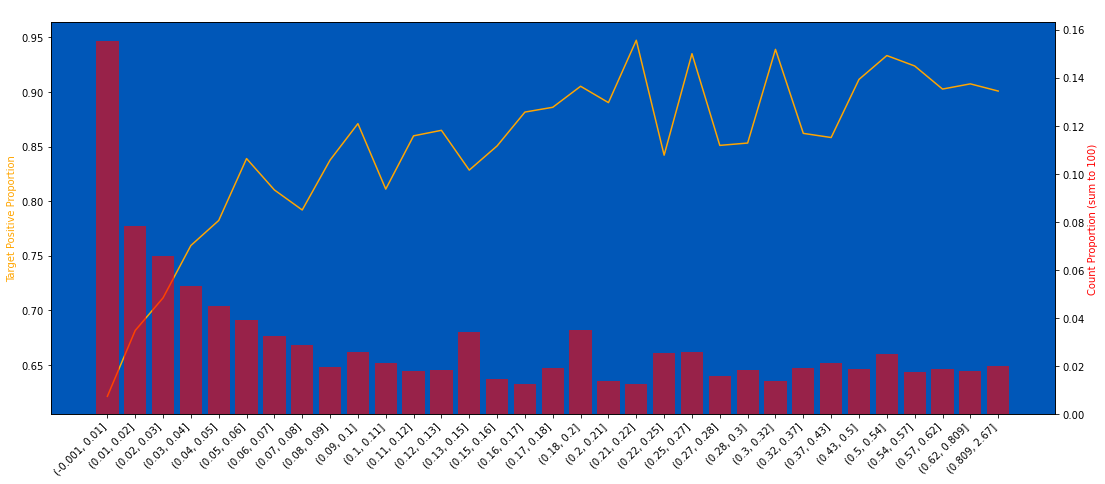

In [103]:
plot_target_check(train, "D_88", q=50, use_raw_bin=True)

### D_89

29563 null count, 0.005 null proportion
0.3523 of the targets have label = 1


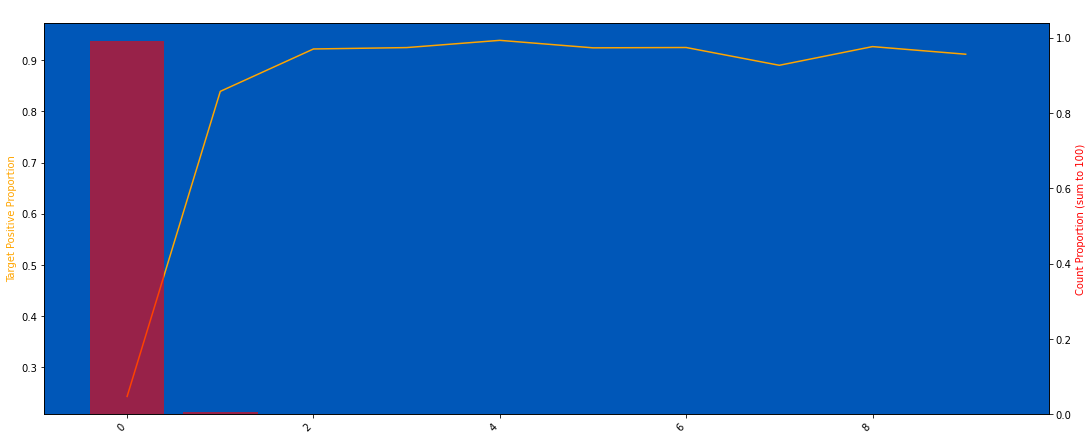

In [104]:
plot_target_check(train, "D_89", q=50, use_raw_bin=True)

### D_91

157216 null count, 0.028 null proportion
0.4663 of the targets have label = 1


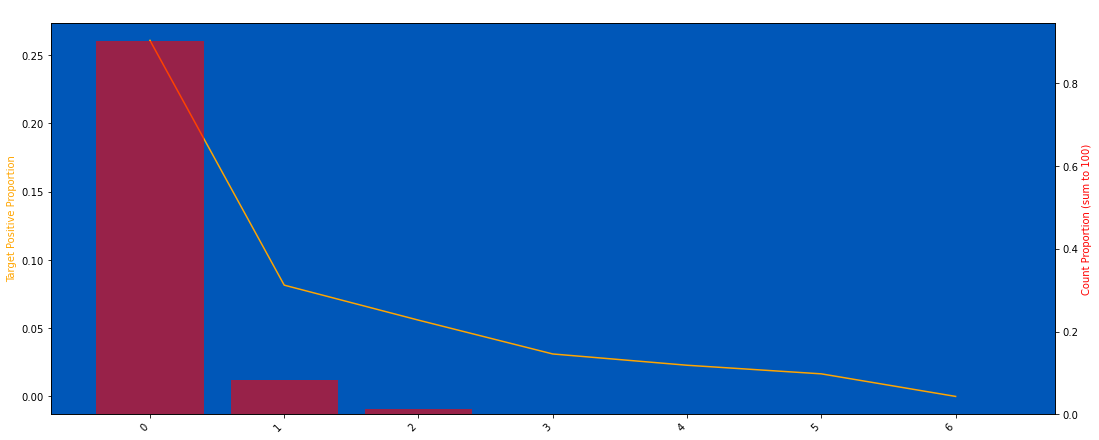

In [105]:
plot_target_check(train, "D_91", q=50, use_raw_bin=True)

### D_92

0 null count, 0.000 null proportion
nan of the targets have label = 1


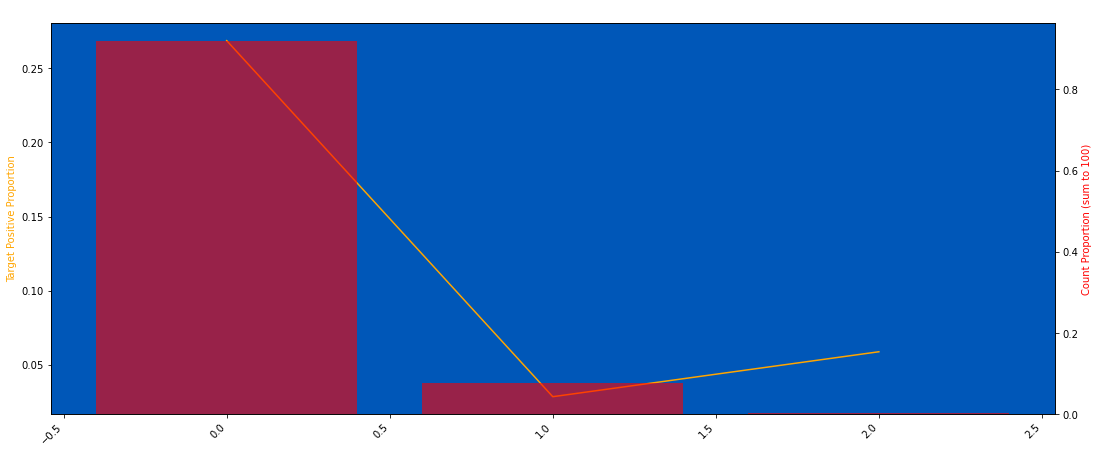

In [106]:
plot_target_check(train, "D_92", q=50, use_raw_bin=True)

### D_93

0 null count, 0.000 null proportion
nan of the targets have label = 1


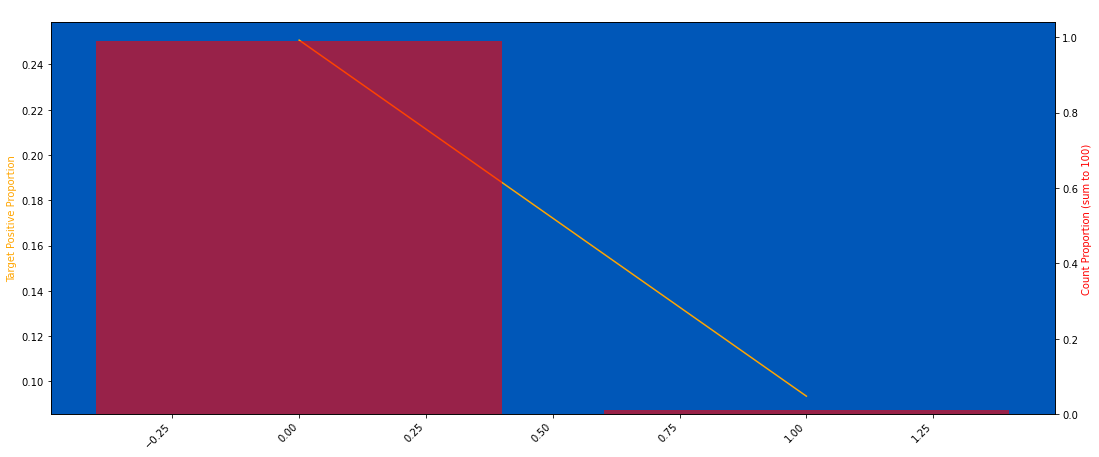

In [107]:
plot_target_check(train, "D_93", q=50, use_raw_bin=True)

### D_94

0 null count, 0.000 null proportion
nan of the targets have label = 1


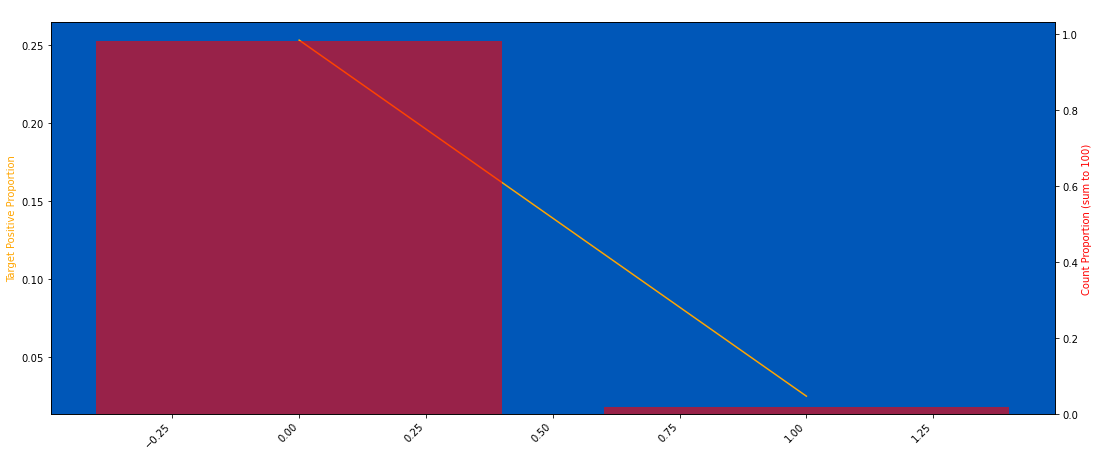

In [108]:
plot_target_check(train, "D_94", q=50, use_raw_bin=True)

### D_96

0 null count, 0.000 null proportion
nan of the targets have label = 1


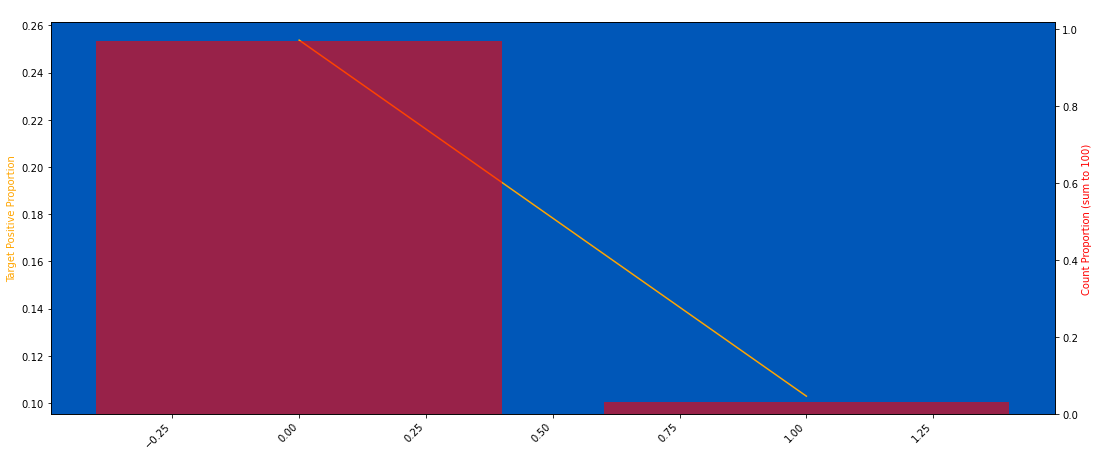

In [109]:
plot_target_check(train, "D_96", q=50, use_raw_bin=True)

### D_102

40655 null count, 0.007 null proportion
0.4091 of the targets have label = 1


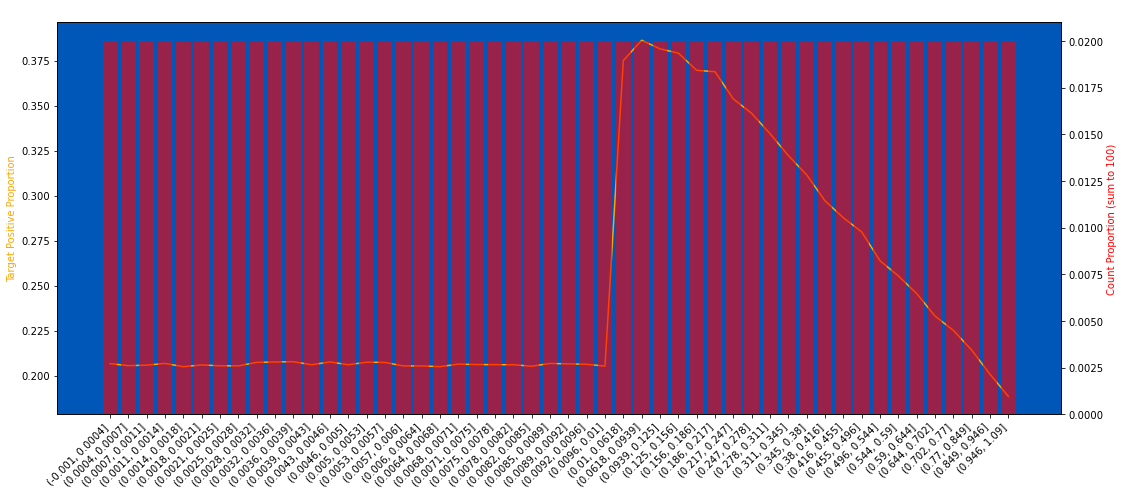

In [110]:
plot_target_check(train, "D_102", q=50, use_raw_bin=True)

In [111]:
train.loc[train["D_102"].between(-0.01, 0.01), "D_102"] = 0
test.loc[test["D_102"].between(-0.01, 0.01), "D_102"] = 0

In [112]:
train["D_102"] = train["D_102"].round(3)
test["D_102"] = test["D_102"].round(3)

40655 null count, 0.007 null proportion
0.4091 of the targets have label = 1


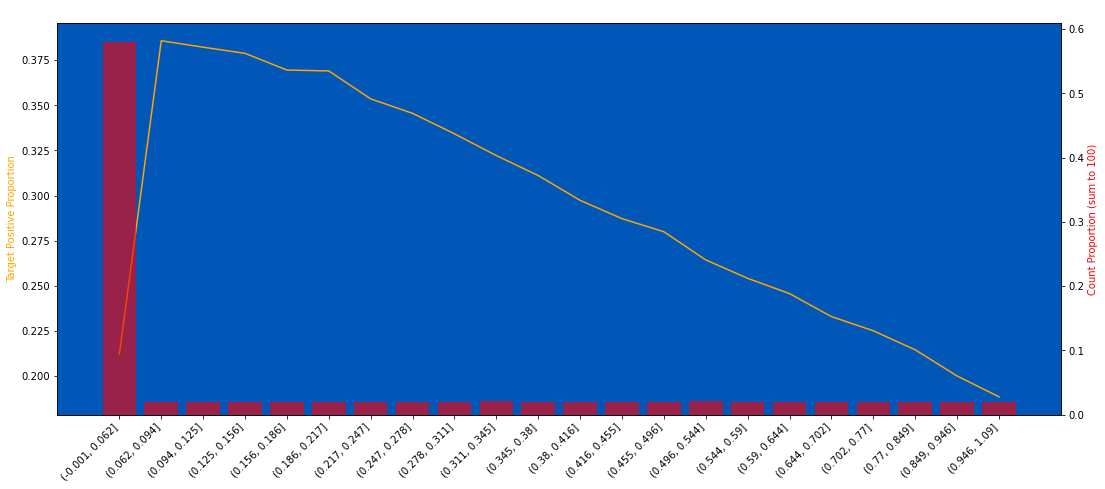

In [113]:
plot_target_check(train, "D_102", q=50, use_raw_bin=True)

### D_103

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


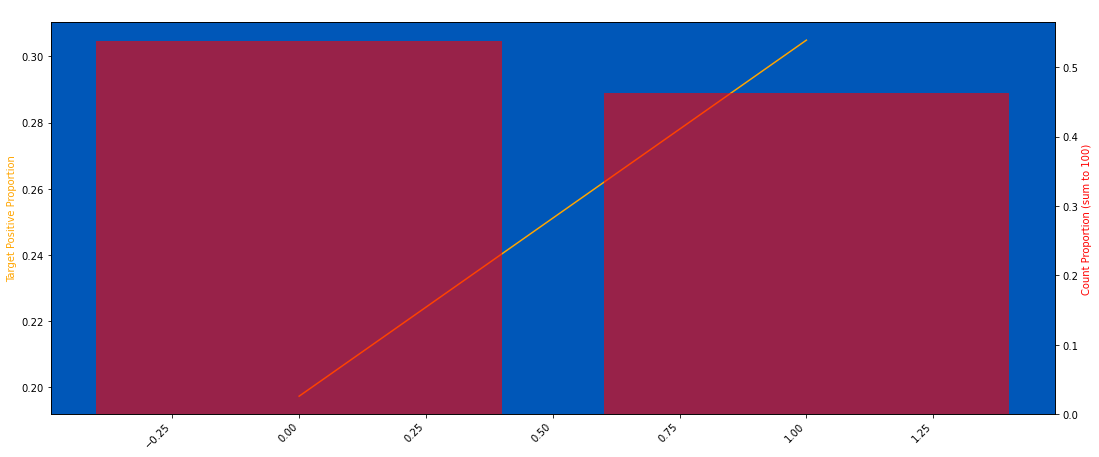

In [114]:
plot_target_check(train, "D_103", q=50, use_raw_bin=True)

### D_104

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


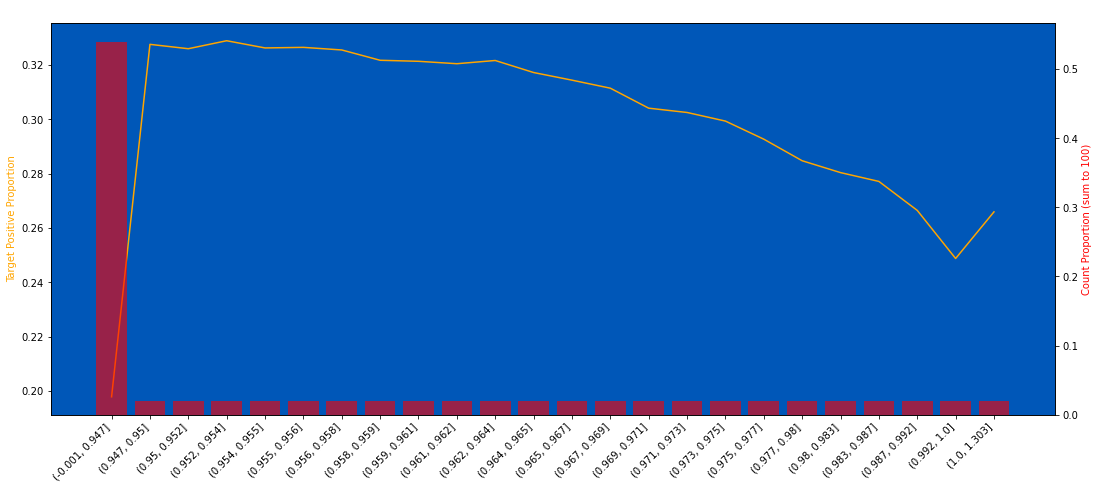

In [115]:
plot_target_check(train, "D_104", q=50, use_raw_bin=True)

In [116]:
train.loc[train["D_104"].between(0.99, 1.01), "D_104"] = 1
test.loc[test["D_104"].between(0.99, 1.01), "D_104"] = 1

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


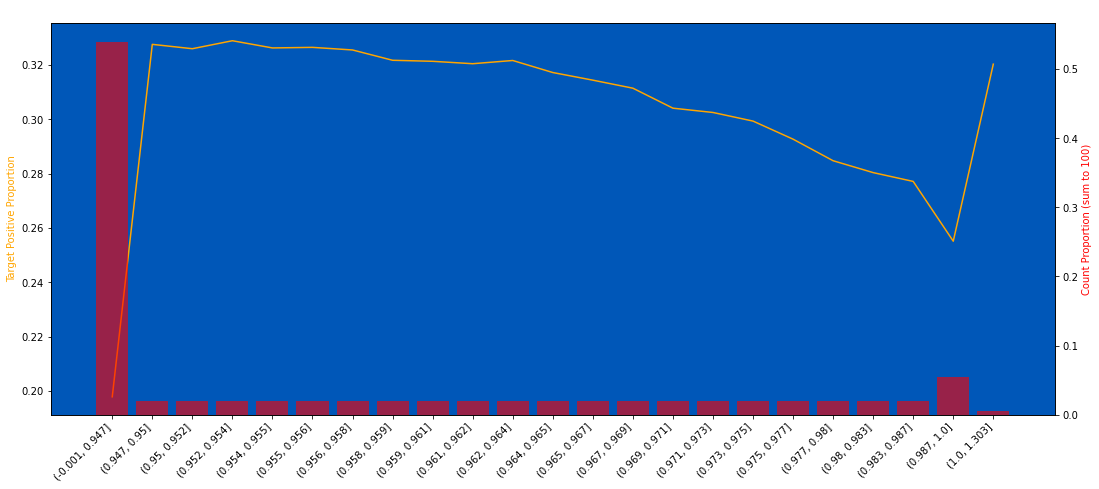

In [117]:
plot_target_check(train, "D_104", q=50, use_raw_bin=True)

### D_105

3021431 null count, 0.546 null proportion
0.2027 of the targets have label = 1


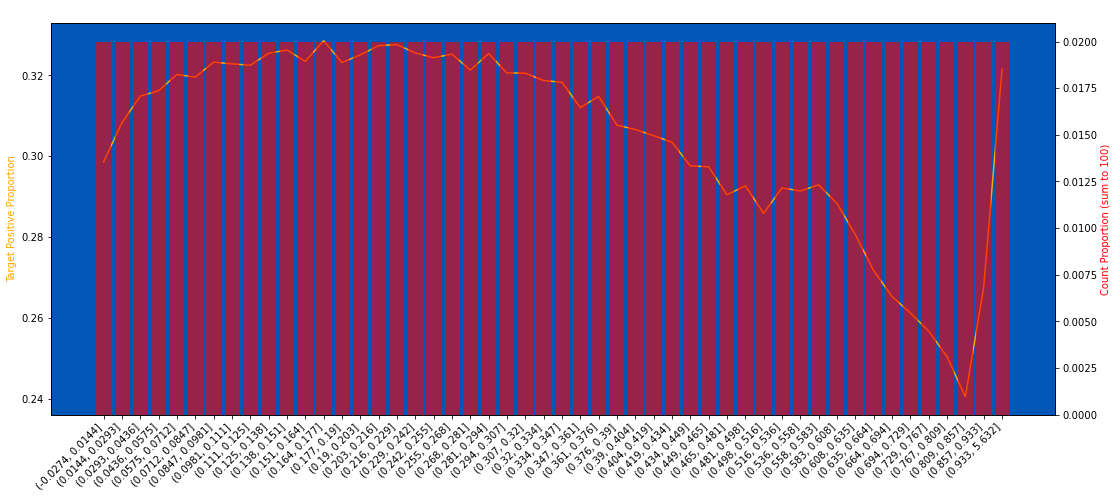

In [118]:
plot_target_check(train, "D_105", q=50, use_raw_bin=True)

In [119]:
train["D_105"] = train["D_105"].round(3)
test["D_105"] = test["D_105"].round(3)

3021431 null count, 0.546 null proportion
0.2027 of the targets have label = 1


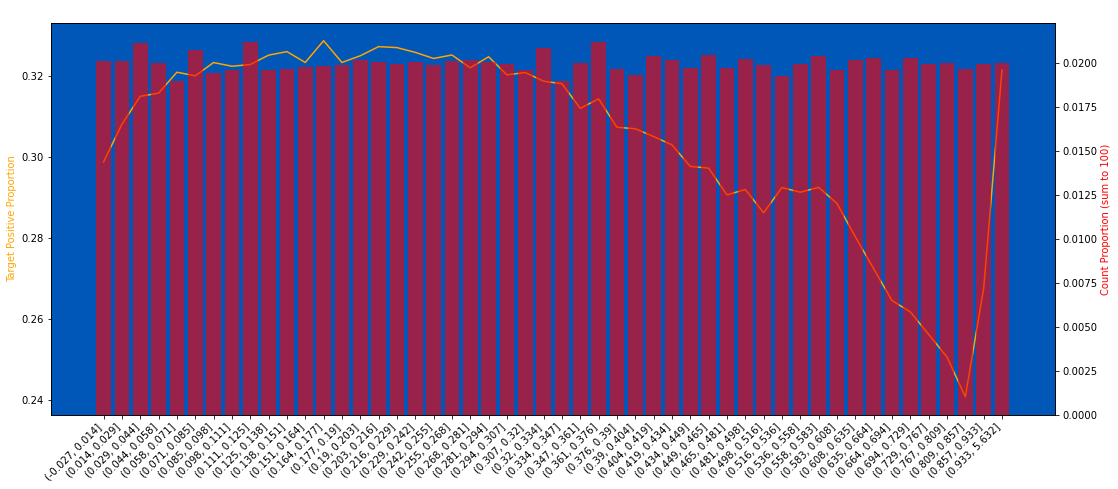

In [120]:
plot_target_check(train, "D_105", q=50, use_raw_bin=True)

### D_106

4990102 null count, 0.902 null proportion
0.2164 of the targets have label = 1


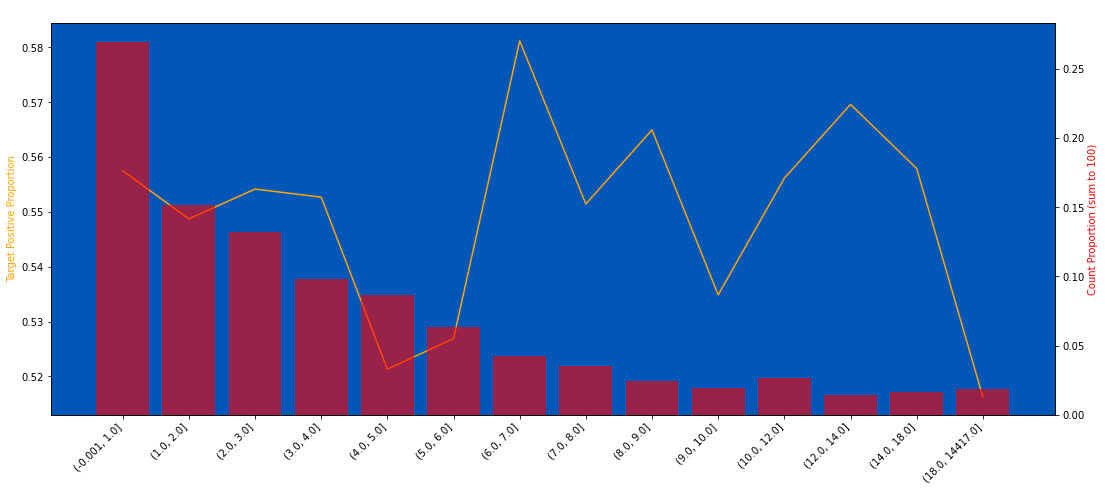

In [121]:
plot_target_check(train, "D_106", q=50, use_raw_bin=True)

### D_107

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


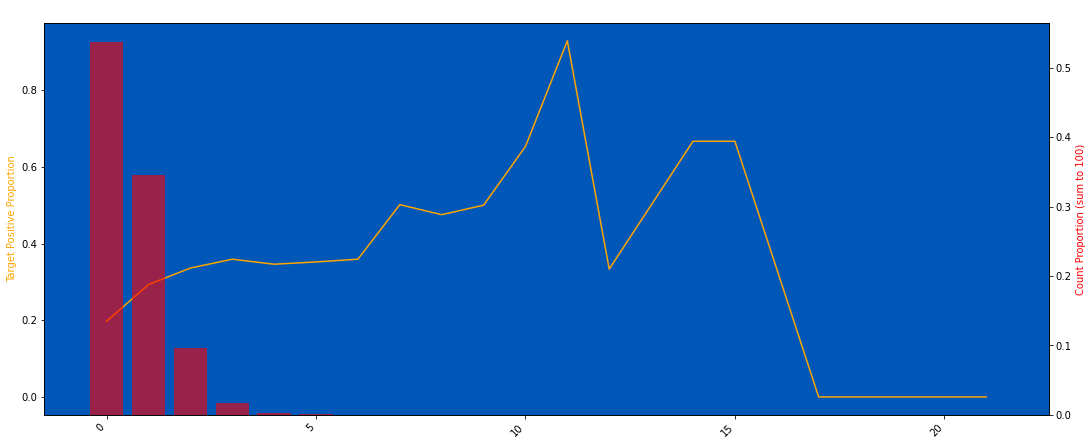

In [122]:
plot_target_check(train, "D_107", q=50, use_raw_bin=True)

### D_108

5502513 null count, 0.995 null proportion
0.2482 of the targets have label = 1


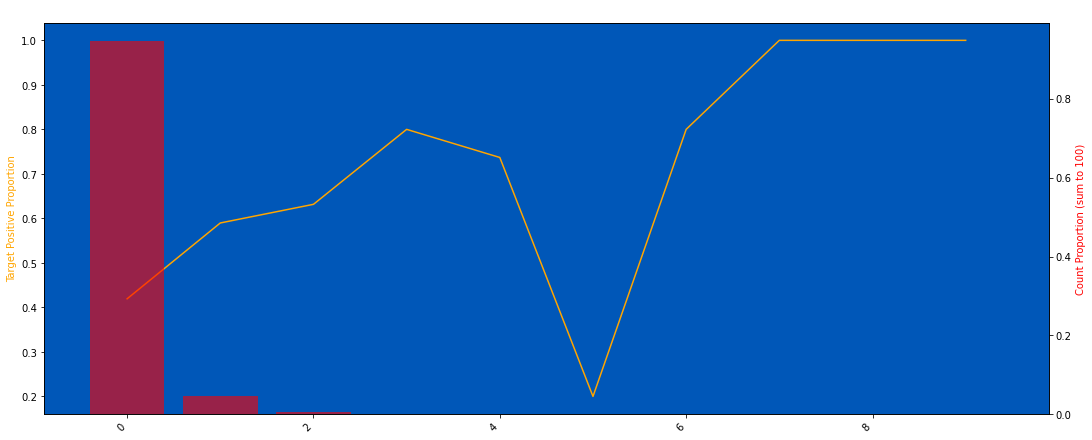

In [123]:
plot_target_check(train, "D_108", q=50, use_raw_bin=True)

### D_109

1597 null count, 0.000 null proportion
0.2298 of the targets have label = 1


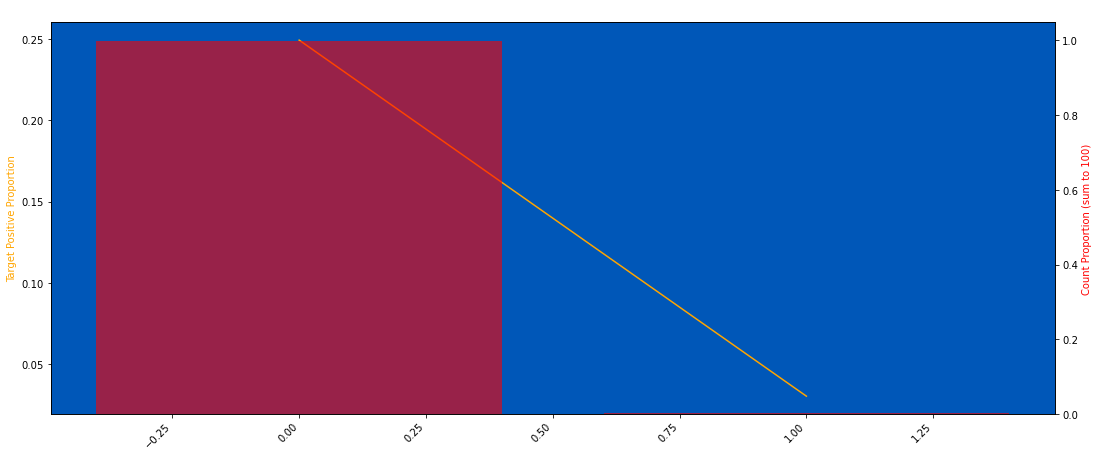

In [124]:
plot_target_check(train, "D_109", q=50, use_raw_bin=True)

### D_110

5500117 null count, 0.994 null proportion
0.2473 of the targets have label = 1


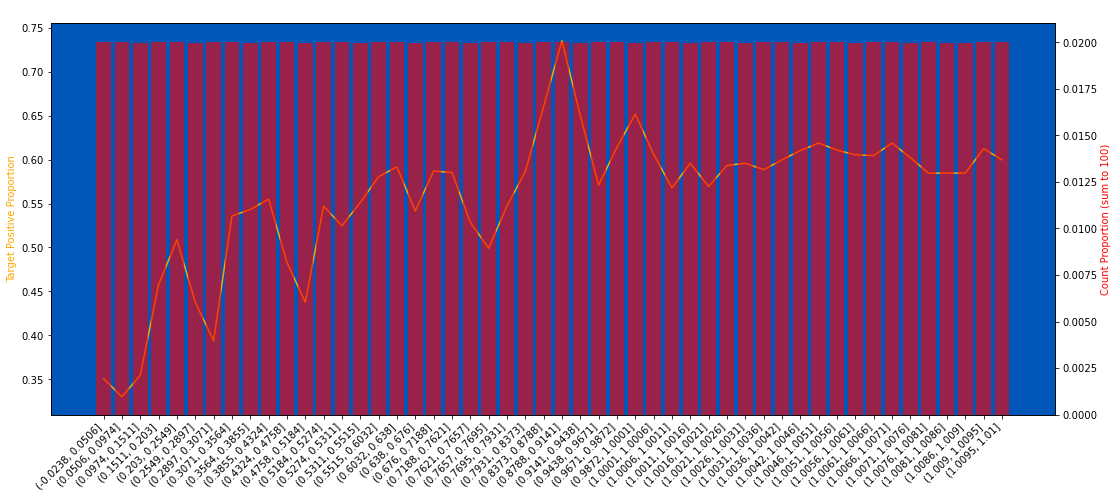

In [125]:
plot_target_check(train, "D_110", q=50, use_raw_bin=True)

In [126]:
train["D_110"] = train["D_110"].round(2)
test["D_110"] = test["D_110"].round(2)

In [127]:
train.loc[train["D_110"].between(1, 1.01), "D_110"] = 1
test.loc[test["D_110"].between(1, 1.01), "D_110"] = 1

5500117 null count, 0.994 null proportion
0.2473 of the targets have label = 1


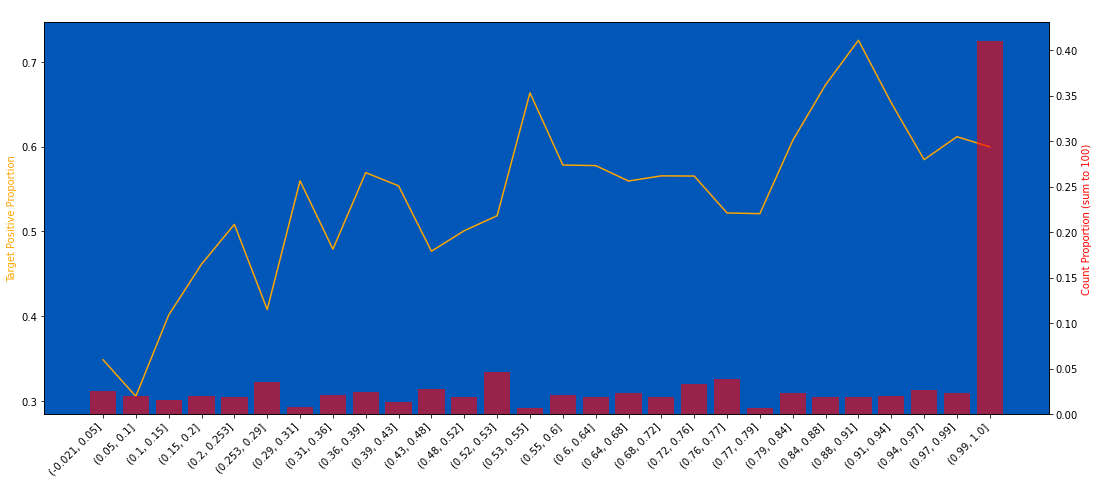

In [128]:
plot_target_check(train, "D_110", q=50, use_raw_bin=True)

### D_111

5500117 null count, 0.994 null proportion
0.2473 of the targets have label = 1


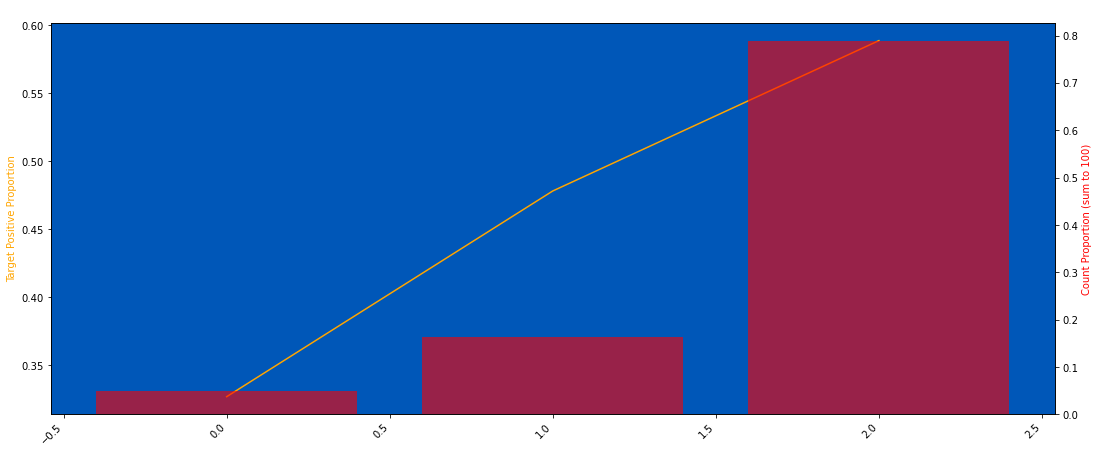

In [129]:
plot_target_check(train, "D_111", q=50, use_raw_bin=True)

### D_112

2650 null count, 0.000 null proportion
0.3026 of the targets have label = 1


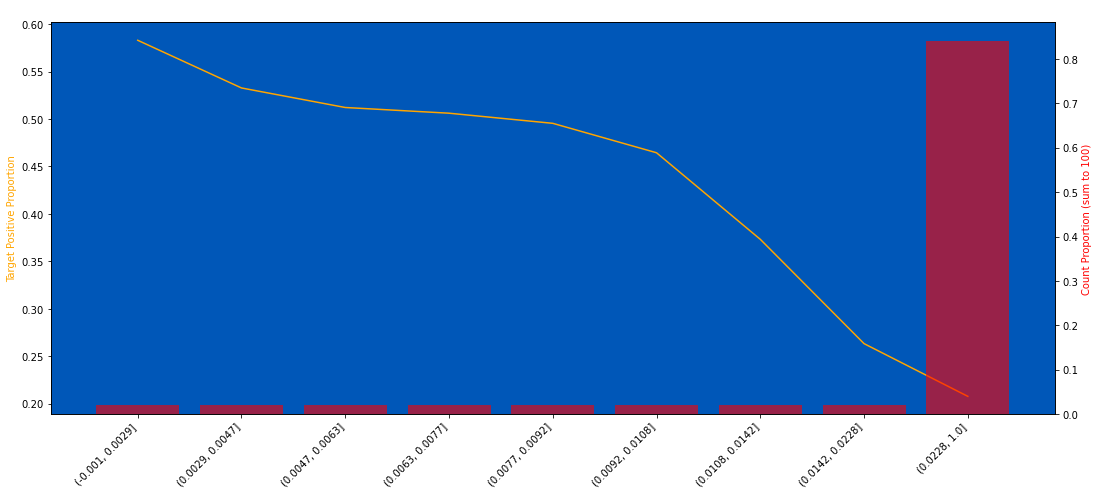

In [130]:
plot_target_check(train, "D_112", q=50, use_raw_bin=True)

### D_113

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


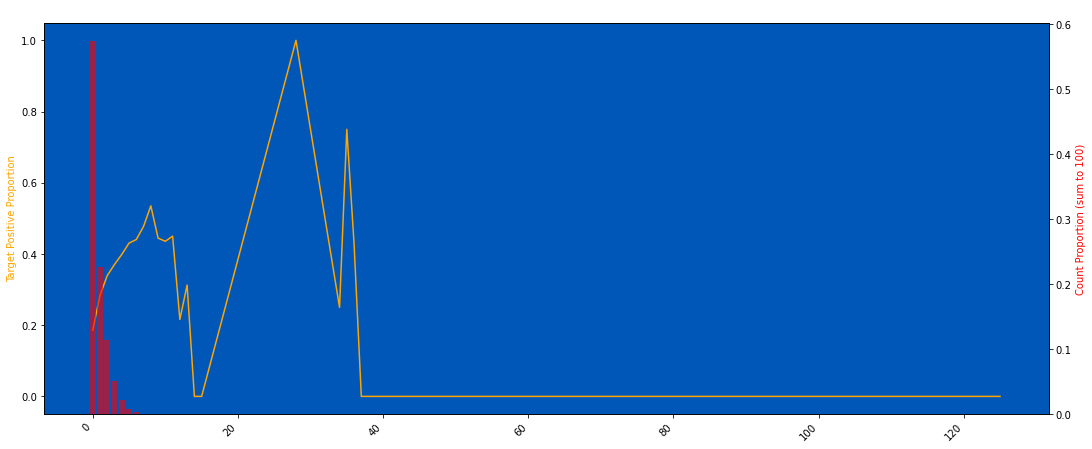

In [131]:
plot_target_check(train, "D_113", q=50, use_raw_bin=True)

In [132]:
train.loc[train["D_113"] >= 8, "D_113"] = 8
test.loc[test["D_113"] >= 8, "D_113"] = 8

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


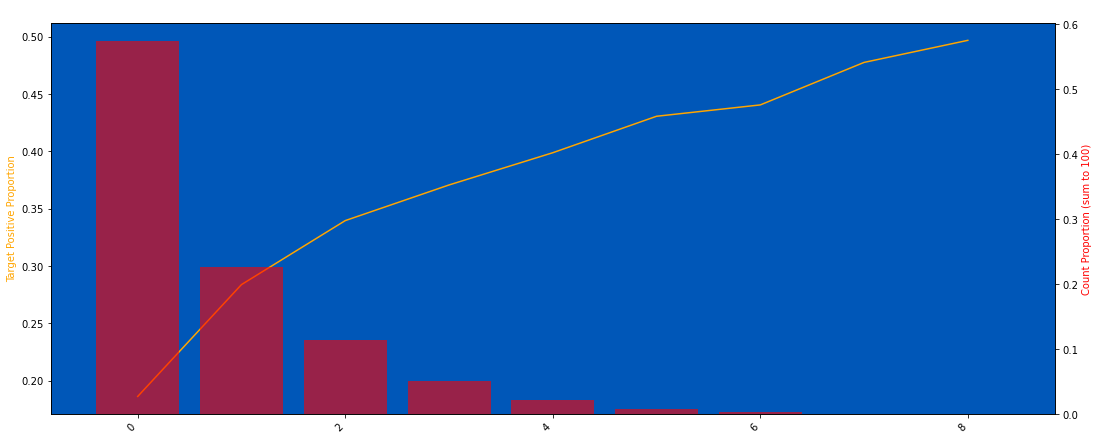

In [133]:
plot_target_check(train, "D_113", q=50, use_raw_bin=True)

### D_114

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


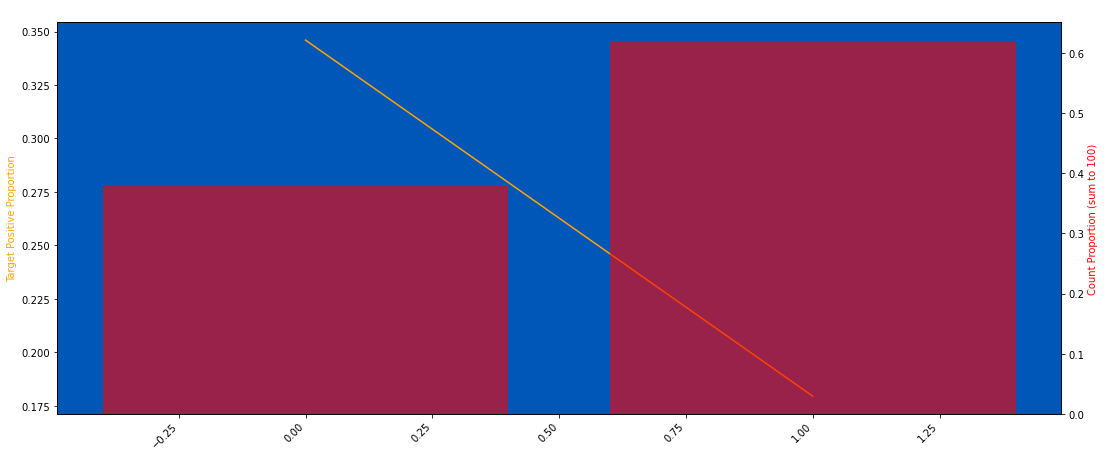

In [134]:
plot_target_check(train, "D_114", q=50, use_raw_bin=True)

### D_115

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


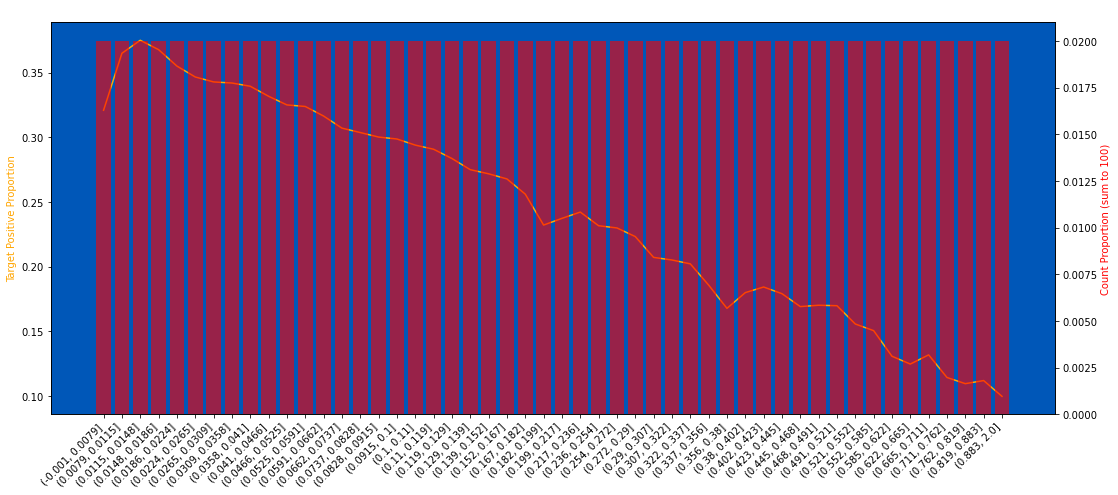

In [135]:
plot_target_check(train, "D_115", q=50, use_raw_bin=True)

In [136]:
train["D_115"] = train["D_115"].round(2)
test["D_115"] = test["D_115"].round(2)

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


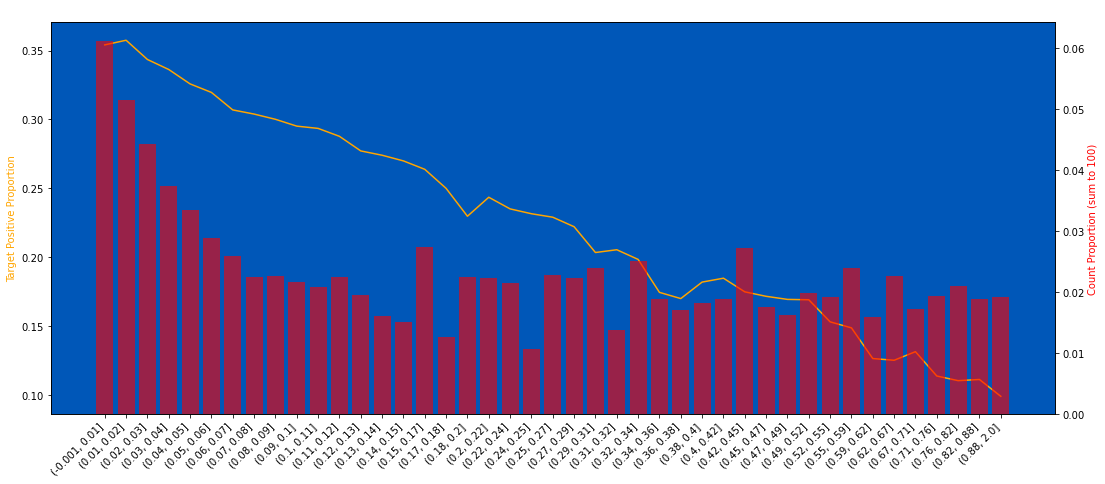

In [137]:
plot_target_check(train, "D_115", q=50, use_raw_bin=True)

### D_116

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


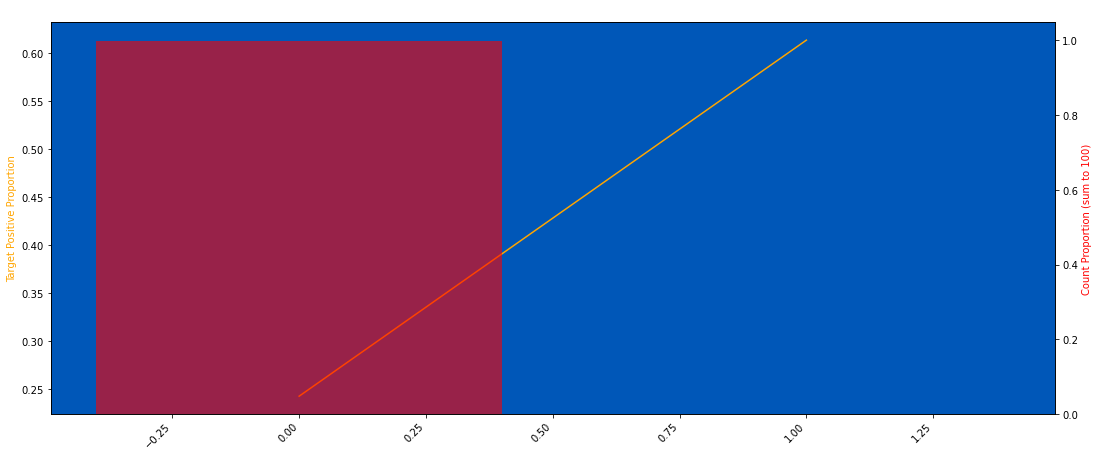

In [138]:
plot_target_check(train, "D_116", q=50, use_raw_bin=True)

### D_117

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


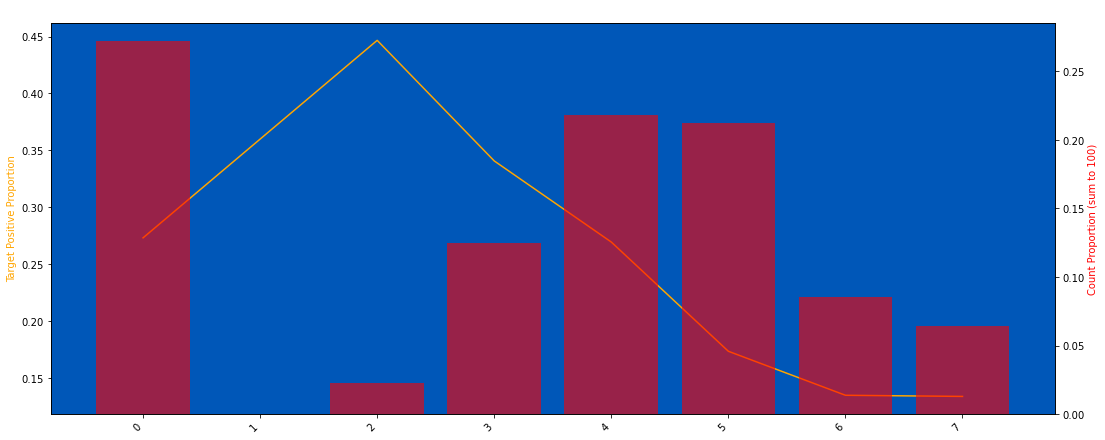

In [139]:
plot_target_check(train, "D_117", q=50, use_raw_bin=True)

### D_118

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


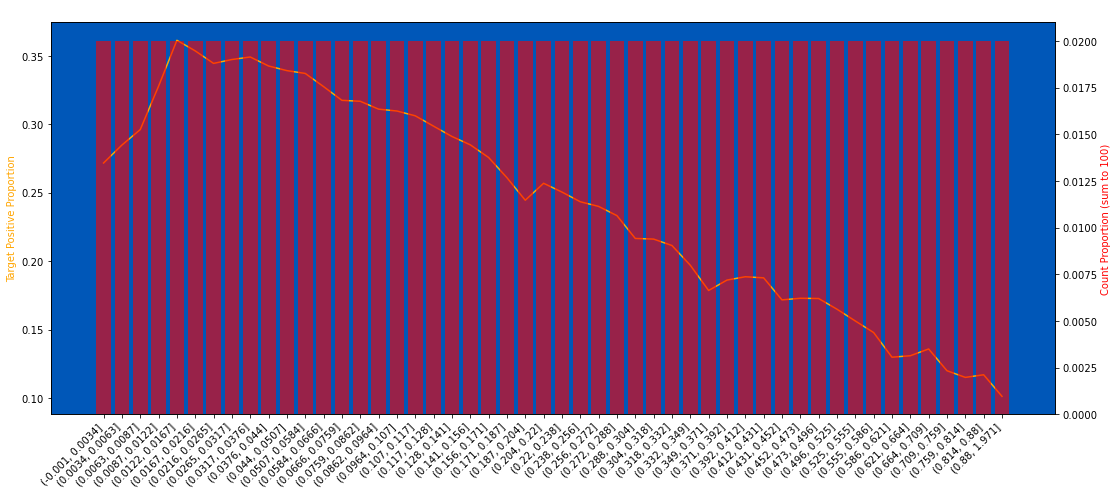

In [140]:
plot_target_check(train, "D_118", q=50, use_raw_bin=True)

In [141]:
train["D_118"] = train["D_118"].round(2)
test["D_118"] = test["D_118"].round(2)

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


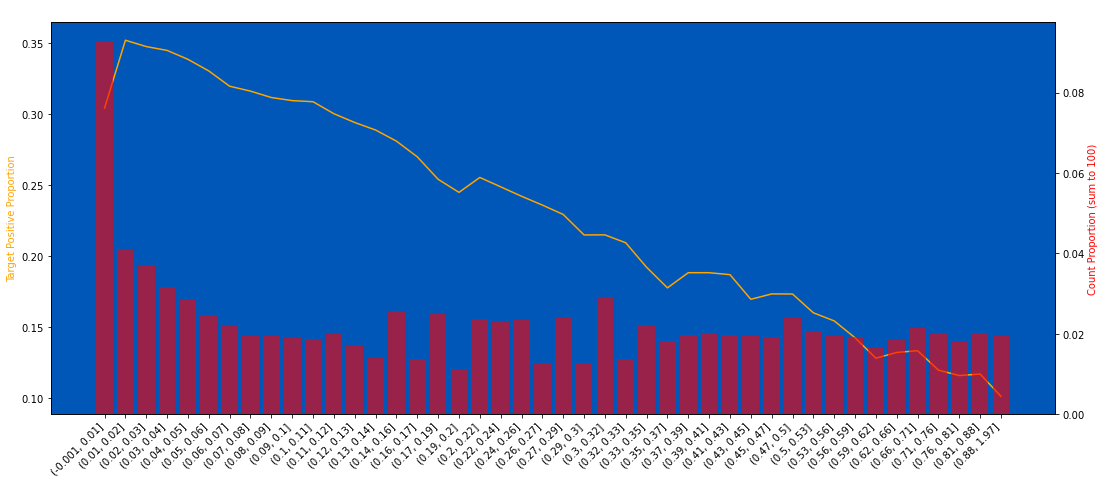

In [142]:
plot_target_check(train, "D_118", q=50, use_raw_bin=True)

### D_119

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


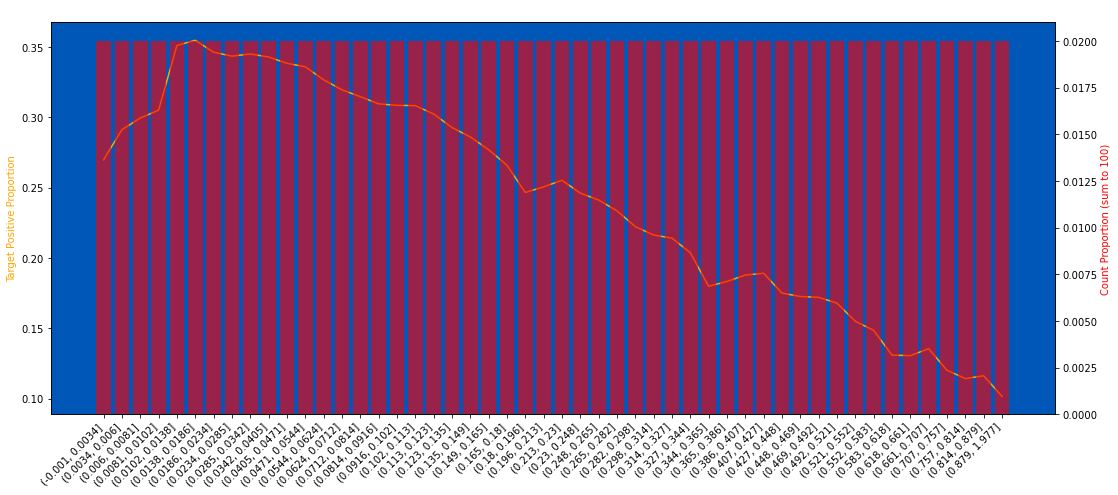

In [143]:
plot_target_check(train, "D_119", q=50, use_raw_bin=True)

In [144]:
train["D_119"] = train["D_119"].round(2)
test["D_119"] = test["D_119"].round(2)

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


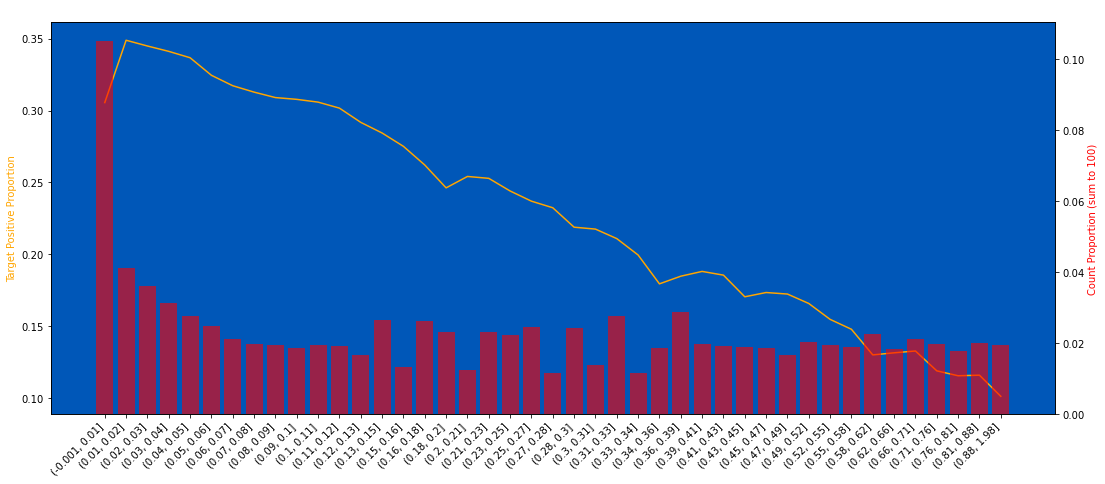

In [145]:
plot_target_check(train, "D_119", q=50, use_raw_bin=True)

### D_120

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


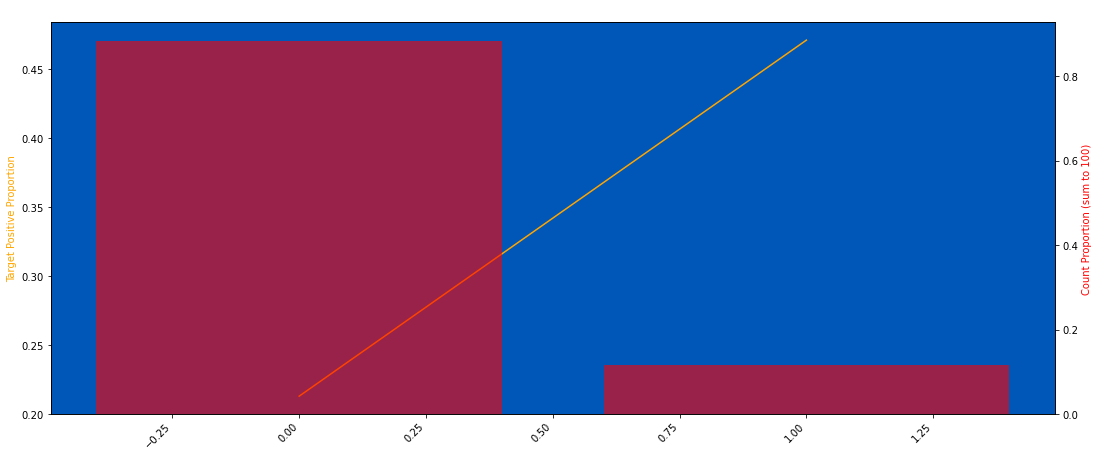

In [146]:
plot_target_check(train, "D_120", q=50, use_raw_bin=True)

### D_121

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


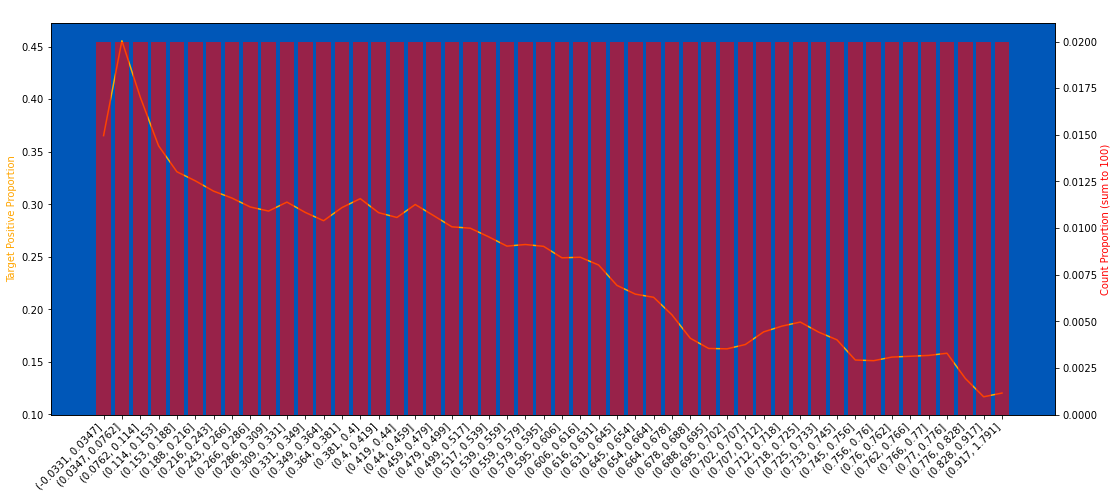

In [147]:
plot_target_check(train, "D_121", q=50, use_raw_bin=True)

In [148]:
train["D_121"] = train["D_121"].round(2)
test["D_121"] = test["D_121"].round(2)

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


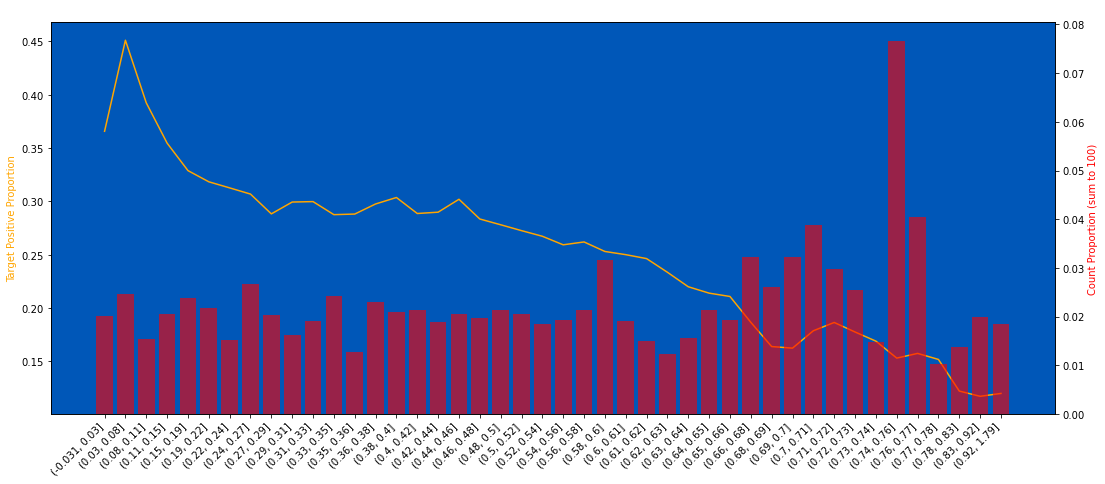

In [149]:
plot_target_check(train, "D_121", q=50, use_raw_bin=True)

### D_122

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


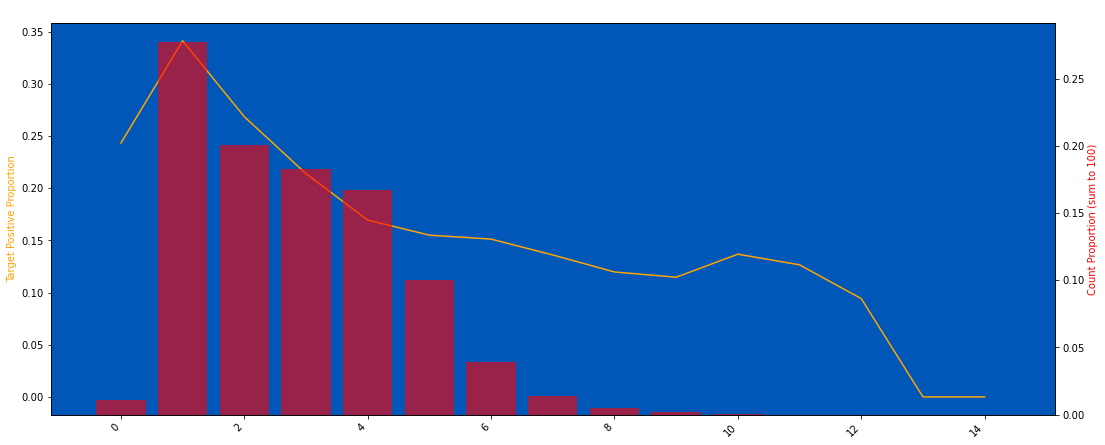

In [150]:
plot_target_check(train, "D_122", q=50, use_raw_bin=True)

In [151]:
train.loc[train["D_122"] >= 9, "D_122"] = 9
test.loc[test["D_122"] >= 9, "D_122"] = 9

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


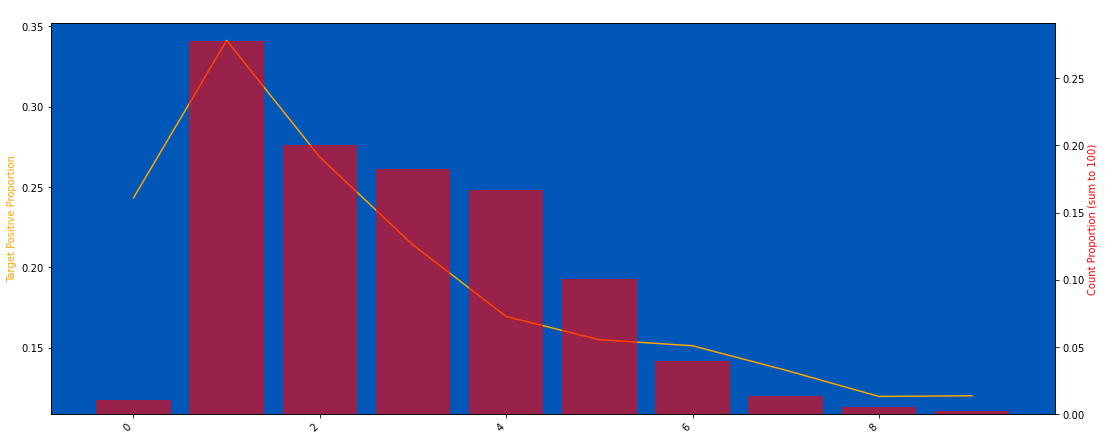

In [152]:
plot_target_check(train, "D_122", q=50, use_raw_bin=True)

### D_123

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


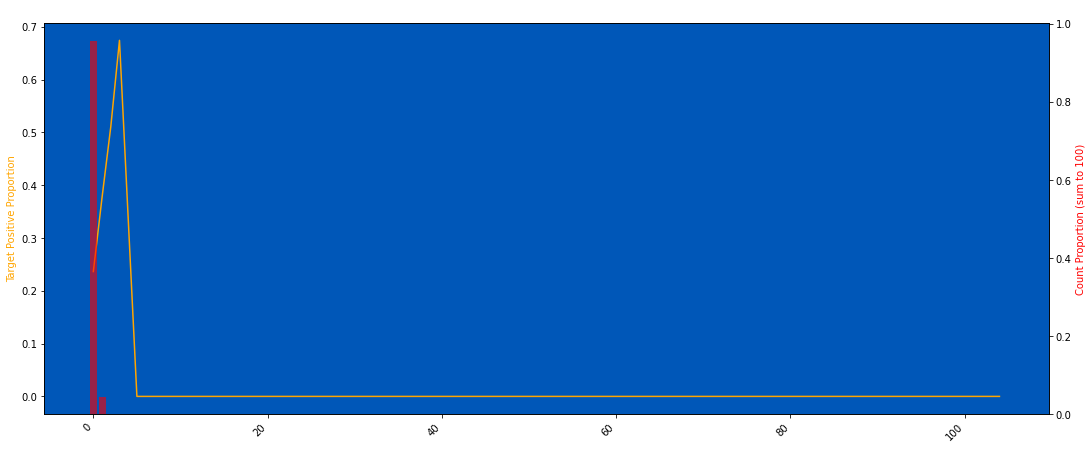

In [153]:
plot_target_check(train, "D_123", q=50, use_raw_bin=True)

In [154]:
train.loc[train["D_123"] >= 3, "D_123"] = 3
test.loc[test["D_123"] >= 3, "D_123"] = 3

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


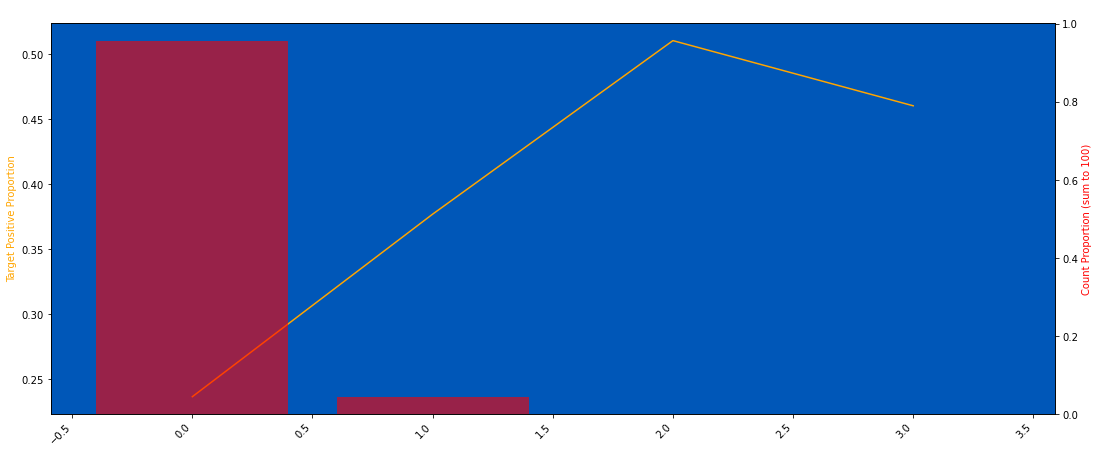

In [155]:
plot_target_check(train, "D_123", q=50, use_raw_bin=True)

### D_124

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


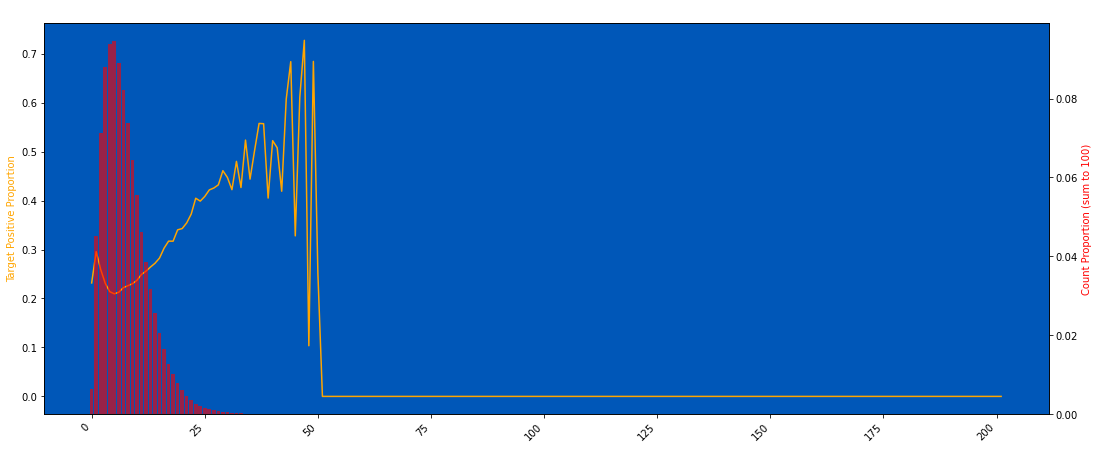

In [156]:
plot_target_check(train, "D_124", q=50, use_raw_bin=True)

In [157]:
train.loc[train["D_124"] >= 36, "D_124"] = 36
test.loc[test["D_124"] >= 36, "D_124"] = 36

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


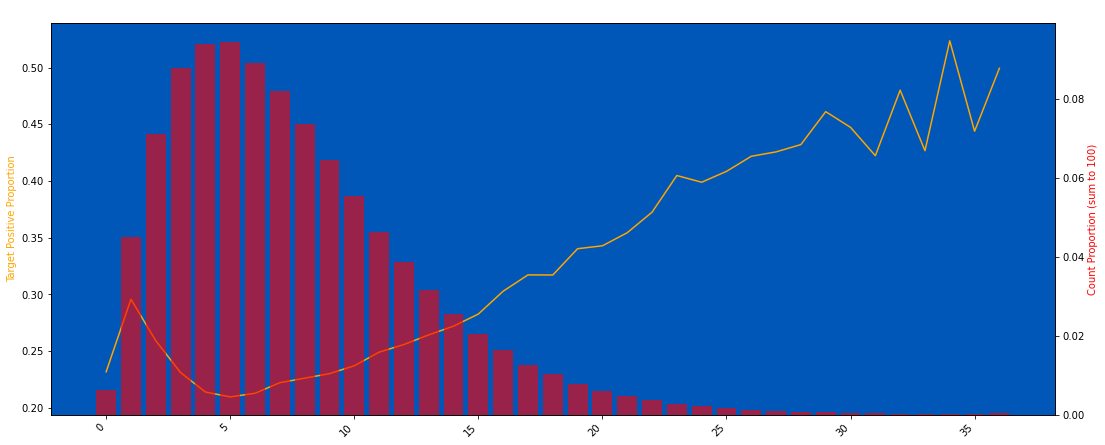

In [158]:
plot_target_check(train, "D_124", q=50, use_raw_bin=True)

### D_125

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


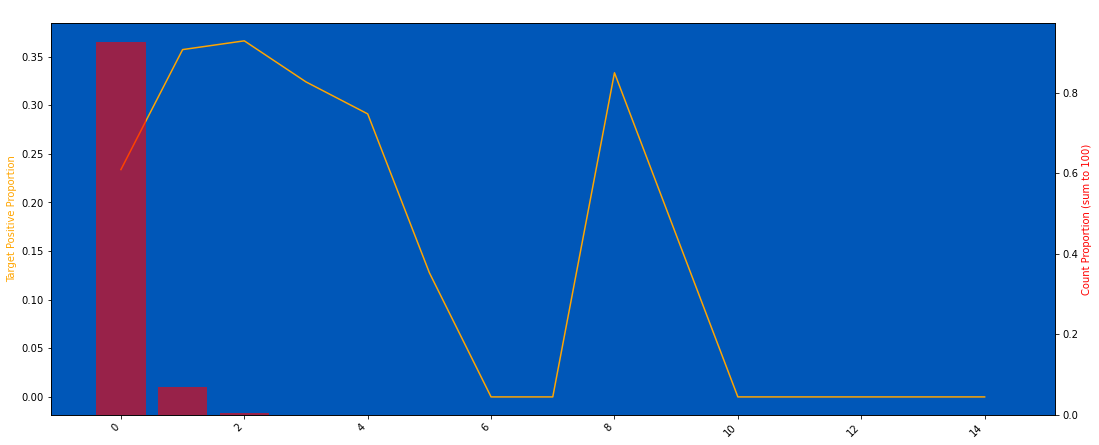

In [159]:
plot_target_check(train, "D_125", q=50, use_raw_bin=True)

In [160]:
train.loc[train["D_125"] >= 3, "D_125"] = 3
test.loc[test["D_125"] >= 3, "D_125"] = 3

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


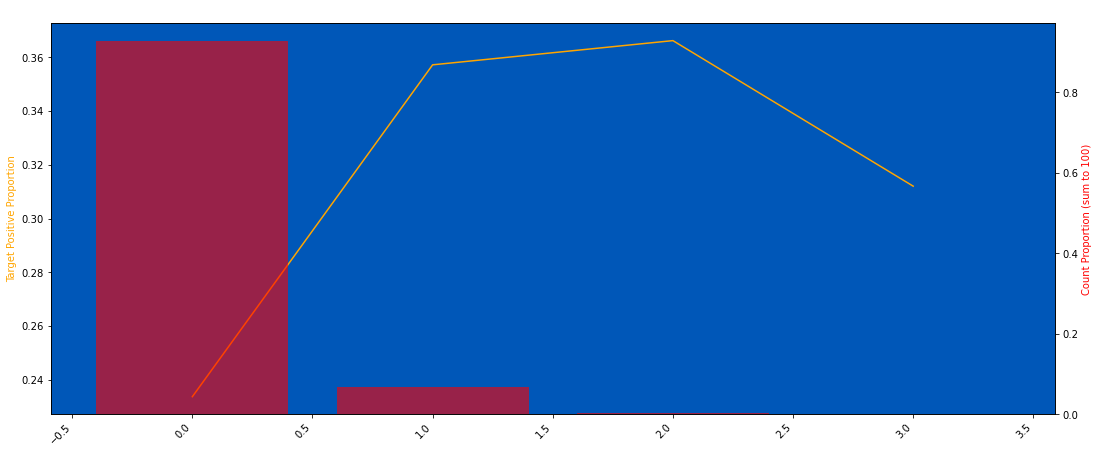

In [161]:
plot_target_check(train, "D_125", q=50, use_raw_bin=True)

### D_126

116816 null count, 0.021 null proportion
0.4680 of the targets have label = 1


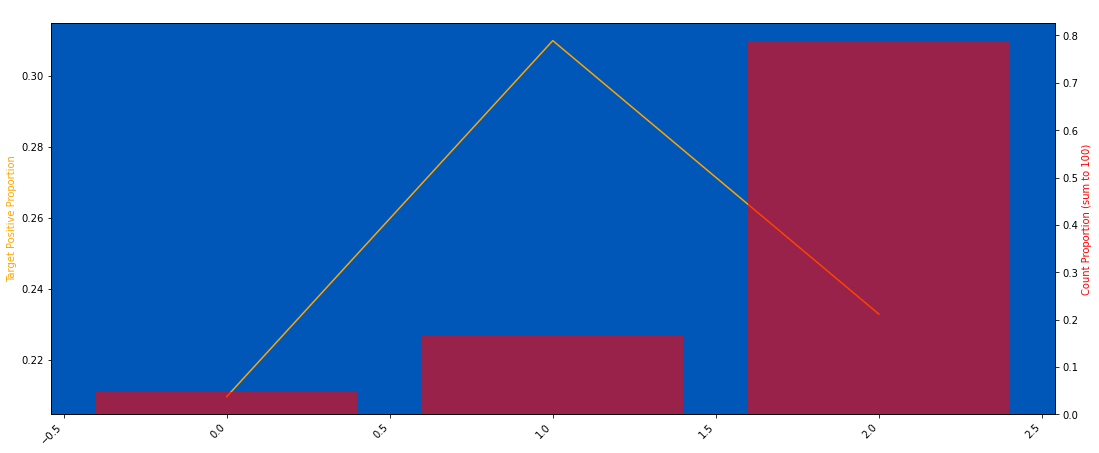

In [162]:
plot_target_check(train, "D_126", q=50, use_raw_bin=True)

### D_127

0 null count, 0.000 null proportion
nan of the targets have label = 1


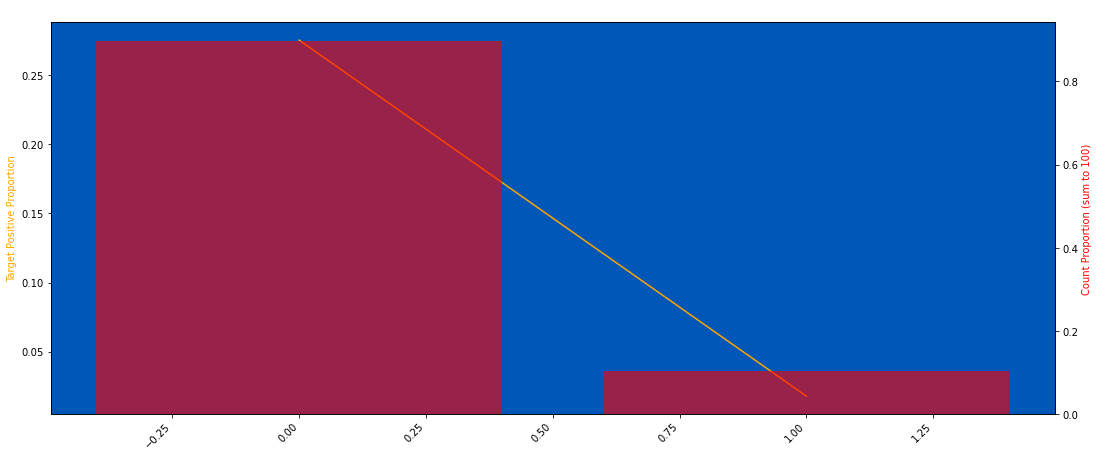

In [163]:
plot_target_check(train, "D_127", q=50, use_raw_bin=True)

### D_128

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


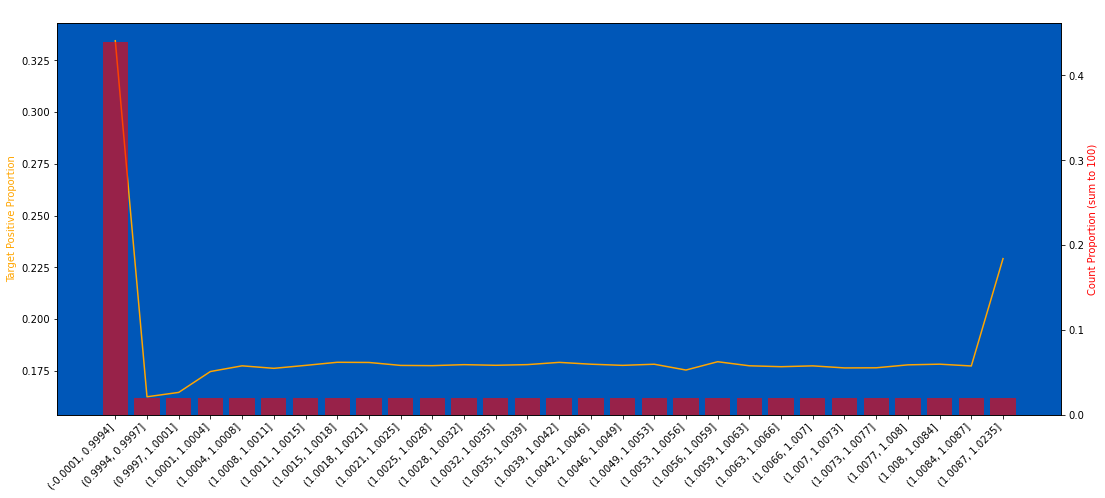

In [164]:
plot_target_check(train, "D_128", q=50, use_raw_bin=True)

In [165]:
train["D_128"] = train["D_128"].round(1)
test["D_128"] = test["D_128"].round(1)

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


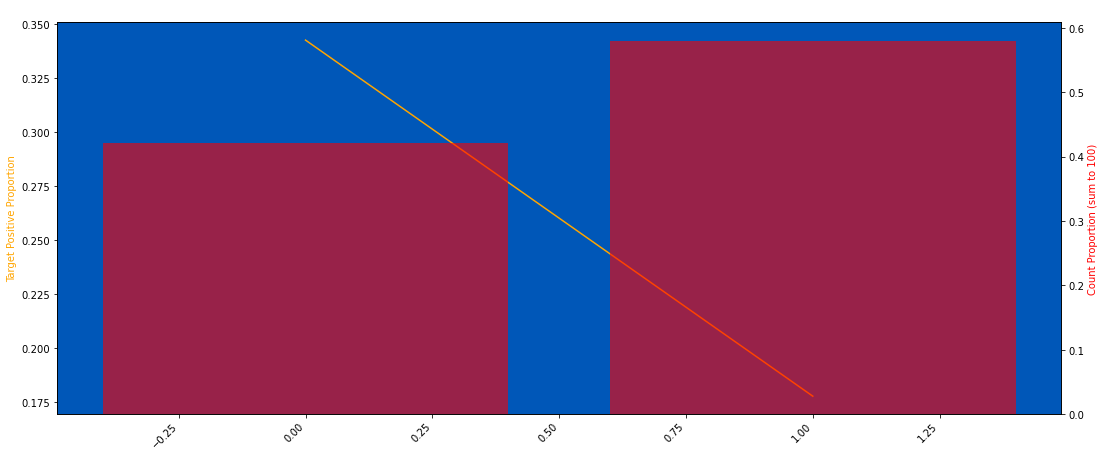

In [166]:
plot_target_check(train, "D_128", q=50, use_raw_bin=True)

### D_129

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


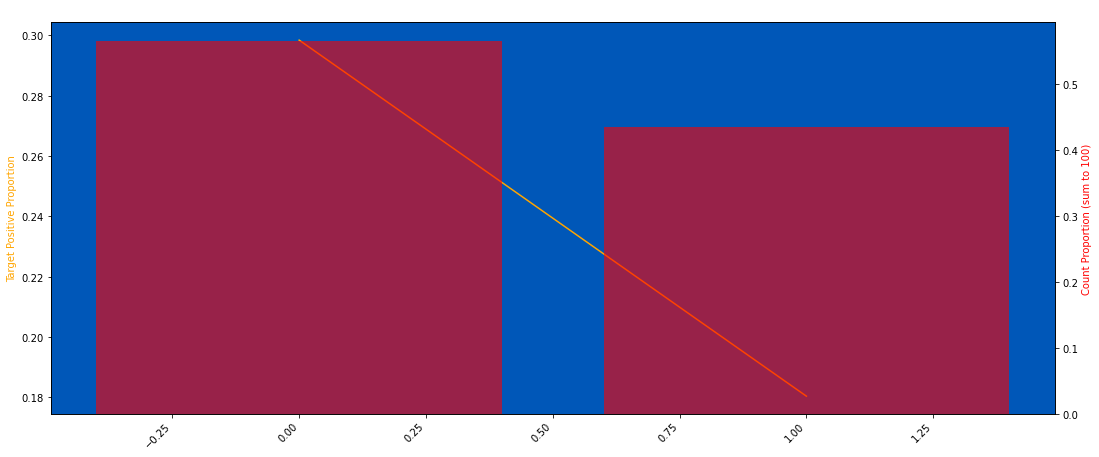

In [167]:
plot_target_check(train, "D_129", q=50, use_raw_bin=True)

### D_130

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


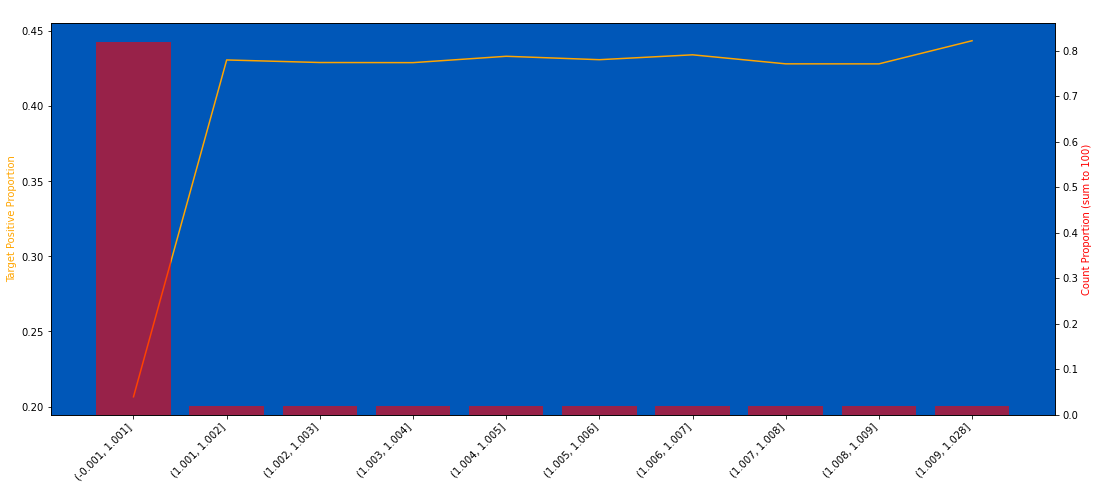

In [168]:
plot_target_check(train, "D_130", q=50, use_raw_bin=True)

In [169]:
train["D_130"] = train["D_130"].round(1)
test["D_130"] = test["D_130"].round(1)

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


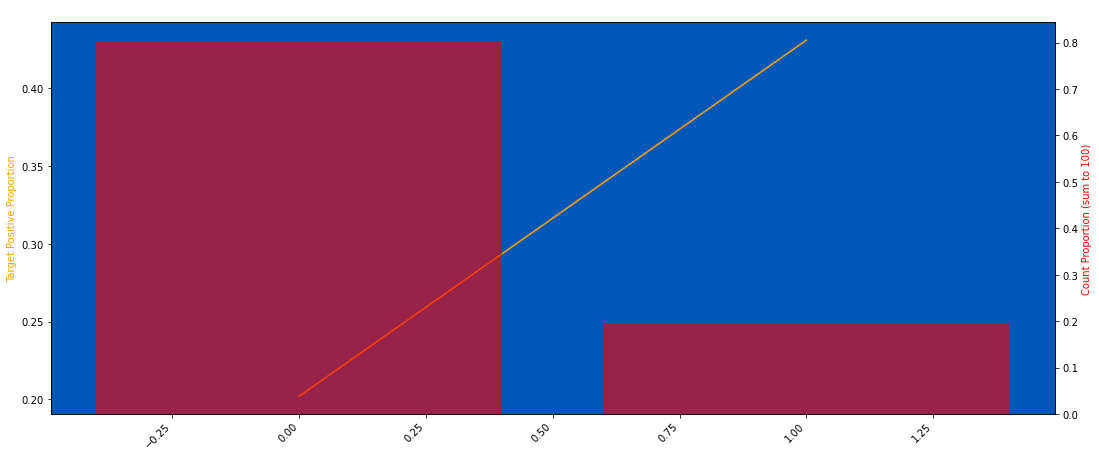

In [170]:
plot_target_check(train, "D_130", q=50, use_raw_bin=True)

### D_131

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


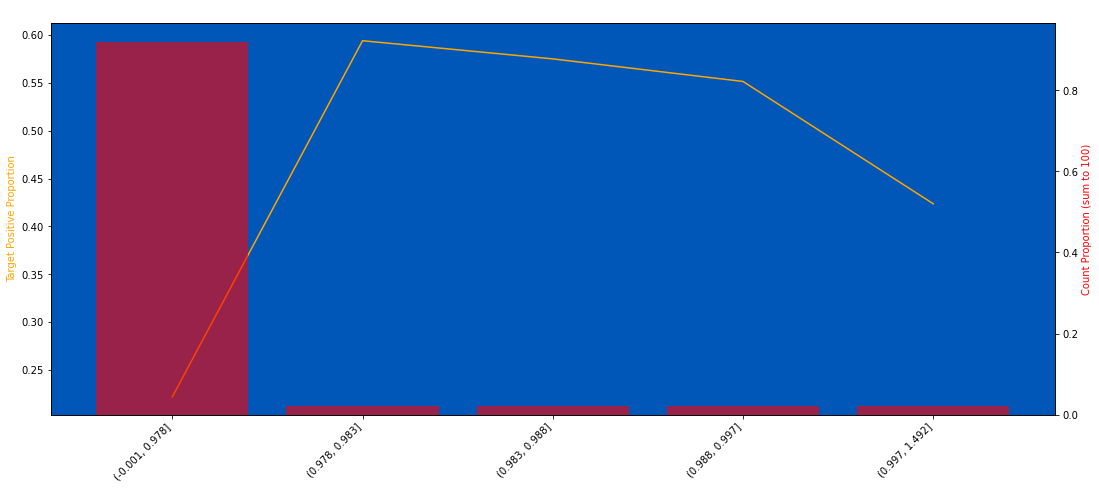

In [171]:
plot_target_check(train, "D_131", q=50, use_raw_bin=True)

In [172]:
train.loc[train["D_131"].between(0.979, 1.01), "D_131"] = 1
test.loc[test["D_131"].between(0.979, 1.01), "D_131"] = 1

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


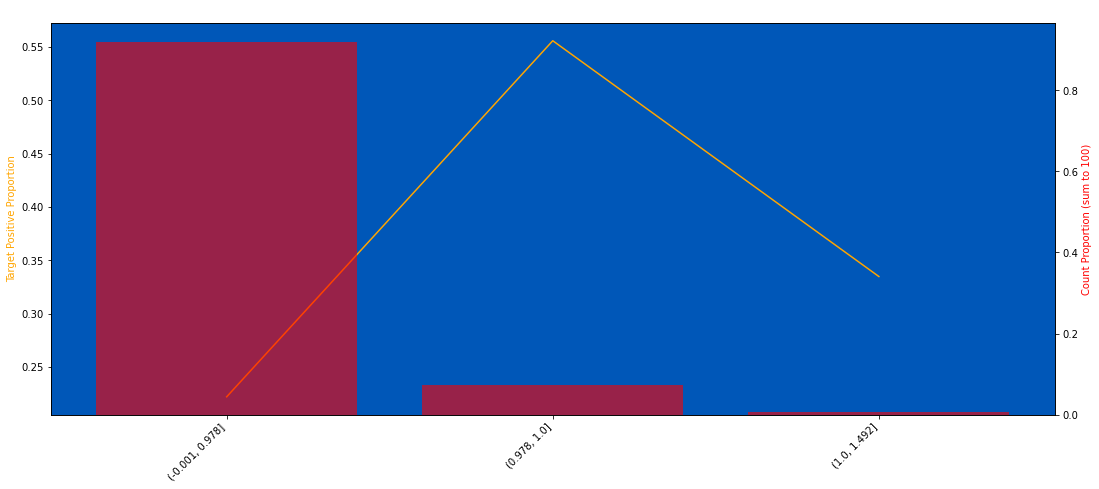

In [173]:
plot_target_check(train, "D_131", q=50, use_raw_bin=True)

### D_132

4988874 null count, 0.902 null proportion
0.2164 of the targets have label = 1


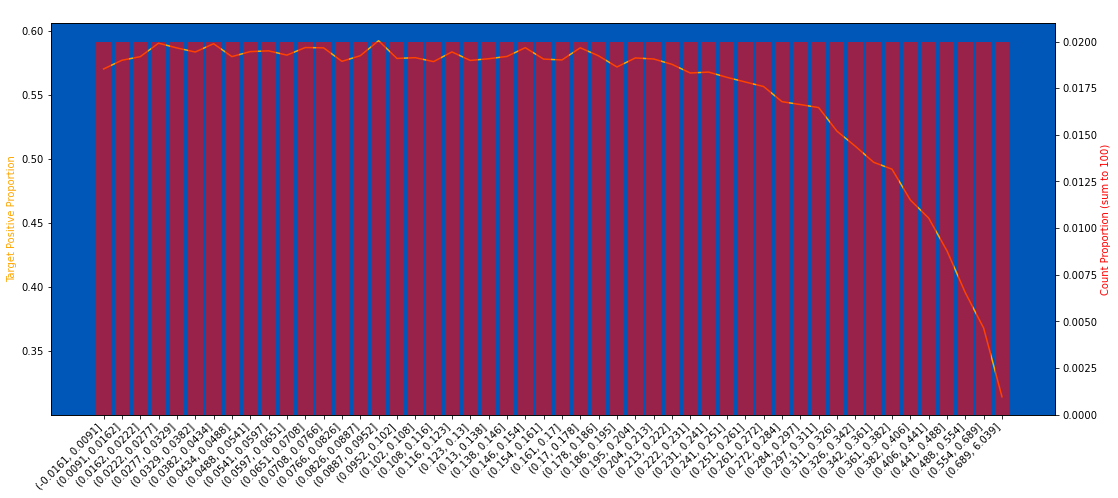

In [174]:
plot_target_check(train, "D_132", q=50, use_raw_bin=True)

In [175]:
train["D_132"] = train["D_132"].round(2)
test["D_132"] = test["D_132"].round(2)

4988874 null count, 0.902 null proportion
0.2164 of the targets have label = 1


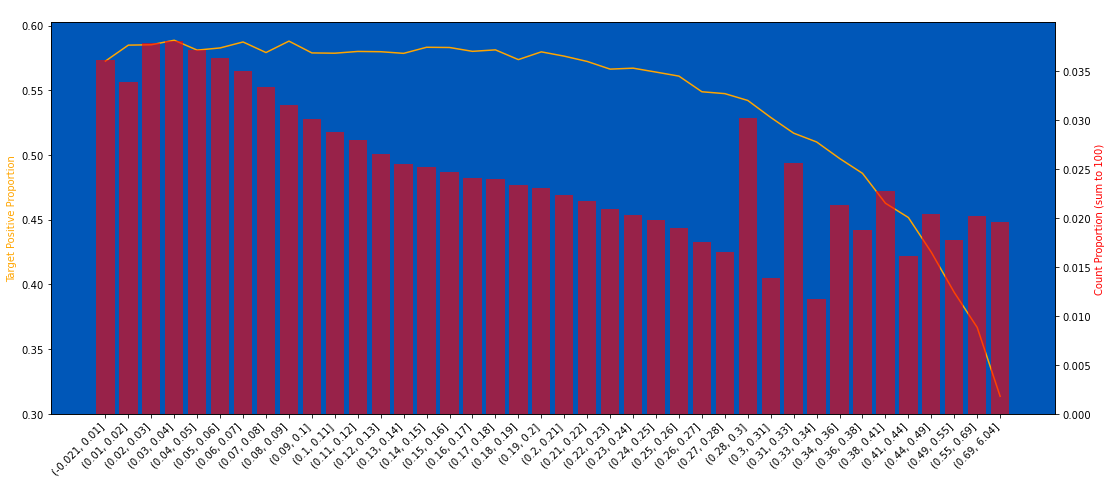

In [176]:
plot_target_check(train, "D_132", q=50, use_raw_bin=True)

### D_133

42716 null count, 0.008 null proportion
0.4210 of the targets have label = 1


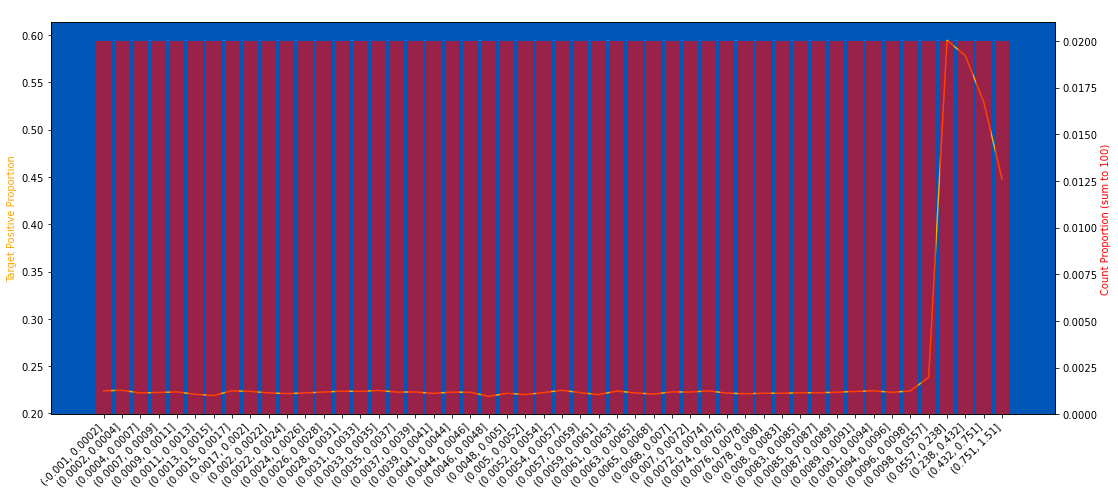

In [177]:
plot_target_check(train, "D_133", q=50, use_raw_bin=True)

In [178]:
train.loc[train["D_133"].between(0, 0.01), "D_133"] = 0.01
test.loc[test["D_133"].between(0, 0.01), "D_133"] = 0.01

42716 null count, 0.008 null proportion
0.4210 of the targets have label = 1


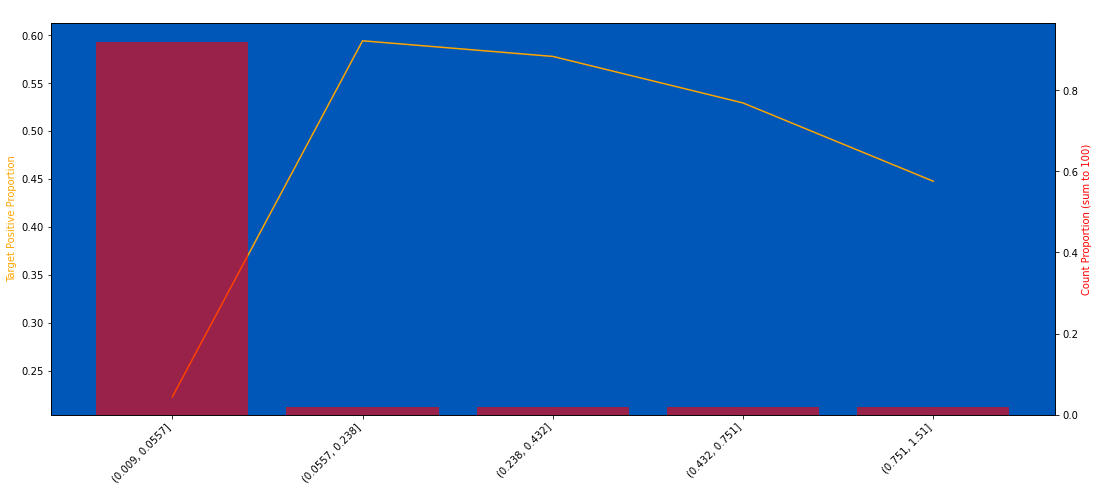

In [179]:
plot_target_check(train, "D_133", q=50, use_raw_bin=True)

### D_134

5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1


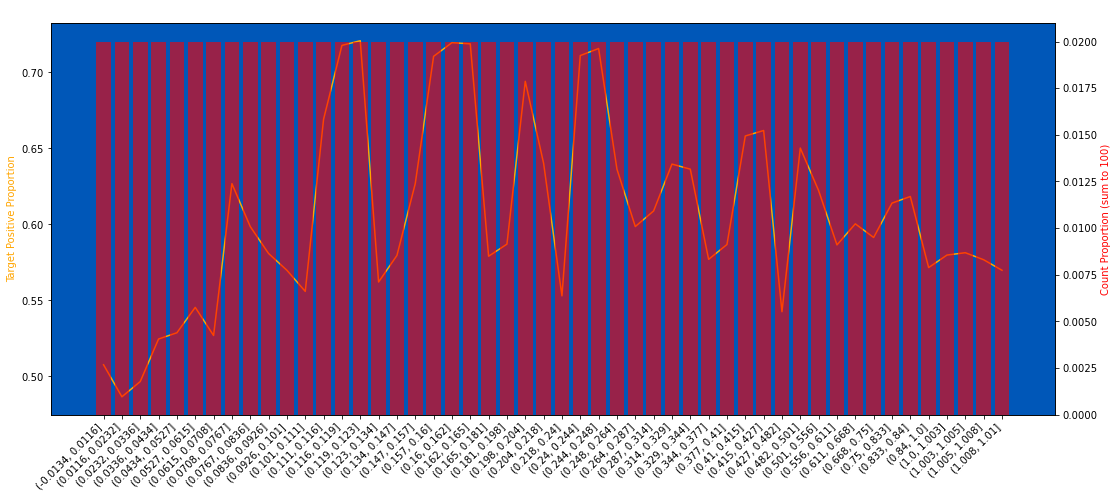

In [180]:
plot_target_check(train, "D_134", q=50, use_raw_bin=True)

In [181]:
train["D_134"] = train["D_134"].round(2)
test["D_134"] = test["D_134"].round(2)

In [182]:
train.loc[train["D_134"].between(1, 1.01), "D_134"] = 1
test.loc[test["D_134"].between(1, 1.01), "D_134"] = 1

5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1


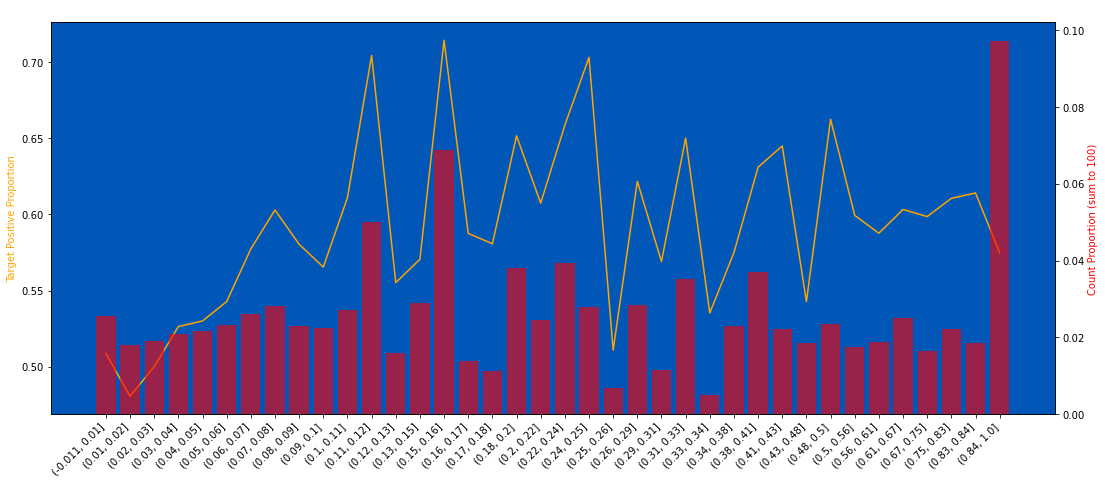

In [183]:
plot_target_check(train, "D_134", q=50, use_raw_bin=True)

### D_135

5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1


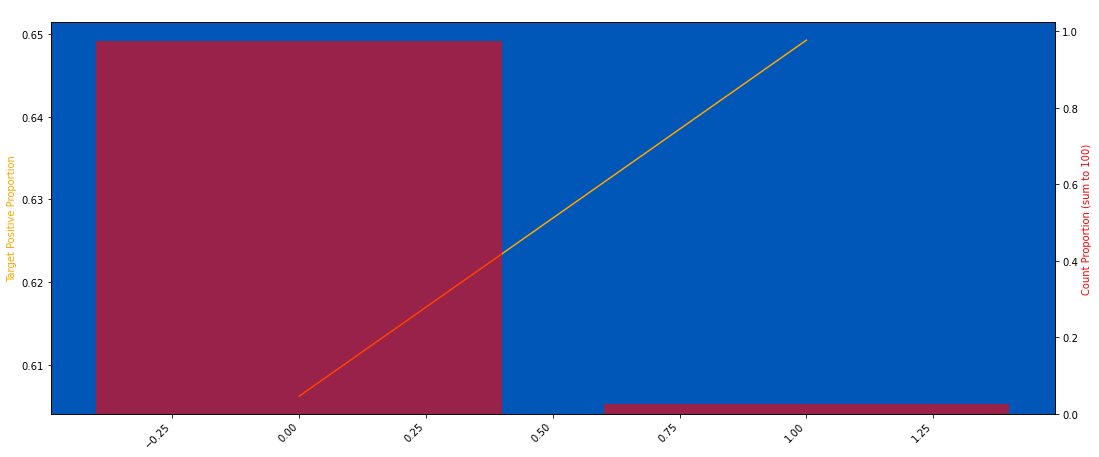

In [184]:
plot_target_check(train, "D_135", q=50, use_raw_bin=True)

### D_136

5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1


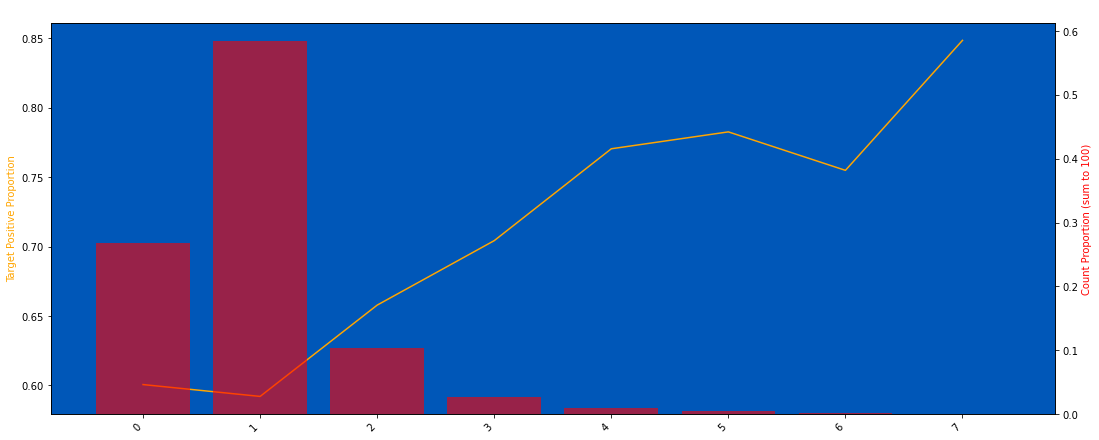

In [185]:
plot_target_check(train, "D_136", q=50, use_raw_bin=True)

### D_137

5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1


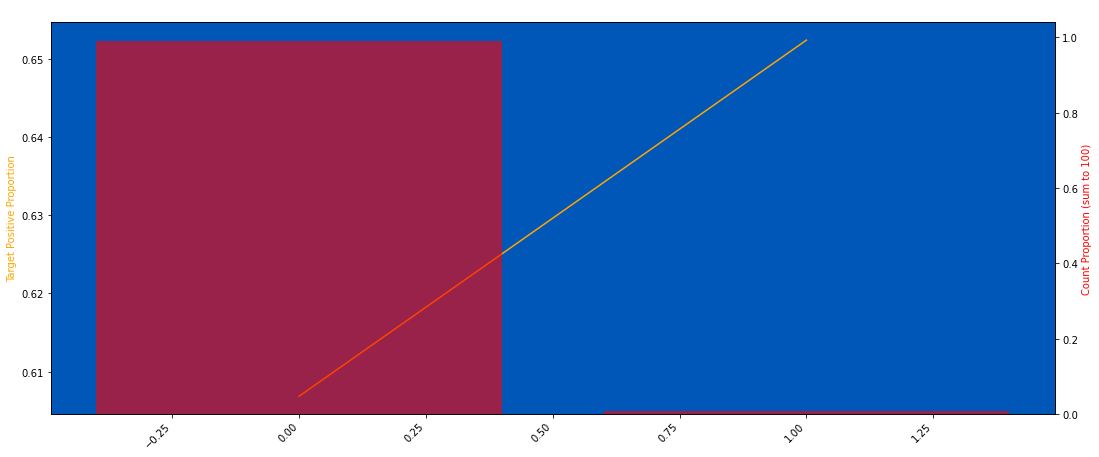

In [186]:
plot_target_check(train, "D_137", q=50, use_raw_bin=True)

### D_138

5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1


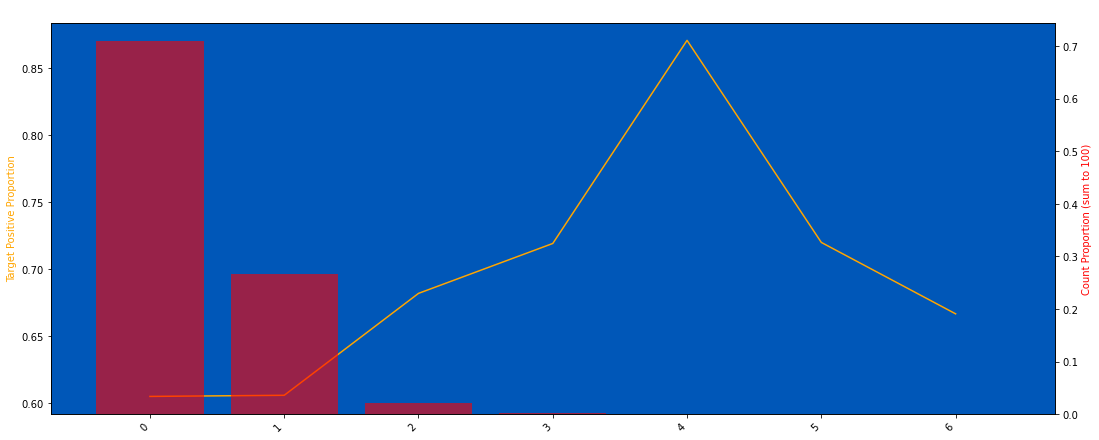

In [187]:
plot_target_check(train, "D_138", q=50, use_raw_bin=True)

### D_139

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


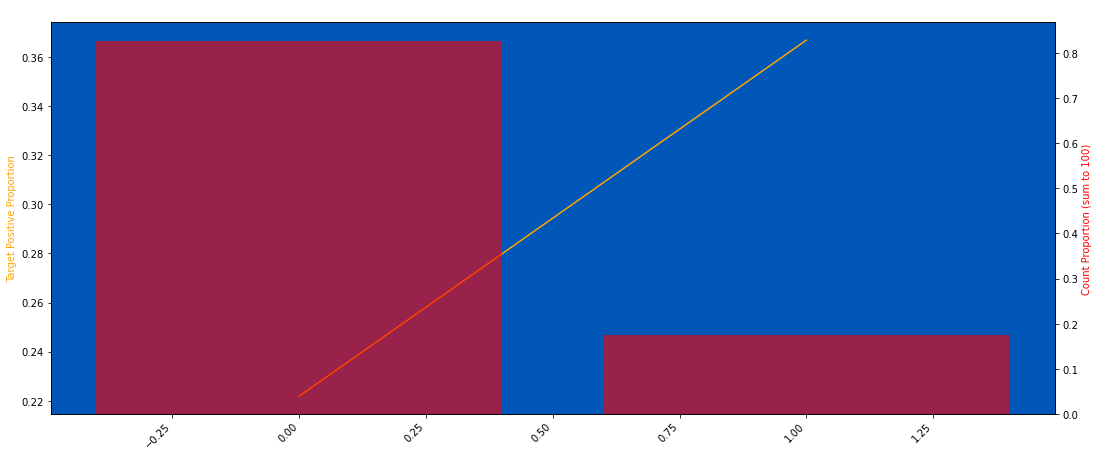

In [188]:
plot_target_check(train, "D_139", q=50, use_raw_bin=True)

### D_140

40632 null count, 0.007 null proportion
0.4090 of the targets have label = 1


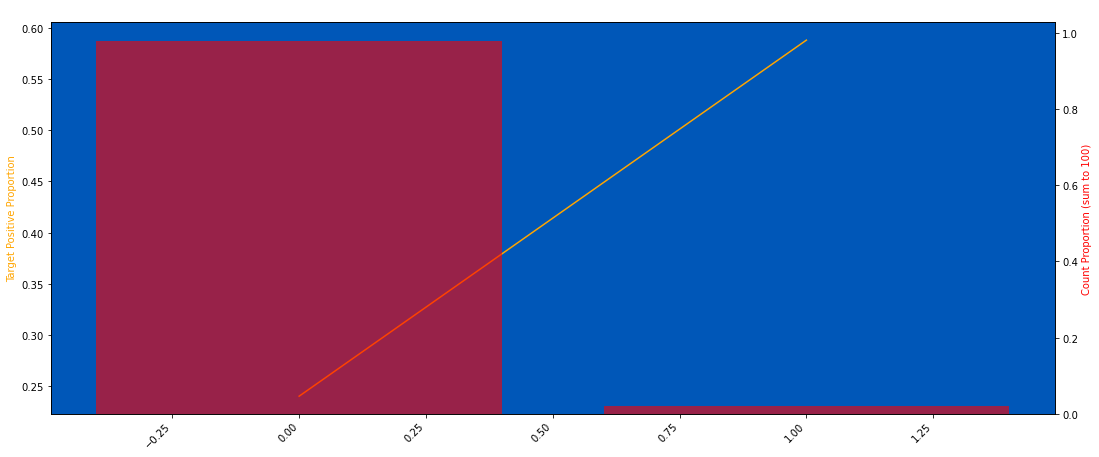

In [189]:
plot_target_check(train, "D_140", q=50, use_raw_bin=True)

### D_141

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


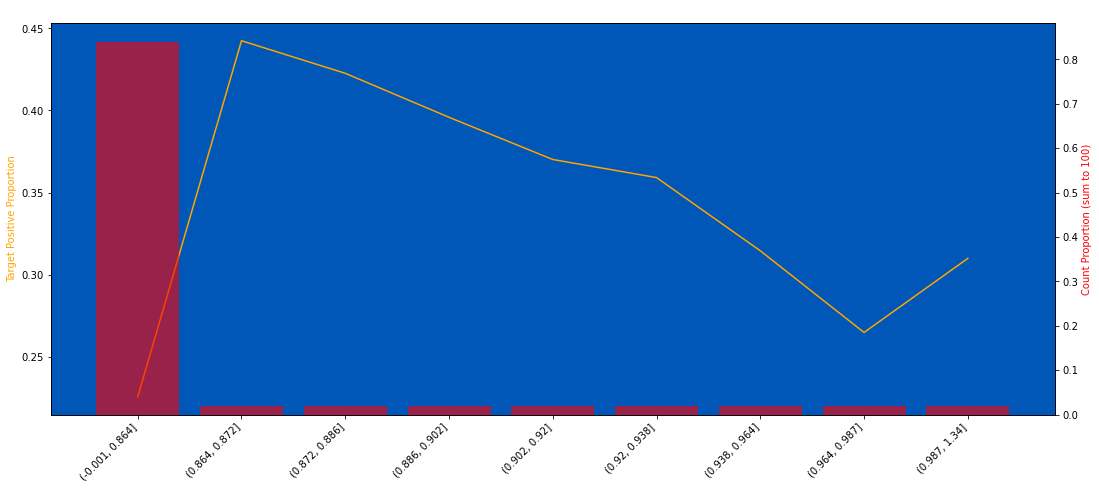

In [190]:
plot_target_check(train, "D_141", q=50, use_raw_bin=True)

### D_142

4587043 null count, 0.829 null proportion
0.2248 of the targets have label = 1


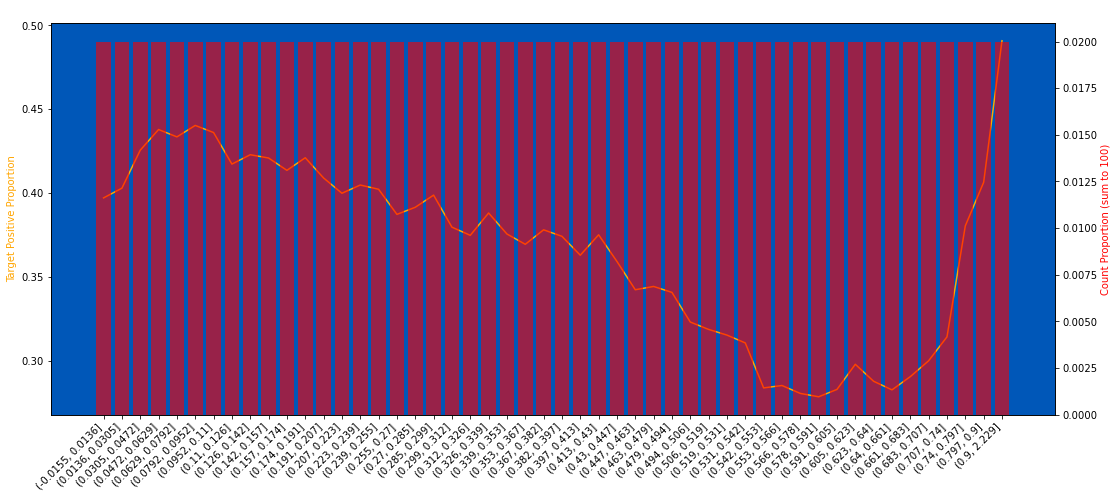

In [191]:
plot_target_check(train, "D_142", q=50, use_raw_bin=True)

In [192]:
train["D_142"] = train["D_142"].round(2)
test["D_142"] = test["D_142"].round(2)

4587043 null count, 0.829 null proportion
0.2248 of the targets have label = 1


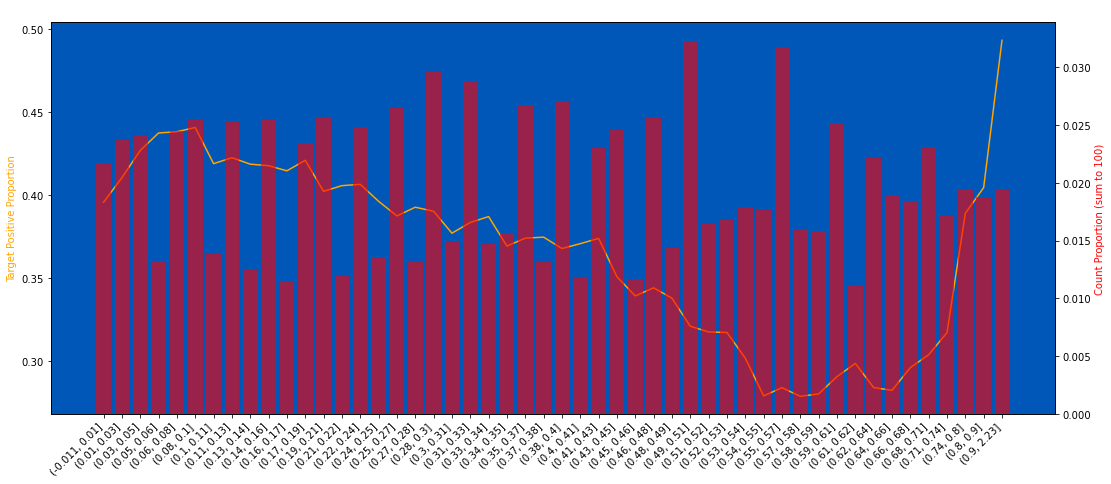

In [193]:
plot_target_check(train, "D_142", q=50, use_raw_bin=True)

### D_143

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


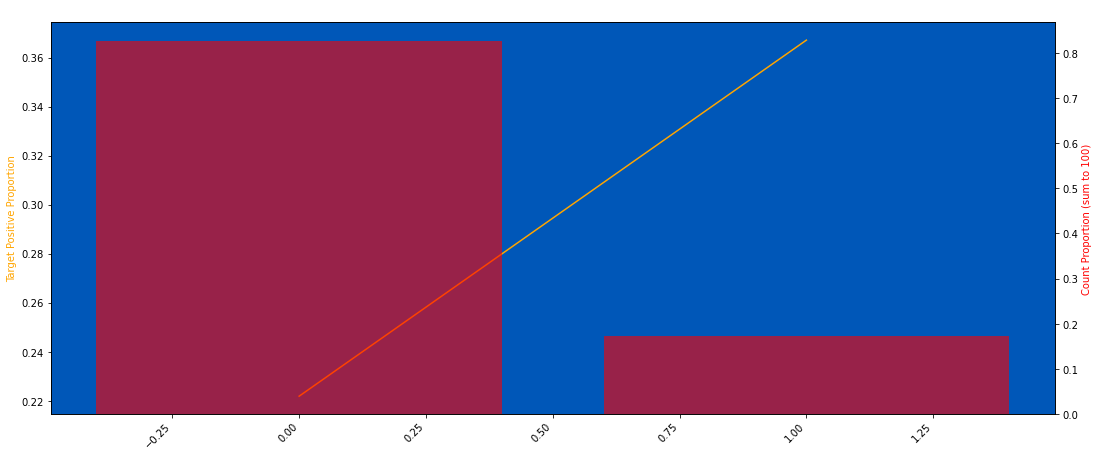

In [194]:
plot_target_check(train, "D_143", q=50, use_raw_bin=True)

### D_144

40727 null count, 0.007 null proportion
0.4093 of the targets have label = 1


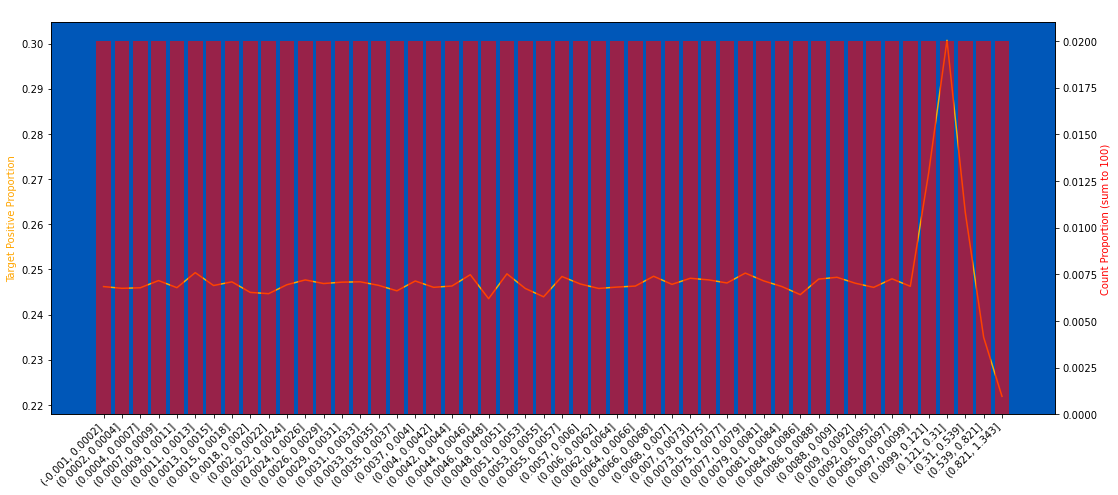

In [195]:
plot_target_check(train, "D_144", q=50, use_raw_bin=True)

In [196]:
train.loc[train["D_144"].between(0, 0.1), "D_144"] = 0.1
test.loc[test["D_144"].between(0, 0.1), "D_144"] = 0.1

40727 null count, 0.007 null proportion
0.4093 of the targets have label = 1


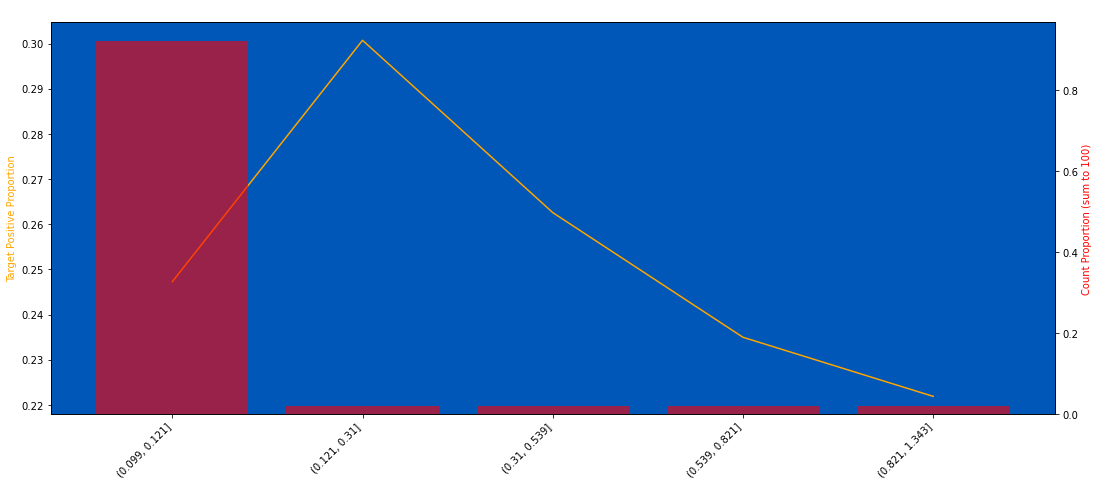

In [197]:
plot_target_check(train, "D_144", q=50, use_raw_bin=True)

### D_145

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


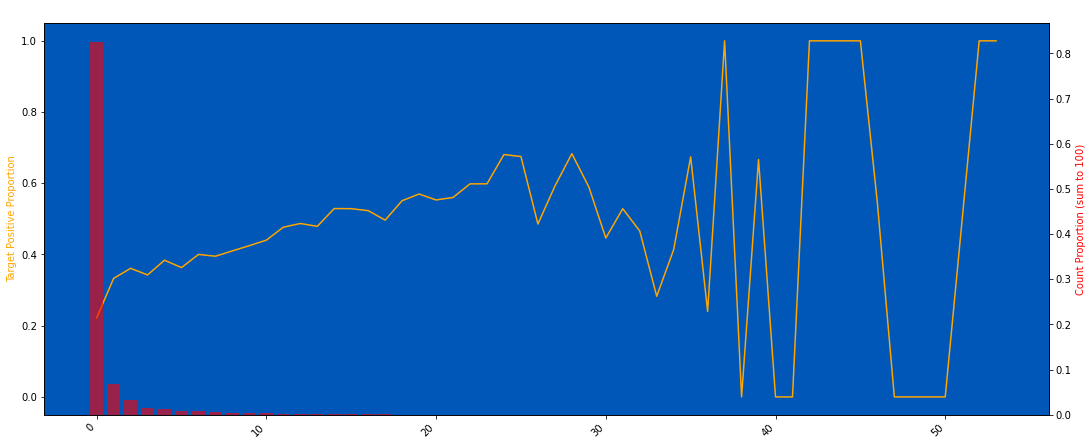

In [198]:
plot_target_check(train, "D_145", q=50, use_raw_bin=True)

In [199]:
train.loc[train["D_145"] >= 20, "D_145"] = 20
test.loc[test["D_145"] >= 20, "D_145"] = 20

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


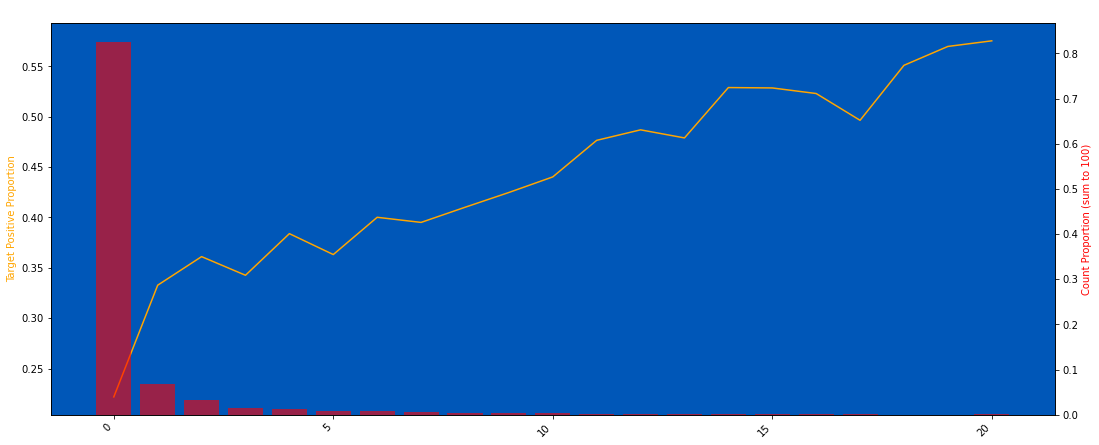

In [200]:
plot_target_check(train, "D_145", q=50, use_raw_bin=True)

### Column checking

In [201]:
from tqdm import tqdm

In [202]:
d_columns = get_cols(train, "D_")

In [203]:
for d in tqdm(d_columns):
    neg1_series = train.loc[train[d] == -1, d]
    if len(neg1_series) > 0:
        print("Train", d, len(neg1_series))
    neg1_series = test.loc[test[d] == -1, d]
    if len(neg1_series) > 0:
        print("Test", d, len(neg1_series))

 20%|██████████████████████████▌                                                                                                          | 19/95 [00:00<00:01, 56.33it/s]

Test D_50 1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:02<00:00, 34.11it/s]


In [204]:
d_col_nunique = train[d_columns].nunique()

In [205]:
less_unique_d_cols = d_col_nunique[d_col_nunique < 50].index.tolist()

In [206]:
for d in less_unique_d_cols:
    print(d, ":", train[d].dtype, "\n", sorted(train[d].unique().tolist()), "\n")

D_44 : float64 
 [0.0, 1.0, nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 32.0, 34.0, 37.0, 41.0, 42.0, 43.0, 44.0, 45.0] 

D_51 : int8 
 [0, 1, 2, 3, 4, 5, 6, 7, 8] 

D_63 : int8 
 [0, 1, 2, 3, 4, 5] 

D_64 : float64 
 [0.0, 2.0, nan, 1.0, 3.0] 

D_66 : float64 
 [nan, 0.0, 1.0] 

D_68 : float64 
 [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan] 

D_70 : float64 
 [0.0, 1.0, 2.0, 3.0, 4.0, nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0] 

D_72 : float64 
 [0.0, 1.0, 2.0, 3.0, nan, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0] 

D_78 : float64 
 [0.0, nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 24.0, 25.0, 32.0] 

D_79 : float64 
 [0.0, 1.0, nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0,

In [207]:
for col in tqdm(less_unique_d_cols):
    train[col] = integerize(train[col])
    test[col] = integerize(test[col])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:53<00:00,  1.09s/it]


In [208]:
train = train.drop(columns="temp", errors="ignore")
test = test.drop(columns="temp", errors="ignore")

In [209]:
train.shape, test.shape

((5531451, 189), (11363762, 188))

In [210]:
# %%time
train.to_parquet(f"{RAW_TRAIN_PARQUET_PATH}/train_bd.parquet")
test.to_parquet(f"{RAW_TEST_PARQUET_PATH}/test_bd.parquet")

### Check Column

In [ ]:
(train["D_106"].round(1) - train["D_106"]).fillna(0).sum()

### R_1

In [ ]:
# plot_train_test_distribution(train, test, col="R_1")

In [ ]:
%%time
train["R_1"] = (train["R_1"] * 4).astype(np.int8)
test["R_1"] = (test["R_1"] * 4).astype(np.int8)

In [ ]:
# plot_train_test_distribution(train, test, col="R_1")

In [ ]:
plot_target_check(train, "R_1")

### S_19

In [ ]:
# plot_train_test_distribution(train, test, col="S_19")

In [ ]:
%%time
train["S_19"] = train["S_19"].apply(lambda x: 1 if x >= 0.01 else 0).astype(np.int8)
test["S_19"] = test["S_19"].apply(lambda x: 1 if x >= 0.01 else 0).astype(np.int8)

In [ ]:
# plot_train_test_distribution(train, test, col="S_19")

In [ ]:
plot_target_check(train, "S_19")

In [ ]:
gc.collect()

### S_23

In [ ]:
# plot_train_test_distribution(train, test, col="S_23")

In [ ]:
train.loc[train["S_23"].between(0.13, 0.141), "S_23"] = 0.135
test.loc[test["S_23"].between(0.13, 0.141), "S_23"] = 0.135

In [ ]:
train["S_23"].describe()

In [ ]:
plot_target_check(train, "S_23", q=50)

### Insert row_number

In [ ]:
%%time
insert_row_number(train)
insert_row_number(test)

In [ ]:
train = train.drop(columns="temp", errors="ignore")
test = test.drop(columns="temp", errors="ignore")

In [ ]:
train.shape, test.shape